In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# fer2013.csv path
FER2013CSV_PATH = '../../data/raw/fer2013.csv'
# fer2013new.csv path
FER2013NEWCSV_PATH = '../../data/raw/fer2013new.csv'
# path to output directory
TOP_SAVE_DIR="../../data/input"

In [3]:
df = pd.read_csv(FER2013CSV_PATH)
print(df)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [4]:
df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
dfp = pd.read_csv(FER2013NEWCSV_PATH)

In [6]:
dfp[0:5]

,Usage,Image name,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,fer0000000.png,4,0,0,1,3,2,0,0,0,0
1,Training,fer0000001.png,6,0,1,1,0,0,0,0,2,0
2,Training,fer0000002.png,5,0,0,3,1,0,0,0,1,0
3,Training,fer0000003.png,4,0,0,4,1,0,0,0,1,0
4,Training,fer0000004.png,9,0,0,1,0,0,0,0,0,0


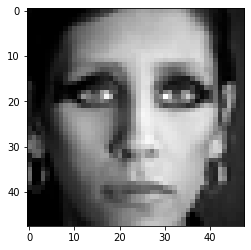

(min,max)= 0.0 241.0


In [7]:
pixels_str = df["pixels"][4]
pixels_np = np.fromstring(pixels_str, np.float32, sep=' ')
pixels_np = pixels_np.reshape(48, 48)

fix, ax = plt.subplots()
ax.imshow(pixels_np, cmap="gray")
plt.show()

print("(min,max)=", np.min(pixels_np), np.max(pixels_np))

In [8]:
def createDirs(top_dir, usages, emos):
    for d in usages:
        for s in emos:
            newdir = os.path.join(top_dir, d, s)
            os.makedirs(newdir, exist_ok=True)
            #print(newdir)

def extractRowFromFarPlus(row):
    ret_usage = row[0]
    ret_name = row[1]
    max_count = 0
    max_count_i = 0
    for i in range(2, 12): # [2,11]
        #print(i, row[i])
        if max_count < row[i] :
            max_count = row[i]
            max_score = i - 2
    return ret_usage, ret_name, max_score

def extractPixelsFromFar(pixels_str):
    pixels_np = np.fromstring(pixels_str, np.float32, sep=' ')
    pixels_np = pixels_np.reshape(48, 48)
    return pixels_np

def saveImage(save_path, pixels):
    image = Image.fromarray(pixels.astype(np.uint8))
    image.save(save_path, format='PNG')
    print("saved", save_path)

In [9]:
usages = set(dfp['Usage'])
emos = dfp.keys()[2:11]
createDirs(TOP_SAVE_DIR, usages, emos)

for i, row in dfp.iterrows():
    img_usage, img_name, img_score = extractRowFromFarPlus(row)
    if img_score == 9:
        continue
    img_pixels = extractPixelsFromFar(df['pixels'][i])
    save_path = os.path.join(TOP_SAVE_DIR, img_usage, emos[img_score], img_name,)
    saveImage(save_path, img_pixels)

saved ../../data/input/Training/neutral/fer0000000.png
saved ../../data/input/Training/neutral/fer0000001.png
saved ../../data/input/Training/neutral/fer0000002.png
saved ../../data/input/Training/neutral/fer0000003.png
saved ../../data/input/Training/neutral/fer0000004.png
saved ../../data/input/Training/neutral/fer0000005.png
saved ../../data/input/Training/sadness/fer0000006.png
saved ../../data/input/Training/happiness/fer0000007.png
saved ../../data/input/Training/happiness/fer0000008.png
saved ../../data/input/Training/surprise/fer0000009.png
saved ../../data/input/Training/anger/fer0000010.png
saved ../../data/input/Training/neutral/fer0000011.png
saved ../../data/input/Training/neutral/fer0000012.png
saved ../../data/input/Training/neutral/fer0000013.png
saved ../../data/input/Training/happiness/fer0000014.png
saved ../../data/input/Training/surprise/fer0000015.png
saved ../../data/input/Training/happiness/fer0000016.png
saved ../../data/input/Training/sadness/fer0000018.png
sa

saved ../../data/input/Training/neutral/fer0000194.png
saved ../../data/input/Training/happiness/fer0000195.png
saved ../../data/input/Training/neutral/fer0000196.png
saved ../../data/input/Training/neutral/fer0000197.png
saved ../../data/input/Training/surprise/fer0000198.png
saved ../../data/input/Training/sadness/fer0000199.png
saved ../../data/input/Training/sadness/fer0000200.png
saved ../../data/input/Training/sadness/fer0000201.png
saved ../../data/input/Training/neutral/fer0000202.png
saved ../../data/input/Training/sadness/fer0000203.png
saved ../../data/input/Training/surprise/fer0000204.png
saved ../../data/input/Training/happiness/fer0000205.png
saved ../../data/input/Training/happiness/fer0000206.png
saved ../../data/input/Training/surprise/fer0000207.png
saved ../../data/input/Training/neutral/fer0000208.png
saved ../../data/input/Training/happiness/fer0000209.png
saved ../../data/input/Training/neutral/fer0000210.png
saved ../../data/input/Training/sadness/fer0000211.png

saved ../../data/input/Training/anger/fer0000373.png
saved ../../data/input/Training/neutral/fer0000374.png
saved ../../data/input/Training/neutral/fer0000375.png
saved ../../data/input/Training/neutral/fer0000376.png
saved ../../data/input/Training/happiness/fer0000377.png
saved ../../data/input/Training/neutral/fer0000378.png
saved ../../data/input/Training/happiness/fer0000379.png
saved ../../data/input/Training/surprise/fer0000380.png
saved ../../data/input/Training/neutral/fer0000381.png
saved ../../data/input/Training/neutral/fer0000382.png
saved ../../data/input/Training/happiness/fer0000383.png
saved ../../data/input/Training/sadness/fer0000384.png
saved ../../data/input/Training/neutral/fer0000385.png
saved ../../data/input/Training/anger/fer0000386.png
saved ../../data/input/Training/anger/fer0000387.png
saved ../../data/input/Training/neutral/fer0000388.png
saved ../../data/input/Training/neutral/fer0000389.png
saved ../../data/input/Training/sadness/fer0000390.png
saved ../

saved ../../data/input/Training/neutral/fer0000565.png
saved ../../data/input/Training/happiness/fer0000566.png
saved ../../data/input/Training/happiness/fer0000567.png
saved ../../data/input/Training/neutral/fer0000568.png
saved ../../data/input/Training/happiness/fer0000569.png
saved ../../data/input/Training/happiness/fer0000570.png
saved ../../data/input/Training/contempt/fer0000571.png
saved ../../data/input/Training/happiness/fer0000572.png
saved ../../data/input/Training/neutral/fer0000573.png
saved ../../data/input/Training/neutral/fer0000574.png
saved ../../data/input/Training/sadness/fer0000575.png
saved ../../data/input/Training/surprise/fer0000576.png
saved ../../data/input/Training/sadness/fer0000577.png
saved ../../data/input/Training/sadness/fer0000578.png
saved ../../data/input/Training/surprise/fer0000579.png
saved ../../data/input/Training/surprise/fer0000580.png
saved ../../data/input/Training/surprise/fer0000581.png
saved ../../data/input/Training/happiness/fer00005

saved ../../data/input/Training/sadness/fer0000741.png
saved ../../data/input/Training/fear/fer0000742.png
saved ../../data/input/Training/sadness/fer0000743.png
saved ../../data/input/Training/fear/fer0000744.png
saved ../../data/input/Training/neutral/fer0000745.png
saved ../../data/input/Training/neutral/fer0000746.png
saved ../../data/input/Training/sadness/fer0000747.png
saved ../../data/input/Training/surprise/fer0000748.png
saved ../../data/input/Training/surprise/fer0000749.png
saved ../../data/input/Training/sadness/fer0000750.png
saved ../../data/input/Training/neutral/fer0000751.png
saved ../../data/input/Training/contempt/fer0000752.png
saved ../../data/input/Training/sadness/fer0000753.png
saved ../../data/input/Training/anger/fer0000754.png
saved ../../data/input/Training/neutral/fer0000755.png
saved ../../data/input/Training/anger/fer0000756.png
saved ../../data/input/Training/surprise/fer0000757.png
saved ../../data/input/Training/happiness/fer0000758.png
saved ../../da

saved ../../data/input/Training/neutral/fer0000929.png
saved ../../data/input/Training/anger/fer0000930.png
saved ../../data/input/Training/neutral/fer0000931.png
saved ../../data/input/Training/sadness/fer0000932.png
saved ../../data/input/Training/anger/fer0000933.png
saved ../../data/input/Training/neutral/fer0000934.png
saved ../../data/input/Training/neutral/fer0000935.png
saved ../../data/input/Training/neutral/fer0000936.png
saved ../../data/input/Training/anger/fer0000937.png
saved ../../data/input/Training/fear/fer0000938.png
saved ../../data/input/Training/sadness/fer0000939.png
saved ../../data/input/Training/happiness/fer0000940.png
saved ../../data/input/Training/happiness/fer0000941.png
saved ../../data/input/Training/neutral/fer0000942.png
saved ../../data/input/Training/neutral/fer0000943.png
saved ../../data/input/Training/anger/fer0000944.png
saved ../../data/input/Training/surprise/fer0000945.png
saved ../../data/input/Training/happiness/fer0000946.png
saved ../../da

saved ../../data/input/Training/happiness/fer0001081.png
saved ../../data/input/Training/surprise/fer0001082.png
saved ../../data/input/Training/happiness/fer0001083.png
saved ../../data/input/Training/neutral/fer0001084.png
saved ../../data/input/Training/surprise/fer0001085.png
saved ../../data/input/Training/happiness/fer0001086.png
saved ../../data/input/Training/sadness/fer0001087.png
saved ../../data/input/Training/sadness/fer0001088.png
saved ../../data/input/Training/neutral/fer0001089.png
saved ../../data/input/Training/sadness/fer0001090.png
saved ../../data/input/Training/neutral/fer0001091.png
saved ../../data/input/Training/neutral/fer0001092.png
saved ../../data/input/Training/happiness/fer0001093.png
saved ../../data/input/Training/sadness/fer0001094.png
saved ../../data/input/Training/happiness/fer0001095.png
saved ../../data/input/Training/surprise/fer0001096.png
saved ../../data/input/Training/happiness/fer0001097.png
saved ../../data/input/Training/surprise/fer000109

saved ../../data/input/Training/surprise/fer0001259.png
saved ../../data/input/Training/happiness/fer0001260.png
saved ../../data/input/Training/sadness/fer0001261.png
saved ../../data/input/Training/neutral/fer0001262.png
saved ../../data/input/Training/contempt/fer0001263.png
saved ../../data/input/Training/happiness/fer0001264.png
saved ../../data/input/Training/anger/fer0001265.png
saved ../../data/input/Training/anger/fer0001266.png
saved ../../data/input/Training/happiness/fer0001267.png
saved ../../data/input/Training/sadness/fer0001268.png
saved ../../data/input/Training/neutral/fer0001269.png
saved ../../data/input/Training/happiness/fer0001270.png
saved ../../data/input/Training/surprise/fer0001271.png
saved ../../data/input/Training/sadness/fer0001272.png
saved ../../data/input/Training/happiness/fer0001273.png
saved ../../data/input/Training/sadness/fer0001274.png
saved ../../data/input/Training/neutral/fer0001275.png
saved ../../data/input/Training/surprise/fer0001276.png


saved ../../data/input/Training/surprise/fer0001455.png
saved ../../data/input/Training/surprise/fer0001456.png
saved ../../data/input/Training/happiness/fer0001457.png
saved ../../data/input/Training/neutral/fer0001458.png
saved ../../data/input/Training/sadness/fer0001459.png
saved ../../data/input/Training/anger/fer0001460.png
saved ../../data/input/Training/neutral/fer0001461.png
saved ../../data/input/Training/surprise/fer0001462.png
saved ../../data/input/Training/neutral/fer0001463.png
saved ../../data/input/Training/surprise/fer0001464.png
saved ../../data/input/Training/surprise/fer0001465.png
saved ../../data/input/Training/anger/fer0001466.png
saved ../../data/input/Training/surprise/fer0001467.png
saved ../../data/input/Training/neutral/fer0001468.png
saved ../../data/input/Training/neutral/fer0001469.png
saved ../../data/input/Training/neutral/fer0001470.png
saved ../../data/input/Training/sadness/fer0001471.png
saved ../../data/input/Training/surprise/fer0001472.png
saved

saved ../../data/input/Training/anger/fer0001637.png
saved ../../data/input/Training/happiness/fer0001638.png
saved ../../data/input/Training/neutral/fer0001639.png
saved ../../data/input/Training/happiness/fer0001640.png
saved ../../data/input/Training/happiness/fer0001641.png
saved ../../data/input/Training/happiness/fer0001642.png
saved ../../data/input/Training/neutral/fer0001643.png
saved ../../data/input/Training/sadness/fer0001644.png
saved ../../data/input/Training/neutral/fer0001645.png
saved ../../data/input/Training/happiness/fer0001647.png
saved ../../data/input/Training/surprise/fer0001648.png
saved ../../data/input/Training/disgust/fer0001649.png
saved ../../data/input/Training/neutral/fer0001650.png
saved ../../data/input/Training/surprise/fer0001651.png
saved ../../data/input/Training/fear/fer0001652.png
saved ../../data/input/Training/happiness/fer0001653.png
saved ../../data/input/Training/neutral/fer0001654.png
saved ../../data/input/Training/surprise/fer0001655.png


saved ../../data/input/Training/neutral/fer0001815.png
saved ../../data/input/Training/happiness/fer0001816.png
saved ../../data/input/Training/neutral/fer0001817.png
saved ../../data/input/Training/surprise/fer0001818.png
saved ../../data/input/Training/happiness/fer0001819.png
saved ../../data/input/Training/surprise/fer0001820.png
saved ../../data/input/Training/neutral/fer0001821.png
saved ../../data/input/Training/surprise/fer0001822.png
saved ../../data/input/Training/neutral/fer0001823.png
saved ../../data/input/Training/happiness/fer0001824.png
saved ../../data/input/Training/neutral/fer0001825.png
saved ../../data/input/Training/happiness/fer0001826.png
saved ../../data/input/Training/neutral/fer0001827.png
saved ../../data/input/Training/neutral/fer0001828.png
saved ../../data/input/Training/neutral/fer0001829.png
saved ../../data/input/Training/happiness/fer0001830.png
saved ../../data/input/Training/neutral/fer0001831.png
saved ../../data/input/Training/neutral/fer0001832.p

saved ../../data/input/Training/surprise/fer0001990.png
saved ../../data/input/Training/happiness/fer0001991.png
saved ../../data/input/Training/anger/fer0001992.png
saved ../../data/input/Training/neutral/fer0001993.png
saved ../../data/input/Training/anger/fer0001994.png
saved ../../data/input/Training/neutral/fer0001995.png
saved ../../data/input/Training/neutral/fer0001996.png
saved ../../data/input/Training/surprise/fer0001997.png
saved ../../data/input/Training/neutral/fer0001998.png
saved ../../data/input/Training/happiness/fer0001999.png
saved ../../data/input/Training/sadness/fer0002000.png
saved ../../data/input/Training/neutral/fer0002001.png
saved ../../data/input/Training/fear/fer0002002.png
saved ../../data/input/Training/sadness/fer0002003.png
saved ../../data/input/Training/neutral/fer0002004.png
saved ../../data/input/Training/sadness/fer0002005.png
saved ../../data/input/Training/neutral/fer0002006.png
saved ../../data/input/Training/neutral/fer0002007.png
saved ../..

saved ../../data/input/Training/happiness/fer0002149.png
saved ../../data/input/Training/neutral/fer0002150.png
saved ../../data/input/Training/anger/fer0002151.png
saved ../../data/input/Training/neutral/fer0002152.png
saved ../../data/input/Training/neutral/fer0002153.png
saved ../../data/input/Training/neutral/fer0002154.png
saved ../../data/input/Training/neutral/fer0002155.png
saved ../../data/input/Training/happiness/fer0002156.png
saved ../../data/input/Training/neutral/fer0002157.png
saved ../../data/input/Training/neutral/fer0002158.png
saved ../../data/input/Training/neutral/fer0002159.png
saved ../../data/input/Training/neutral/fer0002160.png
saved ../../data/input/Training/surprise/fer0002161.png
saved ../../data/input/Training/anger/fer0002162.png
saved ../../data/input/Training/neutral/fer0002163.png
saved ../../data/input/Training/happiness/fer0002164.png
saved ../../data/input/Training/fear/fer0002165.png
saved ../../data/input/Training/neutral/fer0002166.png
saved ../.

saved ../../data/input/Training/anger/fer0002310.png
saved ../../data/input/Training/anger/fer0002311.png
saved ../../data/input/Training/happiness/fer0002312.png
saved ../../data/input/Training/neutral/fer0002313.png
saved ../../data/input/Training/neutral/fer0002314.png
saved ../../data/input/Training/anger/fer0002315.png
saved ../../data/input/Training/fear/fer0002316.png
saved ../../data/input/Training/sadness/fer0002317.png
saved ../../data/input/Training/neutral/fer0002318.png
saved ../../data/input/Training/happiness/fer0002319.png
saved ../../data/input/Training/surprise/fer0002320.png
saved ../../data/input/Training/neutral/fer0002321.png
saved ../../data/input/Training/surprise/fer0002322.png
saved ../../data/input/Training/happiness/fer0002323.png
saved ../../data/input/Training/happiness/fer0002324.png
saved ../../data/input/Training/anger/fer0002325.png
saved ../../data/input/Training/surprise/fer0002326.png
saved ../../data/input/Training/neutral/fer0002327.png
saved ../.

saved ../../data/input/Training/neutral/fer0002467.png
saved ../../data/input/Training/happiness/fer0002468.png
saved ../../data/input/Training/happiness/fer0002469.png
saved ../../data/input/Training/happiness/fer0002470.png
saved ../../data/input/Training/surprise/fer0002471.png
saved ../../data/input/Training/sadness/fer0002472.png
saved ../../data/input/Training/happiness/fer0002473.png
saved ../../data/input/Training/neutral/fer0002474.png
saved ../../data/input/Training/neutral/fer0002475.png
saved ../../data/input/Training/surprise/fer0002476.png
saved ../../data/input/Training/surprise/fer0002477.png
saved ../../data/input/Training/fear/fer0002478.png
saved ../../data/input/Training/happiness/fer0002479.png
saved ../../data/input/Training/neutral/fer0002480.png
saved ../../data/input/Training/neutral/fer0002481.png
saved ../../data/input/Training/anger/fer0002482.png
saved ../../data/input/Training/anger/fer0002483.png
saved ../../data/input/Training/neutral/fer0002484.png
save

saved ../../data/input/Training/happiness/fer0002643.png
saved ../../data/input/Training/neutral/fer0002644.png
saved ../../data/input/Training/happiness/fer0002645.png
saved ../../data/input/Training/happiness/fer0002646.png
saved ../../data/input/Training/neutral/fer0002647.png
saved ../../data/input/Training/happiness/fer0002648.png
saved ../../data/input/Training/fear/fer0002649.png
saved ../../data/input/Training/anger/fer0002650.png
saved ../../data/input/Training/happiness/fer0002651.png
saved ../../data/input/Training/neutral/fer0002652.png
saved ../../data/input/Training/neutral/fer0002653.png
saved ../../data/input/Training/neutral/fer0002655.png
saved ../../data/input/Training/neutral/fer0002656.png
saved ../../data/input/Training/neutral/fer0002657.png
saved ../../data/input/Training/sadness/fer0002658.png
saved ../../data/input/Training/neutral/fer0002659.png
saved ../../data/input/Training/neutral/fer0002660.png
saved ../../data/input/Training/fear/fer0002661.png
saved ..

saved ../../data/input/Training/happiness/fer0002803.png
saved ../../data/input/Training/neutral/fer0002804.png
saved ../../data/input/Training/happiness/fer0002805.png
saved ../../data/input/Training/happiness/fer0002806.png
saved ../../data/input/Training/sadness/fer0002807.png
saved ../../data/input/Training/happiness/fer0002808.png
saved ../../data/input/Training/anger/fer0002809.png
saved ../../data/input/Training/neutral/fer0002810.png
saved ../../data/input/Training/happiness/fer0002811.png
saved ../../data/input/Training/happiness/fer0002812.png
saved ../../data/input/Training/surprise/fer0002813.png
saved ../../data/input/Training/neutral/fer0002814.png
saved ../../data/input/Training/happiness/fer0002815.png
saved ../../data/input/Training/neutral/fer0002816.png
saved ../../data/input/Training/neutral/fer0002817.png
saved ../../data/input/Training/neutral/fer0002818.png
saved ../../data/input/Training/happiness/fer0002819.png
saved ../../data/input/Training/neutral/fer0002820

saved ../../data/input/Training/happiness/fer0002955.png
saved ../../data/input/Training/happiness/fer0002956.png
saved ../../data/input/Training/sadness/fer0002957.png
saved ../../data/input/Training/surprise/fer0002958.png
saved ../../data/input/Training/sadness/fer0002959.png
saved ../../data/input/Training/happiness/fer0002960.png
saved ../../data/input/Training/sadness/fer0002961.png
saved ../../data/input/Training/neutral/fer0002962.png
saved ../../data/input/Training/happiness/fer0002963.png
saved ../../data/input/Training/happiness/fer0002964.png
saved ../../data/input/Training/surprise/fer0002965.png
saved ../../data/input/Training/happiness/fer0002966.png
saved ../../data/input/Training/happiness/fer0002967.png
saved ../../data/input/Training/neutral/fer0002968.png
saved ../../data/input/Training/neutral/fer0002969.png
saved ../../data/input/Training/anger/fer0002970.png
saved ../../data/input/Training/anger/fer0002971.png
saved ../../data/input/Training/neutral/fer0002972.pn

saved ../../data/input/Training/happiness/fer0003111.png
saved ../../data/input/Training/happiness/fer0003112.png
saved ../../data/input/Training/sadness/fer0003113.png
saved ../../data/input/Training/neutral/fer0003114.png
saved ../../data/input/Training/happiness/fer0003115.png
saved ../../data/input/Training/neutral/fer0003116.png
saved ../../data/input/Training/happiness/fer0003117.png
saved ../../data/input/Training/neutral/fer0003118.png
saved ../../data/input/Training/sadness/fer0003119.png
saved ../../data/input/Training/neutral/fer0003120.png
saved ../../data/input/Training/sadness/fer0003121.png
saved ../../data/input/Training/neutral/fer0003122.png
saved ../../data/input/Training/sadness/fer0003123.png
saved ../../data/input/Training/sadness/fer0003124.png
saved ../../data/input/Training/surprise/fer0003125.png
saved ../../data/input/Training/happiness/fer0003126.png
saved ../../data/input/Training/happiness/fer0003127.png
saved ../../data/input/Training/neutral/fer0003128.p

saved ../../data/input/Training/neutral/fer0003262.png
saved ../../data/input/Training/fear/fer0003263.png
saved ../../data/input/Training/happiness/fer0003264.png
saved ../../data/input/Training/sadness/fer0003265.png
saved ../../data/input/Training/neutral/fer0003266.png
saved ../../data/input/Training/anger/fer0003267.png
saved ../../data/input/Training/neutral/fer0003268.png
saved ../../data/input/Training/contempt/fer0003269.png
saved ../../data/input/Training/happiness/fer0003270.png
saved ../../data/input/Training/neutral/fer0003271.png
saved ../../data/input/Training/happiness/fer0003272.png
saved ../../data/input/Training/sadness/fer0003273.png
saved ../../data/input/Training/neutral/fer0003274.png
saved ../../data/input/Training/happiness/fer0003275.png
saved ../../data/input/Training/neutral/fer0003276.png
saved ../../data/input/Training/surprise/fer0003277.png
saved ../../data/input/Training/surprise/fer0003278.png
saved ../../data/input/Training/surprise/fer0003279.png
sav

saved ../../data/input/Training/neutral/fer0003413.png
saved ../../data/input/Training/sadness/fer0003414.png
saved ../../data/input/Training/happiness/fer0003415.png
saved ../../data/input/Training/happiness/fer0003416.png
saved ../../data/input/Training/surprise/fer0003417.png
saved ../../data/input/Training/neutral/fer0003418.png
saved ../../data/input/Training/fear/fer0003419.png
saved ../../data/input/Training/happiness/fer0003420.png
saved ../../data/input/Training/happiness/fer0003421.png
saved ../../data/input/Training/sadness/fer0003422.png
saved ../../data/input/Training/sadness/fer0003423.png
saved ../../data/input/Training/fear/fer0003424.png
saved ../../data/input/Training/happiness/fer0003425.png
saved ../../data/input/Training/sadness/fer0003426.png
saved ../../data/input/Training/neutral/fer0003427.png
saved ../../data/input/Training/happiness/fer0003428.png
saved ../../data/input/Training/surprise/fer0003429.png
saved ../../data/input/Training/fear/fer0003430.png
saved

saved ../../data/input/Training/happiness/fer0003564.png
saved ../../data/input/Training/neutral/fer0003565.png
saved ../../data/input/Training/neutral/fer0003566.png
saved ../../data/input/Training/surprise/fer0003567.png
saved ../../data/input/Training/happiness/fer0003568.png
saved ../../data/input/Training/neutral/fer0003569.png
saved ../../data/input/Training/happiness/fer0003570.png
saved ../../data/input/Training/fear/fer0003571.png
saved ../../data/input/Training/happiness/fer0003572.png
saved ../../data/input/Training/happiness/fer0003573.png
saved ../../data/input/Training/happiness/fer0003574.png
saved ../../data/input/Training/neutral/fer0003575.png
saved ../../data/input/Training/neutral/fer0003576.png
saved ../../data/input/Training/neutral/fer0003577.png
saved ../../data/input/Training/sadness/fer0003578.png
saved ../../data/input/Training/happiness/fer0003579.png
saved ../../data/input/Training/anger/fer0003580.png
saved ../../data/input/Training/neutral/fer0003581.png


saved ../../data/input/Training/anger/fer0003715.png
saved ../../data/input/Training/surprise/fer0003716.png
saved ../../data/input/Training/neutral/fer0003717.png
saved ../../data/input/Training/neutral/fer0003718.png
saved ../../data/input/Training/happiness/fer0003719.png
saved ../../data/input/Training/neutral/fer0003720.png
saved ../../data/input/Training/happiness/fer0003721.png
saved ../../data/input/Training/happiness/fer0003722.png
saved ../../data/input/Training/neutral/fer0003723.png
saved ../../data/input/Training/neutral/fer0003724.png
saved ../../data/input/Training/neutral/fer0003725.png
saved ../../data/input/Training/neutral/fer0003726.png
saved ../../data/input/Training/neutral/fer0003727.png
saved ../../data/input/Training/neutral/fer0003728.png
saved ../../data/input/Training/sadness/fer0003729.png
saved ../../data/input/Training/neutral/fer0003730.png
saved ../../data/input/Training/neutral/fer0003731.png
saved ../../data/input/Training/happiness/fer0003732.png
sav

saved ../../data/input/Training/surprise/fer0003873.png
saved ../../data/input/Training/sadness/fer0003874.png
saved ../../data/input/Training/neutral/fer0003875.png
saved ../../data/input/Training/sadness/fer0003876.png
saved ../../data/input/Training/happiness/fer0003877.png
saved ../../data/input/Training/sadness/fer0003878.png
saved ../../data/input/Training/neutral/fer0003879.png
saved ../../data/input/Training/neutral/fer0003880.png
saved ../../data/input/Training/anger/fer0003881.png
saved ../../data/input/Training/happiness/fer0003882.png
saved ../../data/input/Training/happiness/fer0003883.png
saved ../../data/input/Training/neutral/fer0003884.png
saved ../../data/input/Training/surprise/fer0003885.png
saved ../../data/input/Training/happiness/fer0003886.png
saved ../../data/input/Training/neutral/fer0003887.png
saved ../../data/input/Training/happiness/fer0003888.png
saved ../../data/input/Training/anger/fer0003889.png
saved ../../data/input/Training/anger/fer0003890.png
save

saved ../../data/input/Training/neutral/fer0004038.png
saved ../../data/input/Training/neutral/fer0004039.png
saved ../../data/input/Training/anger/fer0004040.png
saved ../../data/input/Training/sadness/fer0004041.png
saved ../../data/input/Training/surprise/fer0004042.png
saved ../../data/input/Training/happiness/fer0004043.png
saved ../../data/input/Training/neutral/fer0004044.png
saved ../../data/input/Training/happiness/fer0004045.png
saved ../../data/input/Training/happiness/fer0004046.png
saved ../../data/input/Training/surprise/fer0004047.png
saved ../../data/input/Training/happiness/fer0004048.png
saved ../../data/input/Training/sadness/fer0004049.png
saved ../../data/input/Training/neutral/fer0004050.png
saved ../../data/input/Training/neutral/fer0004051.png
saved ../../data/input/Training/happiness/fer0004052.png
saved ../../data/input/Training/neutral/fer0004053.png
saved ../../data/input/Training/sadness/fer0004054.png
saved ../../data/input/Training/neutral/fer0004055.png


saved ../../data/input/Training/anger/fer0004194.png
saved ../../data/input/Training/neutral/fer0004195.png
saved ../../data/input/Training/surprise/fer0004196.png
saved ../../data/input/Training/happiness/fer0004197.png
saved ../../data/input/Training/neutral/fer0004198.png
saved ../../data/input/Training/sadness/fer0004199.png
saved ../../data/input/Training/neutral/fer0004200.png
saved ../../data/input/Training/anger/fer0004201.png
saved ../../data/input/Training/happiness/fer0004202.png
saved ../../data/input/Training/anger/fer0004203.png
saved ../../data/input/Training/neutral/fer0004204.png
saved ../../data/input/Training/neutral/fer0004205.png
saved ../../data/input/Training/neutral/fer0004206.png
saved ../../data/input/Training/neutral/fer0004207.png
saved ../../data/input/Training/happiness/fer0004208.png
saved ../../data/input/Training/neutral/fer0004209.png
saved ../../data/input/Training/neutral/fer0004210.png
saved ../../data/input/Training/neutral/fer0004211.png
saved ../

saved ../../data/input/Training/neutral/fer0004347.png
saved ../../data/input/Training/happiness/fer0004348.png
saved ../../data/input/Training/sadness/fer0004349.png
saved ../../data/input/Training/happiness/fer0004350.png
saved ../../data/input/Training/neutral/fer0004351.png
saved ../../data/input/Training/happiness/fer0004352.png
saved ../../data/input/Training/neutral/fer0004353.png
saved ../../data/input/Training/happiness/fer0004354.png
saved ../../data/input/Training/happiness/fer0004355.png
saved ../../data/input/Training/neutral/fer0004356.png
saved ../../data/input/Training/happiness/fer0004357.png
saved ../../data/input/Training/happiness/fer0004358.png
saved ../../data/input/Training/sadness/fer0004359.png
saved ../../data/input/Training/surprise/fer0004360.png
saved ../../data/input/Training/sadness/fer0004361.png
saved ../../data/input/Training/neutral/fer0004362.png
saved ../../data/input/Training/happiness/fer0004363.png
saved ../../data/input/Training/neutral/fer00043

saved ../../data/input/Training/happiness/fer0004524.png
saved ../../data/input/Training/neutral/fer0004525.png
saved ../../data/input/Training/neutral/fer0004526.png
saved ../../data/input/Training/neutral/fer0004527.png
saved ../../data/input/Training/surprise/fer0004528.png
saved ../../data/input/Training/sadness/fer0004529.png
saved ../../data/input/Training/happiness/fer0004530.png
saved ../../data/input/Training/sadness/fer0004531.png
saved ../../data/input/Training/neutral/fer0004532.png
saved ../../data/input/Training/neutral/fer0004533.png
saved ../../data/input/Training/neutral/fer0004534.png
saved ../../data/input/Training/neutral/fer0004535.png
saved ../../data/input/Training/neutral/fer0004536.png
saved ../../data/input/Training/happiness/fer0004537.png
saved ../../data/input/Training/happiness/fer0004538.png
saved ../../data/input/Training/anger/fer0004539.png
saved ../../data/input/Training/sadness/fer0004540.png
saved ../../data/input/Training/happiness/fer0004541.png
s

saved ../../data/input/Training/neutral/fer0004697.png
saved ../../data/input/Training/disgust/fer0004698.png
saved ../../data/input/Training/neutral/fer0004699.png
saved ../../data/input/Training/neutral/fer0004700.png
saved ../../data/input/Training/neutral/fer0004701.png
saved ../../data/input/Training/happiness/fer0004702.png
saved ../../data/input/Training/neutral/fer0004703.png
saved ../../data/input/Training/happiness/fer0004704.png
saved ../../data/input/Training/happiness/fer0004705.png
saved ../../data/input/Training/neutral/fer0004706.png
saved ../../data/input/Training/happiness/fer0004707.png
saved ../../data/input/Training/sadness/fer0004708.png
saved ../../data/input/Training/neutral/fer0004709.png
saved ../../data/input/Training/neutral/fer0004710.png
saved ../../data/input/Training/happiness/fer0004711.png
saved ../../data/input/Training/neutral/fer0004712.png
saved ../../data/input/Training/surprise/fer0004713.png
saved ../../data/input/Training/neutral/fer0004714.png

saved ../../data/input/Training/neutral/fer0004852.png
saved ../../data/input/Training/happiness/fer0004853.png
saved ../../data/input/Training/happiness/fer0004854.png
saved ../../data/input/Training/happiness/fer0004855.png
saved ../../data/input/Training/sadness/fer0004856.png
saved ../../data/input/Training/anger/fer0004857.png
saved ../../data/input/Training/fear/fer0004858.png
saved ../../data/input/Training/neutral/fer0004859.png
saved ../../data/input/Training/neutral/fer0004860.png
saved ../../data/input/Training/surprise/fer0004861.png
saved ../../data/input/Training/neutral/fer0004862.png
saved ../../data/input/Training/sadness/fer0004863.png
saved ../../data/input/Training/sadness/fer0004864.png
saved ../../data/input/Training/neutral/fer0004865.png
saved ../../data/input/Training/sadness/fer0004866.png
saved ../../data/input/Training/happiness/fer0004867.png
saved ../../data/input/Training/neutral/fer0004868.png
saved ../../data/input/Training/contempt/fer0004869.png
saved

saved ../../data/input/Training/anger/fer0005008.png
saved ../../data/input/Training/neutral/fer0005009.png
saved ../../data/input/Training/neutral/fer0005010.png
saved ../../data/input/Training/surprise/fer0005011.png
saved ../../data/input/Training/surprise/fer0005012.png
saved ../../data/input/Training/neutral/fer0005013.png
saved ../../data/input/Training/neutral/fer0005014.png
saved ../../data/input/Training/neutral/fer0005015.png
saved ../../data/input/Training/anger/fer0005016.png
saved ../../data/input/Training/surprise/fer0005017.png
saved ../../data/input/Training/surprise/fer0005018.png
saved ../../data/input/Training/neutral/fer0005019.png
saved ../../data/input/Training/neutral/fer0005020.png
saved ../../data/input/Training/neutral/fer0005021.png
saved ../../data/input/Training/neutral/fer0005022.png
saved ../../data/input/Training/surprise/fer0005023.png
saved ../../data/input/Training/neutral/fer0005024.png
saved ../../data/input/Training/happiness/fer0005025.png
saved .

saved ../../data/input/Training/neutral/fer0005185.png
saved ../../data/input/Training/neutral/fer0005186.png
saved ../../data/input/Training/neutral/fer0005187.png
saved ../../data/input/Training/neutral/fer0005188.png
saved ../../data/input/Training/happiness/fer0005189.png
saved ../../data/input/Training/sadness/fer0005190.png
saved ../../data/input/Training/happiness/fer0005191.png
saved ../../data/input/Training/anger/fer0005192.png
saved ../../data/input/Training/happiness/fer0005193.png
saved ../../data/input/Training/neutral/fer0005194.png
saved ../../data/input/Training/anger/fer0005195.png
saved ../../data/input/Training/neutral/fer0005196.png
saved ../../data/input/Training/happiness/fer0005197.png
saved ../../data/input/Training/surprise/fer0005198.png
saved ../../data/input/Training/surprise/fer0005199.png
saved ../../data/input/Training/happiness/fer0005200.png
saved ../../data/input/Training/neutral/fer0005201.png
saved ../../data/input/Training/surprise/fer0005202.png
s

saved ../../data/input/Training/fear/fer0005362.png
saved ../../data/input/Training/happiness/fer0005363.png
saved ../../data/input/Training/neutral/fer0005364.png
saved ../../data/input/Training/surprise/fer0005365.png
saved ../../data/input/Training/neutral/fer0005366.png
saved ../../data/input/Training/disgust/fer0005367.png
saved ../../data/input/Training/anger/fer0005368.png
saved ../../data/input/Training/happiness/fer0005369.png
saved ../../data/input/Training/sadness/fer0005370.png
saved ../../data/input/Training/neutral/fer0005371.png
saved ../../data/input/Training/neutral/fer0005372.png
saved ../../data/input/Training/sadness/fer0005373.png
saved ../../data/input/Training/happiness/fer0005374.png
saved ../../data/input/Training/neutral/fer0005375.png
saved ../../data/input/Training/neutral/fer0005376.png
saved ../../data/input/Training/anger/fer0005377.png
saved ../../data/input/Training/happiness/fer0005378.png
saved ../../data/input/Training/neutral/fer0005379.png
saved ..

saved ../../data/input/Training/fear/fer0005521.png
saved ../../data/input/Training/surprise/fer0005522.png
saved ../../data/input/Training/neutral/fer0005523.png
saved ../../data/input/Training/sadness/fer0005524.png
saved ../../data/input/Training/neutral/fer0005525.png
saved ../../data/input/Training/neutral/fer0005526.png
saved ../../data/input/Training/fear/fer0005527.png
saved ../../data/input/Training/neutral/fer0005528.png
saved ../../data/input/Training/neutral/fer0005529.png
saved ../../data/input/Training/anger/fer0005530.png
saved ../../data/input/Training/anger/fer0005531.png
saved ../../data/input/Training/happiness/fer0005532.png
saved ../../data/input/Training/neutral/fer0005533.png
saved ../../data/input/Training/anger/fer0005534.png
saved ../../data/input/Training/neutral/fer0005535.png
saved ../../data/input/Training/happiness/fer0005536.png
saved ../../data/input/Training/happiness/fer0005537.png
saved ../../data/input/Training/neutral/fer0005538.png
saved ../../dat

saved ../../data/input/Training/happiness/fer0005670.png
saved ../../data/input/Training/anger/fer0005671.png
saved ../../data/input/Training/neutral/fer0005672.png
saved ../../data/input/Training/neutral/fer0005673.png
saved ../../data/input/Training/happiness/fer0005674.png
saved ../../data/input/Training/surprise/fer0005675.png
saved ../../data/input/Training/neutral/fer0005676.png
saved ../../data/input/Training/happiness/fer0005677.png
saved ../../data/input/Training/sadness/fer0005678.png
saved ../../data/input/Training/neutral/fer0005679.png
saved ../../data/input/Training/happiness/fer0005680.png
saved ../../data/input/Training/anger/fer0005681.png
saved ../../data/input/Training/neutral/fer0005682.png
saved ../../data/input/Training/happiness/fer0005683.png
saved ../../data/input/Training/neutral/fer0005684.png
saved ../../data/input/Training/surprise/fer0005685.png
saved ../../data/input/Training/sadness/fer0005686.png
saved ../../data/input/Training/neutral/fer0005687.png
sa

saved ../../data/input/Training/happiness/fer0005853.png
saved ../../data/input/Training/happiness/fer0005854.png
saved ../../data/input/Training/surprise/fer0005855.png
saved ../../data/input/Training/happiness/fer0005856.png
saved ../../data/input/Training/neutral/fer0005857.png
saved ../../data/input/Training/surprise/fer0005858.png
saved ../../data/input/Training/neutral/fer0005859.png
saved ../../data/input/Training/sadness/fer0005860.png
saved ../../data/input/Training/neutral/fer0005861.png
saved ../../data/input/Training/happiness/fer0005862.png
saved ../../data/input/Training/happiness/fer0005863.png
saved ../../data/input/Training/neutral/fer0005864.png
saved ../../data/input/Training/neutral/fer0005865.png
saved ../../data/input/Training/happiness/fer0005866.png
saved ../../data/input/Training/neutral/fer0005867.png
saved ../../data/input/Training/surprise/fer0005868.png
saved ../../data/input/Training/sadness/fer0005869.png
saved ../../data/input/Training/anger/fer0005870.p

saved ../../data/input/Training/sadness/fer0006036.png
saved ../../data/input/Training/surprise/fer0006037.png
saved ../../data/input/Training/happiness/fer0006038.png
saved ../../data/input/Training/happiness/fer0006039.png
saved ../../data/input/Training/sadness/fer0006040.png
saved ../../data/input/Training/neutral/fer0006041.png
saved ../../data/input/Training/neutral/fer0006042.png
saved ../../data/input/Training/neutral/fer0006043.png
saved ../../data/input/Training/surprise/fer0006044.png
saved ../../data/input/Training/surprise/fer0006045.png
saved ../../data/input/Training/surprise/fer0006046.png
saved ../../data/input/Training/sadness/fer0006047.png
saved ../../data/input/Training/neutral/fer0006048.png
saved ../../data/input/Training/anger/fer0006049.png
saved ../../data/input/Training/sadness/fer0006050.png
saved ../../data/input/Training/anger/fer0006051.png
saved ../../data/input/Training/neutral/fer0006052.png
saved ../../data/input/Training/neutral/fer0006053.png
saved 

saved ../../data/input/Training/fear/fer0006220.png
saved ../../data/input/Training/neutral/fer0006221.png
saved ../../data/input/Training/anger/fer0006222.png
saved ../../data/input/Training/neutral/fer0006223.png
saved ../../data/input/Training/happiness/fer0006224.png
saved ../../data/input/Training/neutral/fer0006225.png
saved ../../data/input/Training/happiness/fer0006226.png
saved ../../data/input/Training/surprise/fer0006227.png
saved ../../data/input/Training/sadness/fer0006228.png
saved ../../data/input/Training/happiness/fer0006229.png
saved ../../data/input/Training/neutral/fer0006230.png
saved ../../data/input/Training/happiness/fer0006231.png
saved ../../data/input/Training/sadness/fer0006232.png
saved ../../data/input/Training/happiness/fer0006233.png
saved ../../data/input/Training/happiness/fer0006234.png
saved ../../data/input/Training/neutral/fer0006235.png
saved ../../data/input/Training/neutral/fer0006236.png
saved ../../data/input/Training/surprise/fer0006237.png
s

saved ../../data/input/Training/neutral/fer0006396.png
saved ../../data/input/Training/surprise/fer0006397.png
saved ../../data/input/Training/surprise/fer0006398.png
saved ../../data/input/Training/neutral/fer0006399.png
saved ../../data/input/Training/anger/fer0006400.png
saved ../../data/input/Training/happiness/fer0006401.png
saved ../../data/input/Training/surprise/fer0006402.png
saved ../../data/input/Training/happiness/fer0006403.png
saved ../../data/input/Training/surprise/fer0006404.png
saved ../../data/input/Training/happiness/fer0006405.png
saved ../../data/input/Training/surprise/fer0006406.png
saved ../../data/input/Training/anger/fer0006407.png
saved ../../data/input/Training/neutral/fer0006408.png
saved ../../data/input/Training/disgust/fer0006409.png
saved ../../data/input/Training/neutral/fer0006410.png
saved ../../data/input/Training/anger/fer0006411.png
saved ../../data/input/Training/surprise/fer0006412.png
saved ../../data/input/Training/anger/fer0006413.png
saved 

saved ../../data/input/Training/happiness/fer0006578.png
saved ../../data/input/Training/neutral/fer0006579.png
saved ../../data/input/Training/fear/fer0006580.png
saved ../../data/input/Training/neutral/fer0006581.png
saved ../../data/input/Training/neutral/fer0006582.png
saved ../../data/input/Training/happiness/fer0006583.png
saved ../../data/input/Training/surprise/fer0006584.png
saved ../../data/input/Training/neutral/fer0006585.png
saved ../../data/input/Training/happiness/fer0006586.png
saved ../../data/input/Training/surprise/fer0006587.png
saved ../../data/input/Training/neutral/fer0006588.png
saved ../../data/input/Training/happiness/fer0006589.png
saved ../../data/input/Training/happiness/fer0006590.png
saved ../../data/input/Training/happiness/fer0006591.png
saved ../../data/input/Training/surprise/fer0006592.png
saved ../../data/input/Training/happiness/fer0006593.png
saved ../../data/input/Training/neutral/fer0006594.png
saved ../../data/input/Training/happiness/fer000659

saved ../../data/input/Training/sadness/fer0006756.png
saved ../../data/input/Training/neutral/fer0006757.png
saved ../../data/input/Training/surprise/fer0006758.png
saved ../../data/input/Training/neutral/fer0006759.png
saved ../../data/input/Training/neutral/fer0006760.png
saved ../../data/input/Training/happiness/fer0006761.png
saved ../../data/input/Training/anger/fer0006762.png
saved ../../data/input/Training/sadness/fer0006763.png
saved ../../data/input/Training/happiness/fer0006764.png
saved ../../data/input/Training/disgust/fer0006765.png
saved ../../data/input/Training/happiness/fer0006766.png
saved ../../data/input/Training/neutral/fer0006767.png
saved ../../data/input/Training/happiness/fer0006768.png
saved ../../data/input/Training/happiness/fer0006769.png
saved ../../data/input/Training/neutral/fer0006770.png
saved ../../data/input/Training/anger/fer0006771.png
saved ../../data/input/Training/happiness/fer0006772.png
saved ../../data/input/Training/neutral/fer0006773.png
s

saved ../../data/input/Training/surprise/fer0006923.png
saved ../../data/input/Training/sadness/fer0006924.png
saved ../../data/input/Training/sadness/fer0006925.png
saved ../../data/input/Training/happiness/fer0006926.png
saved ../../data/input/Training/surprise/fer0006927.png
saved ../../data/input/Training/sadness/fer0006928.png
saved ../../data/input/Training/anger/fer0006929.png
saved ../../data/input/Training/neutral/fer0006930.png
saved ../../data/input/Training/neutral/fer0006931.png
saved ../../data/input/Training/happiness/fer0006932.png
saved ../../data/input/Training/anger/fer0006933.png
saved ../../data/input/Training/neutral/fer0006934.png
saved ../../data/input/Training/neutral/fer0006935.png
saved ../../data/input/Training/happiness/fer0006936.png
saved ../../data/input/Training/anger/fer0006937.png
saved ../../data/input/Training/neutral/fer0006938.png
saved ../../data/input/Training/neutral/fer0006939.png
saved ../../data/input/Training/anger/fer0006940.png
saved ../.

saved ../../data/input/Training/neutral/fer0007088.png
saved ../../data/input/Training/neutral/fer0007089.png
saved ../../data/input/Training/neutral/fer0007090.png
saved ../../data/input/Training/neutral/fer0007091.png
saved ../../data/input/Training/neutral/fer0007092.png
saved ../../data/input/Training/neutral/fer0007093.png
saved ../../data/input/Training/neutral/fer0007094.png
saved ../../data/input/Training/neutral/fer0007095.png
saved ../../data/input/Training/neutral/fer0007096.png
saved ../../data/input/Training/happiness/fer0007097.png
saved ../../data/input/Training/neutral/fer0007098.png
saved ../../data/input/Training/happiness/fer0007099.png
saved ../../data/input/Training/sadness/fer0007100.png
saved ../../data/input/Training/happiness/fer0007101.png
saved ../../data/input/Training/surprise/fer0007102.png
saved ../../data/input/Training/neutral/fer0007103.png
saved ../../data/input/Training/sadness/fer0007104.png
saved ../../data/input/Training/happiness/fer0007105.png
s

saved ../../data/input/Training/sadness/fer0007254.png
saved ../../data/input/Training/neutral/fer0007255.png
saved ../../data/input/Training/happiness/fer0007256.png
saved ../../data/input/Training/neutral/fer0007257.png
saved ../../data/input/Training/neutral/fer0007258.png
saved ../../data/input/Training/sadness/fer0007259.png
saved ../../data/input/Training/neutral/fer0007260.png
saved ../../data/input/Training/happiness/fer0007261.png
saved ../../data/input/Training/neutral/fer0007262.png
saved ../../data/input/Training/happiness/fer0007263.png
saved ../../data/input/Training/happiness/fer0007264.png
saved ../../data/input/Training/neutral/fer0007265.png
saved ../../data/input/Training/sadness/fer0007266.png
saved ../../data/input/Training/happiness/fer0007267.png
saved ../../data/input/Training/anger/fer0007268.png
saved ../../data/input/Training/surprise/fer0007269.png
saved ../../data/input/Training/surprise/fer0007270.png
saved ../../data/input/Training/sadness/fer0007271.png


saved ../../data/input/Training/neutral/fer0007433.png
saved ../../data/input/Training/contempt/fer0007434.png
saved ../../data/input/Training/fear/fer0007435.png
saved ../../data/input/Training/happiness/fer0007436.png
saved ../../data/input/Training/neutral/fer0007437.png
saved ../../data/input/Training/surprise/fer0007438.png
saved ../../data/input/Training/disgust/fer0007439.png
saved ../../data/input/Training/neutral/fer0007440.png
saved ../../data/input/Training/anger/fer0007441.png
saved ../../data/input/Training/happiness/fer0007442.png
saved ../../data/input/Training/surprise/fer0007443.png
saved ../../data/input/Training/sadness/fer0007444.png
saved ../../data/input/Training/surprise/fer0007445.png
saved ../../data/input/Training/neutral/fer0007446.png
saved ../../data/input/Training/happiness/fer0007447.png
saved ../../data/input/Training/surprise/fer0007448.png
saved ../../data/input/Training/anger/fer0007449.png
saved ../../data/input/Training/neutral/fer0007450.png
saved 

saved ../../data/input/Training/happiness/fer0007603.png
saved ../../data/input/Training/happiness/fer0007604.png
saved ../../data/input/Training/neutral/fer0007605.png
saved ../../data/input/Training/sadness/fer0007606.png
saved ../../data/input/Training/happiness/fer0007607.png
saved ../../data/input/Training/surprise/fer0007608.png
saved ../../data/input/Training/happiness/fer0007609.png
saved ../../data/input/Training/contempt/fer0007610.png
saved ../../data/input/Training/neutral/fer0007611.png
saved ../../data/input/Training/neutral/fer0007612.png
saved ../../data/input/Training/sadness/fer0007613.png
saved ../../data/input/Training/happiness/fer0007614.png
saved ../../data/input/Training/happiness/fer0007615.png
saved ../../data/input/Training/neutral/fer0007616.png
saved ../../data/input/Training/neutral/fer0007617.png
saved ../../data/input/Training/neutral/fer0007618.png
saved ../../data/input/Training/neutral/fer0007619.png
saved ../../data/input/Training/neutral/fer0007620.

saved ../../data/input/Training/happiness/fer0007766.png
saved ../../data/input/Training/neutral/fer0007767.png
saved ../../data/input/Training/sadness/fer0007768.png
saved ../../data/input/Training/sadness/fer0007769.png
saved ../../data/input/Training/neutral/fer0007770.png
saved ../../data/input/Training/sadness/fer0007771.png
saved ../../data/input/Training/neutral/fer0007772.png
saved ../../data/input/Training/contempt/fer0007773.png
saved ../../data/input/Training/neutral/fer0007774.png
saved ../../data/input/Training/sadness/fer0007775.png
saved ../../data/input/Training/neutral/fer0007776.png
saved ../../data/input/Training/neutral/fer0007777.png
saved ../../data/input/Training/anger/fer0007778.png
saved ../../data/input/Training/anger/fer0007779.png
saved ../../data/input/Training/happiness/fer0007780.png
saved ../../data/input/Training/happiness/fer0007781.png
saved ../../data/input/Training/happiness/fer0007782.png
saved ../../data/input/Training/sadness/fer0007783.png
saved

saved ../../data/input/Training/happiness/fer0007929.png
saved ../../data/input/Training/happiness/fer0007930.png
saved ../../data/input/Training/surprise/fer0007931.png
saved ../../data/input/Training/fear/fer0007932.png
saved ../../data/input/Training/sadness/fer0007933.png
saved ../../data/input/Training/neutral/fer0007934.png
saved ../../data/input/Training/neutral/fer0007935.png
saved ../../data/input/Training/surprise/fer0007936.png
saved ../../data/input/Training/anger/fer0007937.png
saved ../../data/input/Training/happiness/fer0007938.png
saved ../../data/input/Training/neutral/fer0007939.png
saved ../../data/input/Training/happiness/fer0007940.png
saved ../../data/input/Training/fear/fer0007941.png
saved ../../data/input/Training/happiness/fer0007942.png
saved ../../data/input/Training/neutral/fer0007943.png
saved ../../data/input/Training/sadness/fer0007944.png
saved ../../data/input/Training/happiness/fer0007945.png
saved ../../data/input/Training/neutral/fer0007947.png
save

saved ../../data/input/Training/neutral/fer0008089.png
saved ../../data/input/Training/happiness/fer0008090.png
saved ../../data/input/Training/happiness/fer0008091.png
saved ../../data/input/Training/neutral/fer0008092.png
saved ../../data/input/Training/anger/fer0008093.png
saved ../../data/input/Training/happiness/fer0008094.png
saved ../../data/input/Training/surprise/fer0008095.png
saved ../../data/input/Training/sadness/fer0008096.png
saved ../../data/input/Training/happiness/fer0008097.png
saved ../../data/input/Training/happiness/fer0008098.png
saved ../../data/input/Training/sadness/fer0008099.png
saved ../../data/input/Training/surprise/fer0008100.png
saved ../../data/input/Training/happiness/fer0008101.png
saved ../../data/input/Training/happiness/fer0008102.png
saved ../../data/input/Training/sadness/fer0008103.png
saved ../../data/input/Training/sadness/fer0008104.png
saved ../../data/input/Training/happiness/fer0008105.png
saved ../../data/input/Training/neutral/fer000810

saved ../../data/input/Training/happiness/fer0008249.png
saved ../../data/input/Training/sadness/fer0008250.png
saved ../../data/input/Training/anger/fer0008251.png
saved ../../data/input/Training/anger/fer0008252.png
saved ../../data/input/Training/sadness/fer0008253.png
saved ../../data/input/Training/surprise/fer0008254.png
saved ../../data/input/Training/happiness/fer0008255.png
saved ../../data/input/Training/happiness/fer0008256.png
saved ../../data/input/Training/neutral/fer0008257.png
saved ../../data/input/Training/neutral/fer0008258.png
saved ../../data/input/Training/happiness/fer0008259.png
saved ../../data/input/Training/neutral/fer0008260.png
saved ../../data/input/Training/neutral/fer0008261.png
saved ../../data/input/Training/happiness/fer0008262.png
saved ../../data/input/Training/neutral/fer0008263.png
saved ../../data/input/Training/happiness/fer0008264.png
saved ../../data/input/Training/happiness/fer0008265.png
saved ../../data/input/Training/neutral/fer0008266.png

saved ../../data/input/Training/happiness/fer0008414.png
saved ../../data/input/Training/happiness/fer0008415.png
saved ../../data/input/Training/surprise/fer0008416.png
saved ../../data/input/Training/neutral/fer0008417.png
saved ../../data/input/Training/neutral/fer0008418.png
saved ../../data/input/Training/surprise/fer0008419.png
saved ../../data/input/Training/neutral/fer0008420.png
saved ../../data/input/Training/neutral/fer0008421.png
saved ../../data/input/Training/happiness/fer0008422.png
saved ../../data/input/Training/neutral/fer0008423.png
saved ../../data/input/Training/happiness/fer0008424.png
saved ../../data/input/Training/happiness/fer0008425.png
saved ../../data/input/Training/neutral/fer0008426.png
saved ../../data/input/Training/happiness/fer0008427.png
saved ../../data/input/Training/happiness/fer0008428.png
saved ../../data/input/Training/happiness/fer0008429.png
saved ../../data/input/Training/neutral/fer0008430.png
saved ../../data/input/Training/neutral/fer0008

saved ../../data/input/Training/neutral/fer0008567.png
saved ../../data/input/Training/fear/fer0008568.png
saved ../../data/input/Training/surprise/fer0008569.png
saved ../../data/input/Training/neutral/fer0008570.png
saved ../../data/input/Training/happiness/fer0008571.png
saved ../../data/input/Training/surprise/fer0008572.png
saved ../../data/input/Training/neutral/fer0008573.png
saved ../../data/input/Training/happiness/fer0008574.png
saved ../../data/input/Training/happiness/fer0008575.png
saved ../../data/input/Training/sadness/fer0008576.png
saved ../../data/input/Training/neutral/fer0008577.png
saved ../../data/input/Training/sadness/fer0008578.png
saved ../../data/input/Training/neutral/fer0008579.png
saved ../../data/input/Training/sadness/fer0008580.png
saved ../../data/input/Training/neutral/fer0008581.png
saved ../../data/input/Training/neutral/fer0008582.png
saved ../../data/input/Training/neutral/fer0008583.png
saved ../../data/input/Training/sadness/fer0008584.png
saved

saved ../../data/input/Training/neutral/fer0008731.png
saved ../../data/input/Training/happiness/fer0008732.png
saved ../../data/input/Training/surprise/fer0008733.png
saved ../../data/input/Training/neutral/fer0008734.png
saved ../../data/input/Training/happiness/fer0008735.png
saved ../../data/input/Training/neutral/fer0008736.png
saved ../../data/input/Training/sadness/fer0008737.png
saved ../../data/input/Training/neutral/fer0008738.png
saved ../../data/input/Training/fear/fer0008739.png
saved ../../data/input/Training/sadness/fer0008740.png
saved ../../data/input/Training/happiness/fer0008741.png
saved ../../data/input/Training/neutral/fer0008742.png
saved ../../data/input/Training/anger/fer0008743.png
saved ../../data/input/Training/happiness/fer0008744.png
saved ../../data/input/Training/happiness/fer0008745.png
saved ../../data/input/Training/anger/fer0008746.png
saved ../../data/input/Training/happiness/fer0008747.png
saved ../../data/input/Training/anger/fer0008748.png
saved 

saved ../../data/input/Training/happiness/fer0008893.png
saved ../../data/input/Training/unknown/fer0008894.png
saved ../../data/input/Training/surprise/fer0008895.png
saved ../../data/input/Training/anger/fer0008896.png
saved ../../data/input/Training/neutral/fer0008897.png
saved ../../data/input/Training/surprise/fer0008898.png
saved ../../data/input/Training/neutral/fer0008899.png
saved ../../data/input/Training/neutral/fer0008900.png
saved ../../data/input/Training/anger/fer0008901.png
saved ../../data/input/Training/neutral/fer0008902.png
saved ../../data/input/Training/sadness/fer0008903.png
saved ../../data/input/Training/surprise/fer0008904.png
saved ../../data/input/Training/neutral/fer0008905.png
saved ../../data/input/Training/surprise/fer0008906.png
saved ../../data/input/Training/surprise/fer0008907.png
saved ../../data/input/Training/neutral/fer0008908.png
saved ../../data/input/Training/happiness/fer0008909.png
saved ../../data/input/Training/neutral/fer0008910.png
saved

saved ../../data/input/Training/neutral/fer0009043.png
saved ../../data/input/Training/neutral/fer0009044.png
saved ../../data/input/Training/anger/fer0009045.png
saved ../../data/input/Training/neutral/fer0009046.png
saved ../../data/input/Training/happiness/fer0009047.png
saved ../../data/input/Training/happiness/fer0009048.png
saved ../../data/input/Training/neutral/fer0009049.png
saved ../../data/input/Training/sadness/fer0009050.png
saved ../../data/input/Training/neutral/fer0009051.png
saved ../../data/input/Training/neutral/fer0009052.png
saved ../../data/input/Training/neutral/fer0009053.png
saved ../../data/input/Training/happiness/fer0009054.png
saved ../../data/input/Training/happiness/fer0009055.png
saved ../../data/input/Training/happiness/fer0009056.png
saved ../../data/input/Training/neutral/fer0009057.png
saved ../../data/input/Training/surprise/fer0009058.png
saved ../../data/input/Training/neutral/fer0009059.png
saved ../../data/input/Training/neutral/fer0009060.png
s

saved ../../data/input/Training/neutral/fer0009209.png
saved ../../data/input/Training/anger/fer0009210.png
saved ../../data/input/Training/neutral/fer0009211.png
saved ../../data/input/Training/neutral/fer0009212.png
saved ../../data/input/Training/neutral/fer0009213.png
saved ../../data/input/Training/sadness/fer0009214.png
saved ../../data/input/Training/happiness/fer0009215.png
saved ../../data/input/Training/anger/fer0009216.png
saved ../../data/input/Training/sadness/fer0009217.png
saved ../../data/input/Training/neutral/fer0009218.png
saved ../../data/input/Training/surprise/fer0009219.png
saved ../../data/input/Training/neutral/fer0009220.png
saved ../../data/input/Training/neutral/fer0009221.png
saved ../../data/input/Training/anger/fer0009222.png
saved ../../data/input/Training/happiness/fer0009223.png
saved ../../data/input/Training/surprise/fer0009224.png
saved ../../data/input/Training/happiness/fer0009225.png
saved ../../data/input/Training/anger/fer0009226.png
saved ../.

saved ../../data/input/Training/neutral/fer0009366.png
saved ../../data/input/Training/neutral/fer0009367.png
saved ../../data/input/Training/surprise/fer0009368.png
saved ../../data/input/Training/happiness/fer0009369.png
saved ../../data/input/Training/neutral/fer0009370.png
saved ../../data/input/Training/surprise/fer0009371.png
saved ../../data/input/Training/sadness/fer0009372.png
saved ../../data/input/Training/neutral/fer0009373.png
saved ../../data/input/Training/neutral/fer0009374.png
saved ../../data/input/Training/neutral/fer0009375.png
saved ../../data/input/Training/anger/fer0009376.png
saved ../../data/input/Training/anger/fer0009377.png
saved ../../data/input/Training/happiness/fer0009378.png
saved ../../data/input/Training/happiness/fer0009379.png
saved ../../data/input/Training/anger/fer0009380.png
saved ../../data/input/Training/anger/fer0009381.png
saved ../../data/input/Training/neutral/fer0009382.png
saved ../../data/input/Training/fear/fer0009383.png
saved ../../d

saved ../../data/input/Training/surprise/fer0009527.png
saved ../../data/input/Training/sadness/fer0009528.png
saved ../../data/input/Training/neutral/fer0009529.png
saved ../../data/input/Training/sadness/fer0009530.png
saved ../../data/input/Training/contempt/fer0009531.png
saved ../../data/input/Training/happiness/fer0009532.png
saved ../../data/input/Training/surprise/fer0009533.png
saved ../../data/input/Training/neutral/fer0009534.png
saved ../../data/input/Training/neutral/fer0009535.png
saved ../../data/input/Training/surprise/fer0009536.png
saved ../../data/input/Training/sadness/fer0009537.png
saved ../../data/input/Training/happiness/fer0009538.png
saved ../../data/input/Training/anger/fer0009539.png
saved ../../data/input/Training/neutral/fer0009540.png
saved ../../data/input/Training/neutral/fer0009541.png
saved ../../data/input/Training/neutral/fer0009542.png
saved ../../data/input/Training/neutral/fer0009543.png
saved ../../data/input/Training/neutral/fer0009544.png
save

saved ../../data/input/Training/neutral/fer0009704.png
saved ../../data/input/Training/anger/fer0009705.png
saved ../../data/input/Training/anger/fer0009706.png
saved ../../data/input/Training/disgust/fer0009707.png
saved ../../data/input/Training/sadness/fer0009708.png
saved ../../data/input/Training/neutral/fer0009709.png
saved ../../data/input/Training/neutral/fer0009710.png
saved ../../data/input/Training/anger/fer0009711.png
saved ../../data/input/Training/anger/fer0009712.png
saved ../../data/input/Training/neutral/fer0009713.png
saved ../../data/input/Training/happiness/fer0009714.png
saved ../../data/input/Training/neutral/fer0009715.png
saved ../../data/input/Training/surprise/fer0009716.png
saved ../../data/input/Training/neutral/fer0009717.png
saved ../../data/input/Training/happiness/fer0009718.png
saved ../../data/input/Training/neutral/fer0009719.png
saved ../../data/input/Training/anger/fer0009720.png
saved ../../data/input/Training/sadness/fer0009721.png
saved ../../dat

saved ../../data/input/Training/happiness/fer0009876.png
saved ../../data/input/Training/happiness/fer0009877.png
saved ../../data/input/Training/sadness/fer0009878.png
saved ../../data/input/Training/neutral/fer0009879.png
saved ../../data/input/Training/neutral/fer0009880.png
saved ../../data/input/Training/surprise/fer0009881.png
saved ../../data/input/Training/neutral/fer0009882.png
saved ../../data/input/Training/happiness/fer0009883.png
saved ../../data/input/Training/anger/fer0009884.png
saved ../../data/input/Training/sadness/fer0009885.png
saved ../../data/input/Training/disgust/fer0009886.png
saved ../../data/input/Training/happiness/fer0009887.png
saved ../../data/input/Training/neutral/fer0009888.png
saved ../../data/input/Training/anger/fer0009889.png
saved ../../data/input/Training/neutral/fer0009890.png
saved ../../data/input/Training/surprise/fer0009891.png
saved ../../data/input/Training/anger/fer0009892.png
saved ../../data/input/Training/neutral/fer0009893.png
saved 

saved ../../data/input/Training/sadness/fer0010027.png
saved ../../data/input/Training/surprise/fer0010028.png
saved ../../data/input/Training/happiness/fer0010029.png
saved ../../data/input/Training/neutral/fer0010030.png
saved ../../data/input/Training/neutral/fer0010031.png
saved ../../data/input/Training/happiness/fer0010032.png
saved ../../data/input/Training/surprise/fer0010033.png
saved ../../data/input/Training/neutral/fer0010034.png
saved ../../data/input/Training/anger/fer0010035.png
saved ../../data/input/Training/neutral/fer0010036.png
saved ../../data/input/Training/sadness/fer0010037.png
saved ../../data/input/Training/happiness/fer0010038.png
saved ../../data/input/Training/fear/fer0010039.png
saved ../../data/input/Training/neutral/fer0010040.png
saved ../../data/input/Training/anger/fer0010041.png
saved ../../data/input/Training/neutral/fer0010042.png
saved ../../data/input/Training/happiness/fer0010043.png
saved ../../data/input/Training/sadness/fer0010044.png
saved .

saved ../../data/input/Training/anger/fer0010179.png
saved ../../data/input/Training/surprise/fer0010180.png
saved ../../data/input/Training/surprise/fer0010181.png
saved ../../data/input/Training/neutral/fer0010182.png
saved ../../data/input/Training/surprise/fer0010183.png
saved ../../data/input/Training/happiness/fer0010184.png
saved ../../data/input/Training/surprise/fer0010185.png
saved ../../data/input/Training/neutral/fer0010186.png
saved ../../data/input/Training/anger/fer0010187.png
saved ../../data/input/Training/neutral/fer0010188.png
saved ../../data/input/Training/neutral/fer0010189.png
saved ../../data/input/Training/happiness/fer0010190.png
saved ../../data/input/Training/unknown/fer0010191.png
saved ../../data/input/Training/sadness/fer0010192.png
saved ../../data/input/Training/happiness/fer0010193.png
saved ../../data/input/Training/neutral/fer0010194.png
saved ../../data/input/Training/neutral/fer0010195.png
saved ../../data/input/Training/happiness/fer0010196.png
sa

saved ../../data/input/Training/happiness/fer0010334.png
saved ../../data/input/Training/neutral/fer0010335.png
saved ../../data/input/Training/neutral/fer0010336.png
saved ../../data/input/Training/surprise/fer0010337.png
saved ../../data/input/Training/happiness/fer0010338.png
saved ../../data/input/Training/happiness/fer0010339.png
saved ../../data/input/Training/happiness/fer0010340.png
saved ../../data/input/Training/sadness/fer0010341.png
saved ../../data/input/Training/happiness/fer0010342.png
saved ../../data/input/Training/anger/fer0010343.png
saved ../../data/input/Training/neutral/fer0010344.png
saved ../../data/input/Training/sadness/fer0010345.png
saved ../../data/input/Training/surprise/fer0010346.png
saved ../../data/input/Training/happiness/fer0010347.png
saved ../../data/input/Training/happiness/fer0010348.png
saved ../../data/input/Training/neutral/fer0010349.png
saved ../../data/input/Training/anger/fer0010350.png
saved ../../data/input/Training/neutral/fer0010351.pn

saved ../../data/input/Training/neutral/fer0010487.png
saved ../../data/input/Training/surprise/fer0010488.png
saved ../../data/input/Training/neutral/fer0010489.png
saved ../../data/input/Training/sadness/fer0010490.png
saved ../../data/input/Training/neutral/fer0010491.png
saved ../../data/input/Training/anger/fer0010492.png
saved ../../data/input/Training/neutral/fer0010493.png
saved ../../data/input/Training/sadness/fer0010494.png
saved ../../data/input/Training/surprise/fer0010495.png
saved ../../data/input/Training/happiness/fer0010496.png
saved ../../data/input/Training/neutral/fer0010497.png
saved ../../data/input/Training/surprise/fer0010498.png
saved ../../data/input/Training/happiness/fer0010499.png
saved ../../data/input/Training/neutral/fer0010500.png
saved ../../data/input/Training/neutral/fer0010501.png
saved ../../data/input/Training/sadness/fer0010502.png
saved ../../data/input/Training/anger/fer0010503.png
saved ../../data/input/Training/neutral/fer0010504.png
saved .

saved ../../data/input/Training/neutral/fer0010637.png
saved ../../data/input/Training/sadness/fer0010638.png
saved ../../data/input/Training/surprise/fer0010639.png
saved ../../data/input/Training/sadness/fer0010640.png
saved ../../data/input/Training/sadness/fer0010641.png
saved ../../data/input/Training/neutral/fer0010642.png
saved ../../data/input/Training/surprise/fer0010643.png
saved ../../data/input/Training/fear/fer0010644.png
saved ../../data/input/Training/neutral/fer0010645.png
saved ../../data/input/Training/neutral/fer0010646.png
saved ../../data/input/Training/neutral/fer0010647.png
saved ../../data/input/Training/neutral/fer0010648.png
saved ../../data/input/Training/happiness/fer0010649.png
saved ../../data/input/Training/neutral/fer0010650.png
saved ../../data/input/Training/happiness/fer0010651.png
saved ../../data/input/Training/happiness/fer0010652.png
saved ../../data/input/Training/neutral/fer0010653.png
saved ../../data/input/Training/happiness/fer0010654.png
sav

saved ../../data/input/Training/neutral/fer0010813.png
saved ../../data/input/Training/neutral/fer0010814.png
saved ../../data/input/Training/sadness/fer0010815.png
saved ../../data/input/Training/anger/fer0010816.png
saved ../../data/input/Training/neutral/fer0010817.png
saved ../../data/input/Training/surprise/fer0010818.png
saved ../../data/input/Training/happiness/fer0010819.png
saved ../../data/input/Training/surprise/fer0010820.png
saved ../../data/input/Training/happiness/fer0010821.png
saved ../../data/input/Training/neutral/fer0010822.png
saved ../../data/input/Training/happiness/fer0010823.png
saved ../../data/input/Training/surprise/fer0010824.png
saved ../../data/input/Training/anger/fer0010825.png
saved ../../data/input/Training/surprise/fer0010826.png
saved ../../data/input/Training/happiness/fer0010827.png
saved ../../data/input/Training/surprise/fer0010828.png
saved ../../data/input/Training/happiness/fer0010829.png
saved ../../data/input/Training/neutral/fer0010830.png

saved ../../data/input/Training/happiness/fer0010967.png
saved ../../data/input/Training/surprise/fer0010968.png
saved ../../data/input/Training/neutral/fer0010969.png
saved ../../data/input/Training/sadness/fer0010970.png
saved ../../data/input/Training/surprise/fer0010971.png
saved ../../data/input/Training/surprise/fer0010972.png
saved ../../data/input/Training/contempt/fer0010973.png
saved ../../data/input/Training/neutral/fer0010974.png
saved ../../data/input/Training/neutral/fer0010975.png
saved ../../data/input/Training/anger/fer0010976.png
saved ../../data/input/Training/happiness/fer0010977.png
saved ../../data/input/Training/happiness/fer0010978.png
saved ../../data/input/Training/anger/fer0010979.png
saved ../../data/input/Training/happiness/fer0010980.png
saved ../../data/input/Training/sadness/fer0010981.png
saved ../../data/input/Training/neutral/fer0010982.png
saved ../../data/input/Training/neutral/fer0010983.png
saved ../../data/input/Training/neutral/fer0010984.png
sa

saved ../../data/input/Training/neutral/fer0011141.png
saved ../../data/input/Training/sadness/fer0011142.png
saved ../../data/input/Training/happiness/fer0011143.png
saved ../../data/input/Training/surprise/fer0011144.png
saved ../../data/input/Training/anger/fer0011145.png
saved ../../data/input/Training/neutral/fer0011146.png
saved ../../data/input/Training/neutral/fer0011147.png
saved ../../data/input/Training/happiness/fer0011148.png
saved ../../data/input/Training/neutral/fer0011149.png
saved ../../data/input/Training/surprise/fer0011150.png
saved ../../data/input/Training/neutral/fer0011151.png
saved ../../data/input/Training/neutral/fer0011152.png
saved ../../data/input/Training/neutral/fer0011153.png
saved ../../data/input/Training/neutral/fer0011154.png
saved ../../data/input/Training/surprise/fer0011155.png
saved ../../data/input/Training/surprise/fer0011156.png
saved ../../data/input/Training/anger/fer0011157.png
saved ../../data/input/Training/neutral/fer0011158.png
saved 

saved ../../data/input/Training/neutral/fer0011308.png
saved ../../data/input/Training/anger/fer0011309.png
saved ../../data/input/Training/anger/fer0011310.png
saved ../../data/input/Training/happiness/fer0011311.png
saved ../../data/input/Training/surprise/fer0011312.png
saved ../../data/input/Training/happiness/fer0011313.png
saved ../../data/input/Training/neutral/fer0011314.png
saved ../../data/input/Training/neutral/fer0011315.png
saved ../../data/input/Training/neutral/fer0011316.png
saved ../../data/input/Training/happiness/fer0011317.png
saved ../../data/input/Training/surprise/fer0011318.png
saved ../../data/input/Training/happiness/fer0011319.png
saved ../../data/input/Training/sadness/fer0011320.png
saved ../../data/input/Training/fear/fer0011321.png
saved ../../data/input/Training/neutral/fer0011322.png
saved ../../data/input/Training/neutral/fer0011323.png
saved ../../data/input/Training/happiness/fer0011324.png
saved ../../data/input/Training/neutral/fer0011325.png
saved

saved ../../data/input/Training/happiness/fer0011462.png
saved ../../data/input/Training/happiness/fer0011463.png
saved ../../data/input/Training/surprise/fer0011464.png
saved ../../data/input/Training/happiness/fer0011465.png
saved ../../data/input/Training/neutral/fer0011466.png
saved ../../data/input/Training/sadness/fer0011467.png
saved ../../data/input/Training/happiness/fer0011468.png
saved ../../data/input/Training/happiness/fer0011469.png
saved ../../data/input/Training/sadness/fer0011470.png
saved ../../data/input/Training/surprise/fer0011471.png
saved ../../data/input/Training/happiness/fer0011472.png
saved ../../data/input/Training/neutral/fer0011473.png
saved ../../data/input/Training/happiness/fer0011474.png
saved ../../data/input/Training/happiness/fer0011475.png
saved ../../data/input/Training/happiness/fer0011476.png
saved ../../data/input/Training/sadness/fer0011477.png
saved ../../data/input/Training/sadness/fer0011478.png
saved ../../data/input/Training/neutral/fer00

saved ../../data/input/Training/neutral/fer0011633.png
saved ../../data/input/Training/happiness/fer0011634.png
saved ../../data/input/Training/surprise/fer0011635.png
saved ../../data/input/Training/surprise/fer0011636.png
saved ../../data/input/Training/anger/fer0011637.png
saved ../../data/input/Training/surprise/fer0011638.png
saved ../../data/input/Training/neutral/fer0011639.png
saved ../../data/input/Training/sadness/fer0011640.png
saved ../../data/input/Training/sadness/fer0011641.png
saved ../../data/input/Training/fear/fer0011642.png
saved ../../data/input/Training/neutral/fer0011643.png
saved ../../data/input/Training/neutral/fer0011644.png
saved ../../data/input/Training/surprise/fer0011645.png
saved ../../data/input/Training/sadness/fer0011646.png
saved ../../data/input/Training/neutral/fer0011647.png
saved ../../data/input/Training/surprise/fer0011648.png
saved ../../data/input/Training/happiness/fer0011649.png
saved ../../data/input/Training/surprise/fer0011650.png
saved

saved ../../data/input/Training/happiness/fer0011801.png
saved ../../data/input/Training/neutral/fer0011802.png
saved ../../data/input/Training/surprise/fer0011803.png
saved ../../data/input/Training/sadness/fer0011804.png
saved ../../data/input/Training/sadness/fer0011805.png
saved ../../data/input/Training/happiness/fer0011806.png
saved ../../data/input/Training/neutral/fer0011807.png
saved ../../data/input/Training/happiness/fer0011808.png
saved ../../data/input/Training/anger/fer0011809.png
saved ../../data/input/Training/happiness/fer0011810.png
saved ../../data/input/Training/anger/fer0011811.png
saved ../../data/input/Training/neutral/fer0011812.png
saved ../../data/input/Training/sadness/fer0011813.png
saved ../../data/input/Training/anger/fer0011814.png
saved ../../data/input/Training/surprise/fer0011815.png
saved ../../data/input/Training/anger/fer0011816.png
saved ../../data/input/Training/neutral/fer0011817.png
saved ../../data/input/Training/happiness/fer0011818.png
saved 

saved ../../data/input/Training/disgust/fer0011963.png
saved ../../data/input/Training/neutral/fer0011964.png
saved ../../data/input/Training/happiness/fer0011965.png
saved ../../data/input/Training/sadness/fer0011966.png
saved ../../data/input/Training/happiness/fer0011967.png
saved ../../data/input/Training/sadness/fer0011968.png
saved ../../data/input/Training/surprise/fer0011969.png
saved ../../data/input/Training/anger/fer0011970.png
saved ../../data/input/Training/surprise/fer0011971.png
saved ../../data/input/Training/neutral/fer0011972.png
saved ../../data/input/Training/sadness/fer0011973.png
saved ../../data/input/Training/neutral/fer0011974.png
saved ../../data/input/Training/happiness/fer0011975.png
saved ../../data/input/Training/neutral/fer0011976.png
saved ../../data/input/Training/surprise/fer0011977.png
saved ../../data/input/Training/happiness/fer0011978.png
saved ../../data/input/Training/neutral/fer0011979.png
saved ../../data/input/Training/sadness/fer0011980.png
s

saved ../../data/input/Training/neutral/fer0012126.png
saved ../../data/input/Training/neutral/fer0012127.png
saved ../../data/input/Training/neutral/fer0012128.png
saved ../../data/input/Training/neutral/fer0012129.png
saved ../../data/input/Training/neutral/fer0012130.png
saved ../../data/input/Training/happiness/fer0012131.png
saved ../../data/input/Training/neutral/fer0012132.png
saved ../../data/input/Training/happiness/fer0012133.png
saved ../../data/input/Training/happiness/fer0012134.png
saved ../../data/input/Training/neutral/fer0012135.png
saved ../../data/input/Training/neutral/fer0012136.png
saved ../../data/input/Training/surprise/fer0012137.png
saved ../../data/input/Training/neutral/fer0012138.png
saved ../../data/input/Training/happiness/fer0012139.png
saved ../../data/input/Training/neutral/fer0012140.png
saved ../../data/input/Training/happiness/fer0012141.png
saved ../../data/input/Training/happiness/fer0012142.png
saved ../../data/input/Training/surprise/fer0012143.

saved ../../data/input/Training/happiness/fer0012292.png
saved ../../data/input/Training/happiness/fer0012293.png
saved ../../data/input/Training/neutral/fer0012294.png
saved ../../data/input/Training/happiness/fer0012295.png
saved ../../data/input/Training/surprise/fer0012296.png
saved ../../data/input/Training/neutral/fer0012297.png
saved ../../data/input/Training/happiness/fer0012298.png
saved ../../data/input/Training/neutral/fer0012299.png
saved ../../data/input/Training/anger/fer0012300.png
saved ../../data/input/Training/happiness/fer0012301.png
saved ../../data/input/Training/sadness/fer0012302.png
saved ../../data/input/Training/happiness/fer0012303.png
saved ../../data/input/Training/surprise/fer0012304.png
saved ../../data/input/Training/neutral/fer0012305.png
saved ../../data/input/Training/surprise/fer0012306.png
saved ../../data/input/Training/surprise/fer0012307.png
saved ../../data/input/Training/surprise/fer0012308.png
saved ../../data/input/Training/happiness/fer00123

saved ../../data/input/Training/sadness/fer0012453.png
saved ../../data/input/Training/neutral/fer0012454.png
saved ../../data/input/Training/surprise/fer0012455.png
saved ../../data/input/Training/neutral/fer0012456.png
saved ../../data/input/Training/neutral/fer0012457.png
saved ../../data/input/Training/fear/fer0012458.png
saved ../../data/input/Training/neutral/fer0012459.png
saved ../../data/input/Training/happiness/fer0012460.png
saved ../../data/input/Training/neutral/fer0012461.png
saved ../../data/input/Training/surprise/fer0012462.png
saved ../../data/input/Training/sadness/fer0012463.png
saved ../../data/input/Training/disgust/fer0012464.png
saved ../../data/input/Training/sadness/fer0012465.png
saved ../../data/input/Training/happiness/fer0012466.png
saved ../../data/input/Training/neutral/fer0012467.png
saved ../../data/input/Training/anger/fer0012468.png
saved ../../data/input/Training/surprise/fer0012469.png
saved ../../data/input/Training/surprise/fer0012470.png
saved .

saved ../../data/input/Training/neutral/fer0012617.png
saved ../../data/input/Training/happiness/fer0012618.png
saved ../../data/input/Training/anger/fer0012619.png
saved ../../data/input/Training/neutral/fer0012620.png
saved ../../data/input/Training/neutral/fer0012621.png
saved ../../data/input/Training/surprise/fer0012622.png
saved ../../data/input/Training/neutral/fer0012623.png
saved ../../data/input/Training/sadness/fer0012624.png
saved ../../data/input/Training/neutral/fer0012625.png
saved ../../data/input/Training/neutral/fer0012626.png
saved ../../data/input/Training/fear/fer0012627.png
saved ../../data/input/Training/neutral/fer0012628.png
saved ../../data/input/Training/happiness/fer0012629.png
saved ../../data/input/Training/sadness/fer0012630.png
saved ../../data/input/Training/neutral/fer0012631.png
saved ../../data/input/Training/anger/fer0012632.png
saved ../../data/input/Training/happiness/fer0012633.png
saved ../../data/input/Training/anger/fer0012634.png
saved ../../

saved ../../data/input/Training/neutral/fer0012771.png
saved ../../data/input/Training/disgust/fer0012772.png
saved ../../data/input/Training/anger/fer0012773.png
saved ../../data/input/Training/neutral/fer0012774.png
saved ../../data/input/Training/sadness/fer0012775.png
saved ../../data/input/Training/happiness/fer0012776.png
saved ../../data/input/Training/sadness/fer0012777.png
saved ../../data/input/Training/surprise/fer0012778.png
saved ../../data/input/Training/happiness/fer0012779.png
saved ../../data/input/Training/neutral/fer0012780.png
saved ../../data/input/Training/neutral/fer0012781.png
saved ../../data/input/Training/neutral/fer0012782.png
saved ../../data/input/Training/neutral/fer0012783.png
saved ../../data/input/Training/neutral/fer0012784.png
saved ../../data/input/Training/surprise/fer0012785.png
saved ../../data/input/Training/sadness/fer0012786.png
saved ../../data/input/Training/neutral/fer0012787.png
saved ../../data/input/Training/sadness/fer0012788.png
saved 

saved ../../data/input/Training/happiness/fer0012942.png
saved ../../data/input/Training/happiness/fer0012943.png
saved ../../data/input/Training/fear/fer0012944.png
saved ../../data/input/Training/unknown/fer0012945.png
saved ../../data/input/Training/neutral/fer0012946.png
saved ../../data/input/Training/happiness/fer0012947.png
saved ../../data/input/Training/happiness/fer0012948.png
saved ../../data/input/Training/anger/fer0012949.png
saved ../../data/input/Training/sadness/fer0012950.png
saved ../../data/input/Training/neutral/fer0012951.png
saved ../../data/input/Training/happiness/fer0012952.png
saved ../../data/input/Training/sadness/fer0012953.png
saved ../../data/input/Training/anger/fer0012954.png
saved ../../data/input/Training/surprise/fer0012955.png
saved ../../data/input/Training/neutral/fer0012956.png
saved ../../data/input/Training/neutral/fer0012957.png
saved ../../data/input/Training/sadness/fer0012958.png
saved ../../data/input/Training/neutral/fer0012959.png
saved 

saved ../../data/input/Training/neutral/fer0013118.png
saved ../../data/input/Training/sadness/fer0013119.png
saved ../../data/input/Training/happiness/fer0013120.png
saved ../../data/input/Training/neutral/fer0013121.png
saved ../../data/input/Training/neutral/fer0013122.png
saved ../../data/input/Training/neutral/fer0013123.png
saved ../../data/input/Training/neutral/fer0013124.png
saved ../../data/input/Training/neutral/fer0013125.png
saved ../../data/input/Training/neutral/fer0013126.png
saved ../../data/input/Training/happiness/fer0013127.png
saved ../../data/input/Training/neutral/fer0013128.png
saved ../../data/input/Training/neutral/fer0013129.png
saved ../../data/input/Training/anger/fer0013130.png
saved ../../data/input/Training/anger/fer0013131.png
saved ../../data/input/Training/happiness/fer0013132.png
saved ../../data/input/Training/neutral/fer0013133.png
saved ../../data/input/Training/happiness/fer0013134.png
saved ../../data/input/Training/surprise/fer0013135.png
saved

saved ../../data/input/Training/sadness/fer0013283.png
saved ../../data/input/Training/happiness/fer0013284.png
saved ../../data/input/Training/happiness/fer0013285.png
saved ../../data/input/Training/happiness/fer0013286.png
saved ../../data/input/Training/happiness/fer0013287.png
saved ../../data/input/Training/neutral/fer0013288.png
saved ../../data/input/Training/neutral/fer0013289.png
saved ../../data/input/Training/fear/fer0013290.png
saved ../../data/input/Training/neutral/fer0013291.png
saved ../../data/input/Training/happiness/fer0013292.png
saved ../../data/input/Training/neutral/fer0013293.png
saved ../../data/input/Training/happiness/fer0013294.png
saved ../../data/input/Training/surprise/fer0013295.png
saved ../../data/input/Training/neutral/fer0013296.png
saved ../../data/input/Training/neutral/fer0013297.png
saved ../../data/input/Training/neutral/fer0013298.png
saved ../../data/input/Training/neutral/fer0013299.png
saved ../../data/input/Training/neutral/fer0013300.png


saved ../../data/input/Training/neutral/fer0013445.png
saved ../../data/input/Training/sadness/fer0013446.png
saved ../../data/input/Training/sadness/fer0013447.png
saved ../../data/input/Training/happiness/fer0013448.png
saved ../../data/input/Training/sadness/fer0013449.png
saved ../../data/input/Training/neutral/fer0013450.png
saved ../../data/input/Training/neutral/fer0013451.png
saved ../../data/input/Training/sadness/fer0013452.png
saved ../../data/input/Training/neutral/fer0013453.png
saved ../../data/input/Training/neutral/fer0013454.png
saved ../../data/input/Training/happiness/fer0013455.png
saved ../../data/input/Training/happiness/fer0013456.png
saved ../../data/input/Training/sadness/fer0013457.png
saved ../../data/input/Training/neutral/fer0013458.png
saved ../../data/input/Training/happiness/fer0013459.png
saved ../../data/input/Training/neutral/fer0013460.png
saved ../../data/input/Training/neutral/fer0013461.png
saved ../../data/input/Training/neutral/fer0013462.png
sa

saved ../../data/input/Training/happiness/fer0013605.png
saved ../../data/input/Training/sadness/fer0013606.png
saved ../../data/input/Training/neutral/fer0013607.png
saved ../../data/input/Training/happiness/fer0013608.png
saved ../../data/input/Training/happiness/fer0013609.png
saved ../../data/input/Training/sadness/fer0013610.png
saved ../../data/input/Training/neutral/fer0013611.png
saved ../../data/input/Training/happiness/fer0013612.png
saved ../../data/input/Training/neutral/fer0013613.png
saved ../../data/input/Training/surprise/fer0013614.png
saved ../../data/input/Training/sadness/fer0013615.png
saved ../../data/input/Training/neutral/fer0013616.png
saved ../../data/input/Training/neutral/fer0013617.png
saved ../../data/input/Training/happiness/fer0013618.png
saved ../../data/input/Training/neutral/fer0013619.png
saved ../../data/input/Training/neutral/fer0013620.png
saved ../../data/input/Training/happiness/fer0013621.png
saved ../../data/input/Training/happiness/fer0013622

saved ../../data/input/Training/neutral/fer0013770.png
saved ../../data/input/Training/anger/fer0013771.png
saved ../../data/input/Training/neutral/fer0013772.png
saved ../../data/input/Training/happiness/fer0013773.png
saved ../../data/input/Training/neutral/fer0013774.png
saved ../../data/input/Training/neutral/fer0013775.png
saved ../../data/input/Training/happiness/fer0013776.png
saved ../../data/input/Training/happiness/fer0013777.png
saved ../../data/input/Training/happiness/fer0013778.png
saved ../../data/input/Training/neutral/fer0013779.png
saved ../../data/input/Training/neutral/fer0013780.png
saved ../../data/input/Training/happiness/fer0013781.png
saved ../../data/input/Training/neutral/fer0013782.png
saved ../../data/input/Training/neutral/fer0013783.png
saved ../../data/input/Training/anger/fer0013784.png
saved ../../data/input/Training/happiness/fer0013785.png
saved ../../data/input/Training/neutral/fer0013786.png
saved ../../data/input/Training/surprise/fer0013787.png
s

saved ../../data/input/Training/surprise/fer0013924.png
saved ../../data/input/Training/happiness/fer0013925.png
saved ../../data/input/Training/happiness/fer0013926.png
saved ../../data/input/Training/happiness/fer0013927.png
saved ../../data/input/Training/happiness/fer0013928.png
saved ../../data/input/Training/anger/fer0013929.png
saved ../../data/input/Training/happiness/fer0013930.png
saved ../../data/input/Training/happiness/fer0013931.png
saved ../../data/input/Training/surprise/fer0013932.png
saved ../../data/input/Training/neutral/fer0013933.png
saved ../../data/input/Training/happiness/fer0013934.png
saved ../../data/input/Training/neutral/fer0013935.png
saved ../../data/input/Training/neutral/fer0013936.png
saved ../../data/input/Training/neutral/fer0013937.png
saved ../../data/input/Training/neutral/fer0013938.png
saved ../../data/input/Training/happiness/fer0013939.png
saved ../../data/input/Training/anger/fer0013940.png
saved ../../data/input/Training/sadness/fer0013941.

saved ../../data/input/Training/neutral/fer0014086.png
saved ../../data/input/Training/surprise/fer0014087.png
saved ../../data/input/Training/sadness/fer0014088.png
saved ../../data/input/Training/sadness/fer0014089.png
saved ../../data/input/Training/anger/fer0014090.png
saved ../../data/input/Training/neutral/fer0014091.png
saved ../../data/input/Training/neutral/fer0014092.png
saved ../../data/input/Training/neutral/fer0014093.png
saved ../../data/input/Training/happiness/fer0014094.png
saved ../../data/input/Training/neutral/fer0014095.png
saved ../../data/input/Training/neutral/fer0014096.png
saved ../../data/input/Training/neutral/fer0014097.png
saved ../../data/input/Training/anger/fer0014098.png
saved ../../data/input/Training/fear/fer0014099.png
saved ../../data/input/Training/happiness/fer0014100.png
saved ../../data/input/Training/sadness/fer0014101.png
saved ../../data/input/Training/neutral/fer0014102.png
saved ../../data/input/Training/neutral/fer0014103.png
saved ../../

saved ../../data/input/Training/neutral/fer0014249.png
saved ../../data/input/Training/sadness/fer0014250.png
saved ../../data/input/Training/happiness/fer0014251.png
saved ../../data/input/Training/surprise/fer0014252.png
saved ../../data/input/Training/happiness/fer0014253.png
saved ../../data/input/Training/surprise/fer0014254.png
saved ../../data/input/Training/neutral/fer0014255.png
saved ../../data/input/Training/neutral/fer0014256.png
saved ../../data/input/Training/sadness/fer0014257.png
saved ../../data/input/Training/neutral/fer0014258.png
saved ../../data/input/Training/happiness/fer0014259.png
saved ../../data/input/Training/happiness/fer0014260.png
saved ../../data/input/Training/neutral/fer0014261.png
saved ../../data/input/Training/neutral/fer0014262.png
saved ../../data/input/Training/neutral/fer0014263.png
saved ../../data/input/Training/surprise/fer0014264.png
saved ../../data/input/Training/neutral/fer0014265.png
saved ../../data/input/Training/neutral/fer0014266.png

saved ../../data/input/Training/surprise/fer0014399.png
saved ../../data/input/Training/happiness/fer0014400.png
saved ../../data/input/Training/happiness/fer0014401.png
saved ../../data/input/Training/anger/fer0014402.png
saved ../../data/input/Training/neutral/fer0014403.png
saved ../../data/input/Training/neutral/fer0014404.png
saved ../../data/input/Training/sadness/fer0014405.png
saved ../../data/input/Training/neutral/fer0014406.png
saved ../../data/input/Training/happiness/fer0014407.png
saved ../../data/input/Training/happiness/fer0014408.png
saved ../../data/input/Training/happiness/fer0014409.png
saved ../../data/input/Training/happiness/fer0014410.png
saved ../../data/input/Training/neutral/fer0014411.png
saved ../../data/input/Training/neutral/fer0014412.png
saved ../../data/input/Training/happiness/fer0014413.png
saved ../../data/input/Training/happiness/fer0014414.png
saved ../../data/input/Training/happiness/fer0014415.png
saved ../../data/input/Training/anger/fer0014416

saved ../../data/input/Training/happiness/fer0014549.png
saved ../../data/input/Training/neutral/fer0014550.png
saved ../../data/input/Training/sadness/fer0014551.png
saved ../../data/input/Training/happiness/fer0014552.png
saved ../../data/input/Training/surprise/fer0014553.png
saved ../../data/input/Training/happiness/fer0014554.png
saved ../../data/input/Training/happiness/fer0014555.png
saved ../../data/input/Training/happiness/fer0014556.png
saved ../../data/input/Training/fear/fer0014557.png
saved ../../data/input/Training/happiness/fer0014558.png
saved ../../data/input/Training/neutral/fer0014559.png
saved ../../data/input/Training/neutral/fer0014560.png
saved ../../data/input/Training/surprise/fer0014561.png
saved ../../data/input/Training/surprise/fer0014562.png
saved ../../data/input/Training/neutral/fer0014563.png
saved ../../data/input/Training/neutral/fer0014564.png
saved ../../data/input/Training/neutral/fer0014565.png
saved ../../data/input/Training/neutral/fer0014566.pn

saved ../../data/input/Training/neutral/fer0014710.png
saved ../../data/input/Training/fear/fer0014711.png
saved ../../data/input/Training/happiness/fer0014712.png
saved ../../data/input/Training/neutral/fer0014713.png
saved ../../data/input/Training/surprise/fer0014714.png
saved ../../data/input/Training/happiness/fer0014715.png
saved ../../data/input/Training/happiness/fer0014716.png
saved ../../data/input/Training/neutral/fer0014717.png
saved ../../data/input/Training/neutral/fer0014718.png
saved ../../data/input/Training/neutral/fer0014719.png
saved ../../data/input/Training/sadness/fer0014720.png
saved ../../data/input/Training/neutral/fer0014721.png
saved ../../data/input/Training/anger/fer0014722.png
saved ../../data/input/Training/happiness/fer0014723.png
saved ../../data/input/Training/happiness/fer0014724.png
saved ../../data/input/Training/happiness/fer0014725.png
saved ../../data/input/Training/happiness/fer0014726.png
saved ../../data/input/Training/anger/fer0014727.png
sa

saved ../../data/input/Training/neutral/fer0014874.png
saved ../../data/input/Training/neutral/fer0014875.png
saved ../../data/input/Training/sadness/fer0014876.png
saved ../../data/input/Training/surprise/fer0014877.png
saved ../../data/input/Training/happiness/fer0014878.png
saved ../../data/input/Training/fear/fer0014879.png
saved ../../data/input/Training/happiness/fer0014880.png
saved ../../data/input/Training/happiness/fer0014881.png
saved ../../data/input/Training/surprise/fer0014882.png
saved ../../data/input/Training/happiness/fer0014883.png
saved ../../data/input/Training/neutral/fer0014884.png
saved ../../data/input/Training/happiness/fer0014885.png
saved ../../data/input/Training/happiness/fer0014886.png
saved ../../data/input/Training/neutral/fer0014887.png
saved ../../data/input/Training/neutral/fer0014888.png
saved ../../data/input/Training/happiness/fer0014889.png
saved ../../data/input/Training/neutral/fer0014890.png
saved ../../data/input/Training/happiness/fer0014891

saved ../../data/input/Training/neutral/fer0015032.png
saved ../../data/input/Training/neutral/fer0015033.png
saved ../../data/input/Training/surprise/fer0015034.png
saved ../../data/input/Training/happiness/fer0015035.png
saved ../../data/input/Training/happiness/fer0015036.png
saved ../../data/input/Training/neutral/fer0015037.png
saved ../../data/input/Training/sadness/fer0015038.png
saved ../../data/input/Training/neutral/fer0015039.png
saved ../../data/input/Training/neutral/fer0015040.png
saved ../../data/input/Training/neutral/fer0015041.png
saved ../../data/input/Training/neutral/fer0015042.png
saved ../../data/input/Training/surprise/fer0015043.png
saved ../../data/input/Training/neutral/fer0015044.png
saved ../../data/input/Training/happiness/fer0015045.png
saved ../../data/input/Training/neutral/fer0015046.png
saved ../../data/input/Training/neutral/fer0015047.png
saved ../../data/input/Training/neutral/fer0015048.png
saved ../../data/input/Training/neutral/fer0015049.png
sa

saved ../../data/input/Training/sadness/fer0015194.png
saved ../../data/input/Training/surprise/fer0015195.png
saved ../../data/input/Training/surprise/fer0015196.png
saved ../../data/input/Training/happiness/fer0015197.png
saved ../../data/input/Training/happiness/fer0015198.png
saved ../../data/input/Training/surprise/fer0015199.png
saved ../../data/input/Training/neutral/fer0015200.png
saved ../../data/input/Training/neutral/fer0015201.png
saved ../../data/input/Training/surprise/fer0015202.png
saved ../../data/input/Training/surprise/fer0015203.png
saved ../../data/input/Training/neutral/fer0015204.png
saved ../../data/input/Training/happiness/fer0015205.png
saved ../../data/input/Training/neutral/fer0015206.png
saved ../../data/input/Training/sadness/fer0015207.png
saved ../../data/input/Training/anger/fer0015208.png
saved ../../data/input/Training/surprise/fer0015209.png
saved ../../data/input/Training/surprise/fer0015210.png
saved ../../data/input/Training/fear/fer0015211.png
sa

saved ../../data/input/Training/happiness/fer0015350.png
saved ../../data/input/Training/surprise/fer0015351.png
saved ../../data/input/Training/happiness/fer0015352.png
saved ../../data/input/Training/surprise/fer0015353.png
saved ../../data/input/Training/neutral/fer0015354.png
saved ../../data/input/Training/happiness/fer0015355.png
saved ../../data/input/Training/happiness/fer0015356.png
saved ../../data/input/Training/neutral/fer0015357.png
saved ../../data/input/Training/happiness/fer0015358.png
saved ../../data/input/Training/neutral/fer0015359.png
saved ../../data/input/Training/happiness/fer0015360.png
saved ../../data/input/Training/happiness/fer0015361.png
saved ../../data/input/Training/happiness/fer0015362.png
saved ../../data/input/Training/unknown/fer0015363.png
saved ../../data/input/Training/happiness/fer0015364.png
saved ../../data/input/Training/neutral/fer0015365.png
saved ../../data/input/Training/sadness/fer0015366.png
saved ../../data/input/Training/happiness/fer

saved ../../data/input/Training/sadness/fer0015512.png
saved ../../data/input/Training/happiness/fer0015513.png
saved ../../data/input/Training/neutral/fer0015514.png
saved ../../data/input/Training/neutral/fer0015515.png
saved ../../data/input/Training/happiness/fer0015516.png
saved ../../data/input/Training/surprise/fer0015517.png
saved ../../data/input/Training/neutral/fer0015518.png
saved ../../data/input/Training/happiness/fer0015519.png
saved ../../data/input/Training/anger/fer0015520.png
saved ../../data/input/Training/happiness/fer0015521.png
saved ../../data/input/Training/surprise/fer0015522.png
saved ../../data/input/Training/neutral/fer0015523.png
saved ../../data/input/Training/happiness/fer0015524.png
saved ../../data/input/Training/happiness/fer0015525.png
saved ../../data/input/Training/neutral/fer0015526.png
saved ../../data/input/Training/neutral/fer0015527.png
saved ../../data/input/Training/sadness/fer0015528.png
saved ../../data/input/Training/neutral/fer0015529.pn

saved ../../data/input/Training/neutral/fer0015664.png
saved ../../data/input/Training/happiness/fer0015665.png
saved ../../data/input/Training/happiness/fer0015666.png
saved ../../data/input/Training/anger/fer0015667.png
saved ../../data/input/Training/happiness/fer0015668.png
saved ../../data/input/Training/happiness/fer0015669.png
saved ../../data/input/Training/neutral/fer0015670.png
saved ../../data/input/Training/neutral/fer0015671.png
saved ../../data/input/Training/neutral/fer0015672.png
saved ../../data/input/Training/surprise/fer0015673.png
saved ../../data/input/Training/neutral/fer0015674.png
saved ../../data/input/Training/neutral/fer0015675.png
saved ../../data/input/Training/happiness/fer0015676.png
saved ../../data/input/Training/sadness/fer0015677.png
saved ../../data/input/Training/neutral/fer0015678.png
saved ../../data/input/Training/neutral/fer0015679.png
saved ../../data/input/Training/fear/fer0015680.png
saved ../../data/input/Training/neutral/fer0015681.png
save

saved ../../data/input/Training/happiness/fer0015813.png
saved ../../data/input/Training/sadness/fer0015814.png
saved ../../data/input/Training/disgust/fer0015815.png
saved ../../data/input/Training/neutral/fer0015816.png
saved ../../data/input/Training/neutral/fer0015817.png
saved ../../data/input/Training/anger/fer0015818.png
saved ../../data/input/Training/fear/fer0015819.png
saved ../../data/input/Training/sadness/fer0015820.png
saved ../../data/input/Training/happiness/fer0015821.png
saved ../../data/input/Training/happiness/fer0015822.png
saved ../../data/input/Training/sadness/fer0015823.png
saved ../../data/input/Training/neutral/fer0015824.png
saved ../../data/input/Training/neutral/fer0015825.png
saved ../../data/input/Training/surprise/fer0015826.png
saved ../../data/input/Training/neutral/fer0015827.png
saved ../../data/input/Training/happiness/fer0015828.png
saved ../../data/input/Training/happiness/fer0015829.png
saved ../../data/input/Training/happiness/fer0015830.png
sa

saved ../../data/input/Training/anger/fer0015969.png
saved ../../data/input/Training/happiness/fer0015970.png
saved ../../data/input/Training/anger/fer0015971.png
saved ../../data/input/Training/neutral/fer0015972.png
saved ../../data/input/Training/surprise/fer0015973.png
saved ../../data/input/Training/sadness/fer0015974.png
saved ../../data/input/Training/surprise/fer0015975.png
saved ../../data/input/Training/happiness/fer0015976.png
saved ../../data/input/Training/neutral/fer0015977.png
saved ../../data/input/Training/neutral/fer0015978.png
saved ../../data/input/Training/happiness/fer0015980.png
saved ../../data/input/Training/happiness/fer0015981.png
saved ../../data/input/Training/sadness/fer0015982.png
saved ../../data/input/Training/anger/fer0015983.png
saved ../../data/input/Training/happiness/fer0015984.png
saved ../../data/input/Training/happiness/fer0015985.png
saved ../../data/input/Training/neutral/fer0015986.png
saved ../../data/input/Training/neutral/fer0015987.png
sa

saved ../../data/input/Training/surprise/fer0016122.png
saved ../../data/input/Training/happiness/fer0016123.png
saved ../../data/input/Training/anger/fer0016124.png
saved ../../data/input/Training/neutral/fer0016125.png
saved ../../data/input/Training/happiness/fer0016126.png
saved ../../data/input/Training/surprise/fer0016127.png
saved ../../data/input/Training/neutral/fer0016128.png
saved ../../data/input/Training/sadness/fer0016129.png
saved ../../data/input/Training/neutral/fer0016130.png
saved ../../data/input/Training/sadness/fer0016131.png
saved ../../data/input/Training/surprise/fer0016132.png
saved ../../data/input/Training/neutral/fer0016133.png
saved ../../data/input/Training/neutral/fer0016134.png
saved ../../data/input/Training/surprise/fer0016136.png
saved ../../data/input/Training/neutral/fer0016137.png
saved ../../data/input/Training/neutral/fer0016138.png
saved ../../data/input/Training/happiness/fer0016139.png
saved ../../data/input/Training/surprise/fer0016140.png
s

saved ../../data/input/Training/anger/fer0016275.png
saved ../../data/input/Training/neutral/fer0016276.png
saved ../../data/input/Training/neutral/fer0016277.png
saved ../../data/input/Training/happiness/fer0016278.png
saved ../../data/input/Training/neutral/fer0016279.png
saved ../../data/input/Training/surprise/fer0016280.png
saved ../../data/input/Training/surprise/fer0016281.png
saved ../../data/input/Training/happiness/fer0016282.png
saved ../../data/input/Training/surprise/fer0016283.png
saved ../../data/input/Training/neutral/fer0016284.png
saved ../../data/input/Training/surprise/fer0016285.png
saved ../../data/input/Training/neutral/fer0016286.png
saved ../../data/input/Training/neutral/fer0016287.png
saved ../../data/input/Training/neutral/fer0016288.png
saved ../../data/input/Training/happiness/fer0016289.png
saved ../../data/input/Training/happiness/fer0016290.png
saved ../../data/input/Training/happiness/fer0016291.png
saved ../../data/input/Training/neutral/fer0016292.pn

saved ../../data/input/Training/sadness/fer0016430.png
saved ../../data/input/Training/neutral/fer0016431.png
saved ../../data/input/Training/neutral/fer0016432.png
saved ../../data/input/Training/neutral/fer0016433.png
saved ../../data/input/Training/neutral/fer0016434.png
saved ../../data/input/Training/sadness/fer0016435.png
saved ../../data/input/Training/sadness/fer0016436.png
saved ../../data/input/Training/happiness/fer0016437.png
saved ../../data/input/Training/sadness/fer0016438.png
saved ../../data/input/Training/anger/fer0016439.png
saved ../../data/input/Training/sadness/fer0016440.png
saved ../../data/input/Training/fear/fer0016441.png
saved ../../data/input/Training/neutral/fer0016442.png
saved ../../data/input/Training/happiness/fer0016443.png
saved ../../data/input/Training/neutral/fer0016444.png
saved ../../data/input/Training/anger/fer0016445.png
saved ../../data/input/Training/happiness/fer0016446.png
saved ../../data/input/Training/happiness/fer0016447.png
saved ../

saved ../../data/input/Training/sadness/fer0016582.png
saved ../../data/input/Training/happiness/fer0016583.png
saved ../../data/input/Training/neutral/fer0016584.png
saved ../../data/input/Training/sadness/fer0016585.png
saved ../../data/input/Training/neutral/fer0016586.png
saved ../../data/input/Training/happiness/fer0016587.png
saved ../../data/input/Training/neutral/fer0016588.png
saved ../../data/input/Training/neutral/fer0016589.png
saved ../../data/input/Training/happiness/fer0016590.png
saved ../../data/input/Training/surprise/fer0016591.png
saved ../../data/input/Training/anger/fer0016592.png
saved ../../data/input/Training/neutral/fer0016593.png
saved ../../data/input/Training/neutral/fer0016594.png
saved ../../data/input/Training/happiness/fer0016595.png
saved ../../data/input/Training/neutral/fer0016596.png
saved ../../data/input/Training/anger/fer0016597.png
saved ../../data/input/Training/neutral/fer0016598.png
saved ../../data/input/Training/neutral/fer0016599.png
saved

saved ../../data/input/Training/sadness/fer0016754.png
saved ../../data/input/Training/neutral/fer0016755.png
saved ../../data/input/Training/sadness/fer0016756.png
saved ../../data/input/Training/surprise/fer0016757.png
saved ../../data/input/Training/neutral/fer0016758.png
saved ../../data/input/Training/neutral/fer0016759.png
saved ../../data/input/Training/anger/fer0016760.png
saved ../../data/input/Training/fear/fer0016761.png
saved ../../data/input/Training/happiness/fer0016762.png
saved ../../data/input/Training/happiness/fer0016763.png
saved ../../data/input/Training/happiness/fer0016764.png
saved ../../data/input/Training/neutral/fer0016765.png
saved ../../data/input/Training/neutral/fer0016766.png
saved ../../data/input/Training/neutral/fer0016767.png
saved ../../data/input/Training/sadness/fer0016768.png
saved ../../data/input/Training/neutral/fer0016769.png
saved ../../data/input/Training/happiness/fer0016770.png
saved ../../data/input/Training/neutral/fer0016771.png
saved 

saved ../../data/input/Training/neutral/fer0016904.png
saved ../../data/input/Training/happiness/fer0016905.png
saved ../../data/input/Training/happiness/fer0016906.png
saved ../../data/input/Training/contempt/fer0016907.png
saved ../../data/input/Training/neutral/fer0016908.png
saved ../../data/input/Training/sadness/fer0016909.png
saved ../../data/input/Training/anger/fer0016910.png
saved ../../data/input/Training/happiness/fer0016911.png
saved ../../data/input/Training/neutral/fer0016912.png
saved ../../data/input/Training/surprise/fer0016913.png
saved ../../data/input/Training/happiness/fer0016914.png
saved ../../data/input/Training/neutral/fer0016915.png
saved ../../data/input/Training/neutral/fer0016916.png
saved ../../data/input/Training/contempt/fer0016917.png
saved ../../data/input/Training/happiness/fer0016918.png
saved ../../data/input/Training/happiness/fer0016919.png
saved ../../data/input/Training/happiness/fer0016920.png
saved ../../data/input/Training/happiness/fer00169

saved ../../data/input/Training/neutral/fer0017055.png
saved ../../data/input/Training/neutral/fer0017056.png
saved ../../data/input/Training/happiness/fer0017057.png
saved ../../data/input/Training/sadness/fer0017058.png
saved ../../data/input/Training/neutral/fer0017059.png
saved ../../data/input/Training/sadness/fer0017060.png
saved ../../data/input/Training/neutral/fer0017061.png
saved ../../data/input/Training/sadness/fer0017062.png
saved ../../data/input/Training/sadness/fer0017063.png
saved ../../data/input/Training/anger/fer0017064.png
saved ../../data/input/Training/sadness/fer0017065.png
saved ../../data/input/Training/neutral/fer0017066.png
saved ../../data/input/Training/sadness/fer0017067.png
saved ../../data/input/Training/neutral/fer0017068.png
saved ../../data/input/Training/contempt/fer0017069.png
saved ../../data/input/Training/happiness/fer0017070.png
saved ../../data/input/Training/surprise/fer0017071.png
saved ../../data/input/Training/neutral/fer0017072.png
saved 

saved ../../data/input/Training/sadness/fer0017206.png
saved ../../data/input/Training/neutral/fer0017207.png
saved ../../data/input/Training/neutral/fer0017208.png
saved ../../data/input/Training/neutral/fer0017209.png
saved ../../data/input/Training/sadness/fer0017210.png
saved ../../data/input/Training/fear/fer0017211.png
saved ../../data/input/Training/neutral/fer0017212.png
saved ../../data/input/Training/disgust/fer0017213.png
saved ../../data/input/Training/neutral/fer0017214.png
saved ../../data/input/Training/anger/fer0017215.png
saved ../../data/input/Training/happiness/fer0017216.png
saved ../../data/input/Training/happiness/fer0017217.png
saved ../../data/input/Training/neutral/fer0017218.png
saved ../../data/input/Training/neutral/fer0017219.png
saved ../../data/input/Training/contempt/fer0017220.png
saved ../../data/input/Training/happiness/fer0017221.png
saved ../../data/input/Training/neutral/fer0017222.png
saved ../../data/input/Training/neutral/fer0017223.png
saved ..

saved ../../data/input/Training/neutral/fer0017368.png
saved ../../data/input/Training/neutral/fer0017369.png
saved ../../data/input/Training/happiness/fer0017370.png
saved ../../data/input/Training/neutral/fer0017371.png
saved ../../data/input/Training/neutral/fer0017372.png
saved ../../data/input/Training/neutral/fer0017373.png
saved ../../data/input/Training/sadness/fer0017374.png
saved ../../data/input/Training/surprise/fer0017375.png
saved ../../data/input/Training/neutral/fer0017376.png
saved ../../data/input/Training/neutral/fer0017377.png
saved ../../data/input/Training/neutral/fer0017378.png
saved ../../data/input/Training/neutral/fer0017379.png
saved ../../data/input/Training/surprise/fer0017380.png
saved ../../data/input/Training/sadness/fer0017381.png
saved ../../data/input/Training/surprise/fer0017382.png
saved ../../data/input/Training/sadness/fer0017383.png
saved ../../data/input/Training/surprise/fer0017384.png
saved ../../data/input/Training/neutral/fer0017385.png
save

saved ../../data/input/Training/neutral/fer0017520.png
saved ../../data/input/Training/sadness/fer0017521.png
saved ../../data/input/Training/neutral/fer0017522.png
saved ../../data/input/Training/neutral/fer0017523.png
saved ../../data/input/Training/sadness/fer0017524.png
saved ../../data/input/Training/sadness/fer0017525.png
saved ../../data/input/Training/neutral/fer0017526.png
saved ../../data/input/Training/sadness/fer0017527.png
saved ../../data/input/Training/neutral/fer0017528.png
saved ../../data/input/Training/happiness/fer0017529.png
saved ../../data/input/Training/neutral/fer0017530.png
saved ../../data/input/Training/neutral/fer0017531.png
saved ../../data/input/Training/happiness/fer0017532.png
saved ../../data/input/Training/happiness/fer0017533.png
saved ../../data/input/Training/neutral/fer0017534.png
saved ../../data/input/Training/neutral/fer0017535.png
saved ../../data/input/Training/sadness/fer0017536.png
saved ../../data/input/Training/surprise/fer0017537.png
sav

saved ../../data/input/Training/surprise/fer0017668.png
saved ../../data/input/Training/sadness/fer0017669.png
saved ../../data/input/Training/happiness/fer0017670.png
saved ../../data/input/Training/sadness/fer0017671.png
saved ../../data/input/Training/happiness/fer0017672.png
saved ../../data/input/Training/surprise/fer0017673.png
saved ../../data/input/Training/happiness/fer0017674.png
saved ../../data/input/Training/anger/fer0017675.png
saved ../../data/input/Training/sadness/fer0017676.png
saved ../../data/input/Training/happiness/fer0017677.png
saved ../../data/input/Training/neutral/fer0017678.png
saved ../../data/input/Training/sadness/fer0017679.png
saved ../../data/input/Training/happiness/fer0017680.png
saved ../../data/input/Training/anger/fer0017681.png
saved ../../data/input/Training/neutral/fer0017682.png
saved ../../data/input/Training/anger/fer0017683.png
saved ../../data/input/Training/surprise/fer0017684.png
saved ../../data/input/Training/anger/fer0017685.png
saved

saved ../../data/input/Training/happiness/fer0017828.png
saved ../../data/input/Training/neutral/fer0017829.png
saved ../../data/input/Training/neutral/fer0017830.png
saved ../../data/input/Training/surprise/fer0017831.png
saved ../../data/input/Training/happiness/fer0017832.png
saved ../../data/input/Training/surprise/fer0017833.png
saved ../../data/input/Training/happiness/fer0017834.png
saved ../../data/input/Training/neutral/fer0017835.png
saved ../../data/input/Training/neutral/fer0017836.png
saved ../../data/input/Training/neutral/fer0017837.png
saved ../../data/input/Training/neutral/fer0017838.png
saved ../../data/input/Training/neutral/fer0017839.png
saved ../../data/input/Training/sadness/fer0017840.png
saved ../../data/input/Training/neutral/fer0017841.png
saved ../../data/input/Training/surprise/fer0017842.png
saved ../../data/input/Training/fear/fer0017843.png
saved ../../data/input/Training/fear/fer0017844.png
saved ../../data/input/Training/neutral/fer0017845.png
saved .

saved ../../data/input/Training/sadness/fer0017998.png
saved ../../data/input/Training/sadness/fer0017999.png
saved ../../data/input/Training/anger/fer0018000.png
saved ../../data/input/Training/happiness/fer0018001.png
saved ../../data/input/Training/anger/fer0018002.png
saved ../../data/input/Training/neutral/fer0018003.png
saved ../../data/input/Training/neutral/fer0018004.png
saved ../../data/input/Training/happiness/fer0018005.png
saved ../../data/input/Training/fear/fer0018006.png
saved ../../data/input/Training/anger/fer0018007.png
saved ../../data/input/Training/happiness/fer0018008.png
saved ../../data/input/Training/neutral/fer0018009.png
saved ../../data/input/Training/neutral/fer0018010.png
saved ../../data/input/Training/happiness/fer0018011.png
saved ../../data/input/Training/surprise/fer0018012.png
saved ../../data/input/Training/sadness/fer0018013.png
saved ../../data/input/Training/happiness/fer0018014.png
saved ../../data/input/Training/neutral/fer0018015.png
saved ..

saved ../../data/input/Training/neutral/fer0018169.png
saved ../../data/input/Training/neutral/fer0018170.png
saved ../../data/input/Training/neutral/fer0018171.png
saved ../../data/input/Training/happiness/fer0018172.png
saved ../../data/input/Training/disgust/fer0018173.png
saved ../../data/input/Training/happiness/fer0018174.png
saved ../../data/input/Training/neutral/fer0018175.png
saved ../../data/input/Training/happiness/fer0018176.png
saved ../../data/input/Training/happiness/fer0018177.png
saved ../../data/input/Training/happiness/fer0018178.png
saved ../../data/input/Training/happiness/fer0018179.png
saved ../../data/input/Training/sadness/fer0018180.png
saved ../../data/input/Training/surprise/fer0018181.png
saved ../../data/input/Training/happiness/fer0018182.png
saved ../../data/input/Training/happiness/fer0018183.png
saved ../../data/input/Training/surprise/fer0018184.png
saved ../../data/input/Training/anger/fer0018185.png
saved ../../data/input/Training/neutral/fer001818

saved ../../data/input/Training/anger/fer0018331.png
saved ../../data/input/Training/sadness/fer0018332.png
saved ../../data/input/Training/happiness/fer0018333.png
saved ../../data/input/Training/happiness/fer0018334.png
saved ../../data/input/Training/anger/fer0018335.png
saved ../../data/input/Training/happiness/fer0018336.png
saved ../../data/input/Training/anger/fer0018337.png
saved ../../data/input/Training/sadness/fer0018338.png
saved ../../data/input/Training/neutral/fer0018339.png
saved ../../data/input/Training/neutral/fer0018340.png
saved ../../data/input/Training/neutral/fer0018341.png
saved ../../data/input/Training/anger/fer0018342.png
saved ../../data/input/Training/neutral/fer0018343.png
saved ../../data/input/Training/surprise/fer0018344.png
saved ../../data/input/Training/anger/fer0018345.png
saved ../../data/input/Training/neutral/fer0018346.png
saved ../../data/input/Training/sadness/fer0018347.png
saved ../../data/input/Training/neutral/fer0018348.png
saved ../../d

saved ../../data/input/Training/happiness/fer0018482.png
saved ../../data/input/Training/surprise/fer0018483.png
saved ../../data/input/Training/anger/fer0018484.png
saved ../../data/input/Training/anger/fer0018485.png
saved ../../data/input/Training/neutral/fer0018486.png
saved ../../data/input/Training/happiness/fer0018487.png
saved ../../data/input/Training/sadness/fer0018488.png
saved ../../data/input/Training/neutral/fer0018489.png
saved ../../data/input/Training/neutral/fer0018490.png
saved ../../data/input/Training/neutral/fer0018491.png
saved ../../data/input/Training/neutral/fer0018492.png
saved ../../data/input/Training/anger/fer0018493.png
saved ../../data/input/Training/neutral/fer0018494.png
saved ../../data/input/Training/neutral/fer0018495.png
saved ../../data/input/Training/neutral/fer0018496.png
saved ../../data/input/Training/neutral/fer0018497.png
saved ../../data/input/Training/neutral/fer0018498.png
saved ../../data/input/Training/happiness/fer0018499.png
saved ../

saved ../../data/input/Training/happiness/fer0018650.png
saved ../../data/input/Training/happiness/fer0018651.png
saved ../../data/input/Training/neutral/fer0018652.png
saved ../../data/input/Training/neutral/fer0018653.png
saved ../../data/input/Training/neutral/fer0018654.png
saved ../../data/input/Training/neutral/fer0018655.png
saved ../../data/input/Training/happiness/fer0018656.png
saved ../../data/input/Training/surprise/fer0018657.png
saved ../../data/input/Training/anger/fer0018658.png
saved ../../data/input/Training/neutral/fer0018659.png
saved ../../data/input/Training/neutral/fer0018660.png
saved ../../data/input/Training/happiness/fer0018661.png
saved ../../data/input/Training/happiness/fer0018662.png
saved ../../data/input/Training/surprise/fer0018663.png
saved ../../data/input/Training/sadness/fer0018664.png
saved ../../data/input/Training/happiness/fer0018665.png
saved ../../data/input/Training/anger/fer0018666.png
saved ../../data/input/Training/disgust/fer0018667.png


saved ../../data/input/Training/neutral/fer0018811.png
saved ../../data/input/Training/happiness/fer0018812.png
saved ../../data/input/Training/surprise/fer0018813.png
saved ../../data/input/Training/neutral/fer0018814.png
saved ../../data/input/Training/surprise/fer0018815.png
saved ../../data/input/Training/neutral/fer0018816.png
saved ../../data/input/Training/sadness/fer0018817.png
saved ../../data/input/Training/happiness/fer0018818.png
saved ../../data/input/Training/neutral/fer0018819.png
saved ../../data/input/Training/surprise/fer0018820.png
saved ../../data/input/Training/neutral/fer0018821.png
saved ../../data/input/Training/happiness/fer0018822.png
saved ../../data/input/Training/neutral/fer0018823.png
saved ../../data/input/Training/happiness/fer0018824.png
saved ../../data/input/Training/anger/fer0018825.png
saved ../../data/input/Training/happiness/fer0018826.png
saved ../../data/input/Training/sadness/fer0018827.png
saved ../../data/input/Training/neutral/fer0018828.png

saved ../../data/input/Training/neutral/fer0018976.png
saved ../../data/input/Training/happiness/fer0018977.png
saved ../../data/input/Training/sadness/fer0018978.png
saved ../../data/input/Training/neutral/fer0018979.png
saved ../../data/input/Training/sadness/fer0018980.png
saved ../../data/input/Training/anger/fer0018981.png
saved ../../data/input/Training/happiness/fer0018982.png
saved ../../data/input/Training/neutral/fer0018983.png
saved ../../data/input/Training/neutral/fer0018984.png
saved ../../data/input/Training/sadness/fer0018985.png
saved ../../data/input/Training/happiness/fer0018986.png
saved ../../data/input/Training/happiness/fer0018987.png
saved ../../data/input/Training/happiness/fer0018988.png
saved ../../data/input/Training/neutral/fer0018989.png
saved ../../data/input/Training/surprise/fer0018990.png
saved ../../data/input/Training/happiness/fer0018991.png
saved ../../data/input/Training/happiness/fer0018992.png
saved ../../data/input/Training/neutral/fer0018993.p

saved ../../data/input/Training/sadness/fer0019137.png
saved ../../data/input/Training/surprise/fer0019138.png
saved ../../data/input/Training/neutral/fer0019139.png
saved ../../data/input/Training/surprise/fer0019140.png
saved ../../data/input/Training/surprise/fer0019141.png
saved ../../data/input/Training/happiness/fer0019142.png
saved ../../data/input/Training/happiness/fer0019143.png
saved ../../data/input/Training/surprise/fer0019144.png
saved ../../data/input/Training/neutral/fer0019145.png
saved ../../data/input/Training/sadness/fer0019146.png
saved ../../data/input/Training/happiness/fer0019147.png
saved ../../data/input/Training/happiness/fer0019148.png
saved ../../data/input/Training/happiness/fer0019149.png
saved ../../data/input/Training/neutral/fer0019150.png
saved ../../data/input/Training/happiness/fer0019151.png
saved ../../data/input/Training/happiness/fer0019152.png
saved ../../data/input/Training/neutral/fer0019153.png
saved ../../data/input/Training/surprise/fer001

saved ../../data/input/Training/surprise/fer0019309.png
saved ../../data/input/Training/neutral/fer0019310.png
saved ../../data/input/Training/surprise/fer0019311.png
saved ../../data/input/Training/happiness/fer0019312.png
saved ../../data/input/Training/happiness/fer0019313.png
saved ../../data/input/Training/neutral/fer0019314.png
saved ../../data/input/Training/surprise/fer0019315.png
saved ../../data/input/Training/sadness/fer0019316.png
saved ../../data/input/Training/disgust/fer0019317.png
saved ../../data/input/Training/sadness/fer0019318.png
saved ../../data/input/Training/anger/fer0019319.png
saved ../../data/input/Training/happiness/fer0019320.png
saved ../../data/input/Training/neutral/fer0019321.png
saved ../../data/input/Training/sadness/fer0019322.png
saved ../../data/input/Training/neutral/fer0019323.png
saved ../../data/input/Training/fear/fer0019324.png
saved ../../data/input/Training/neutral/fer0019325.png
saved ../../data/input/Training/neutral/fer0019326.png
saved 

saved ../../data/input/Training/happiness/fer0019480.png
saved ../../data/input/Training/sadness/fer0019481.png
saved ../../data/input/Training/happiness/fer0019482.png
saved ../../data/input/Training/neutral/fer0019483.png
saved ../../data/input/Training/happiness/fer0019484.png
saved ../../data/input/Training/sadness/fer0019485.png
saved ../../data/input/Training/happiness/fer0019486.png
saved ../../data/input/Training/happiness/fer0019487.png
saved ../../data/input/Training/surprise/fer0019488.png
saved ../../data/input/Training/happiness/fer0019489.png
saved ../../data/input/Training/neutral/fer0019490.png
saved ../../data/input/Training/anger/fer0019491.png
saved ../../data/input/Training/neutral/fer0019492.png
saved ../../data/input/Training/sadness/fer0019493.png
saved ../../data/input/Training/neutral/fer0019494.png
saved ../../data/input/Training/neutral/fer0019495.png
saved ../../data/input/Training/happiness/fer0019496.png
saved ../../data/input/Training/happiness/fer0019497

saved ../../data/input/Training/happiness/fer0019644.png
saved ../../data/input/Training/happiness/fer0019645.png
saved ../../data/input/Training/neutral/fer0019646.png
saved ../../data/input/Training/neutral/fer0019647.png
saved ../../data/input/Training/happiness/fer0019648.png
saved ../../data/input/Training/happiness/fer0019649.png
saved ../../data/input/Training/neutral/fer0019650.png
saved ../../data/input/Training/neutral/fer0019651.png
saved ../../data/input/Training/happiness/fer0019652.png
saved ../../data/input/Training/anger/fer0019653.png
saved ../../data/input/Training/happiness/fer0019654.png
saved ../../data/input/Training/sadness/fer0019655.png
saved ../../data/input/Training/happiness/fer0019656.png
saved ../../data/input/Training/neutral/fer0019657.png
saved ../../data/input/Training/happiness/fer0019658.png
saved ../../data/input/Training/happiness/fer0019659.png
saved ../../data/input/Training/happiness/fer0019660.png
saved ../../data/input/Training/sadness/fer0019

saved ../../data/input/Training/neutral/fer0019805.png
saved ../../data/input/Training/sadness/fer0019806.png
saved ../../data/input/Training/contempt/fer0019807.png
saved ../../data/input/Training/happiness/fer0019808.png
saved ../../data/input/Training/happiness/fer0019809.png
saved ../../data/input/Training/neutral/fer0019810.png
saved ../../data/input/Training/surprise/fer0019811.png
saved ../../data/input/Training/neutral/fer0019812.png
saved ../../data/input/Training/sadness/fer0019813.png
saved ../../data/input/Training/fear/fer0019814.png
saved ../../data/input/Training/disgust/fer0019815.png
saved ../../data/input/Training/neutral/fer0019816.png
saved ../../data/input/Training/neutral/fer0019817.png
saved ../../data/input/Training/happiness/fer0019818.png
saved ../../data/input/Training/happiness/fer0019819.png
saved ../../data/input/Training/neutral/fer0019820.png
saved ../../data/input/Training/sadness/fer0019821.png
saved ../../data/input/Training/sadness/fer0019822.png
sav

saved ../../data/input/Training/surprise/fer0019962.png
saved ../../data/input/Training/neutral/fer0019963.png
saved ../../data/input/Training/surprise/fer0019964.png
saved ../../data/input/Training/neutral/fer0019965.png
saved ../../data/input/Training/unknown/fer0019966.png
saved ../../data/input/Training/surprise/fer0019967.png
saved ../../data/input/Training/neutral/fer0019968.png
saved ../../data/input/Training/surprise/fer0019969.png
saved ../../data/input/Training/happiness/fer0019970.png
saved ../../data/input/Training/anger/fer0019971.png
saved ../../data/input/Training/happiness/fer0019972.png
saved ../../data/input/Training/neutral/fer0019973.png
saved ../../data/input/Training/happiness/fer0019974.png
saved ../../data/input/Training/neutral/fer0019975.png
saved ../../data/input/Training/neutral/fer0019976.png
saved ../../data/input/Training/neutral/fer0019977.png
saved ../../data/input/Training/neutral/fer0019978.png
saved ../../data/input/Training/sadness/fer0019979.png
sa

saved ../../data/input/Training/happiness/fer0020133.png
saved ../../data/input/Training/neutral/fer0020134.png
saved ../../data/input/Training/anger/fer0020135.png
saved ../../data/input/Training/happiness/fer0020136.png
saved ../../data/input/Training/happiness/fer0020137.png
saved ../../data/input/Training/neutral/fer0020138.png
saved ../../data/input/Training/happiness/fer0020139.png
saved ../../data/input/Training/sadness/fer0020140.png
saved ../../data/input/Training/sadness/fer0020141.png
saved ../../data/input/Training/neutral/fer0020142.png
saved ../../data/input/Training/surprise/fer0020143.png
saved ../../data/input/Training/sadness/fer0020144.png
saved ../../data/input/Training/happiness/fer0020145.png
saved ../../data/input/Training/neutral/fer0020146.png
saved ../../data/input/Training/neutral/fer0020147.png
saved ../../data/input/Training/neutral/fer0020148.png
saved ../../data/input/Training/anger/fer0020149.png
saved ../../data/input/Training/happiness/fer0020150.png
s

saved ../../data/input/Training/happiness/fer0020300.png
saved ../../data/input/Training/anger/fer0020301.png
saved ../../data/input/Training/happiness/fer0020302.png
saved ../../data/input/Training/happiness/fer0020303.png
saved ../../data/input/Training/neutral/fer0020304.png
saved ../../data/input/Training/sadness/fer0020305.png
saved ../../data/input/Training/neutral/fer0020306.png
saved ../../data/input/Training/neutral/fer0020307.png
saved ../../data/input/Training/neutral/fer0020308.png
saved ../../data/input/Training/happiness/fer0020309.png
saved ../../data/input/Training/sadness/fer0020310.png
saved ../../data/input/Training/surprise/fer0020311.png
saved ../../data/input/Training/surprise/fer0020312.png
saved ../../data/input/Training/happiness/fer0020313.png
saved ../../data/input/Training/sadness/fer0020314.png
saved ../../data/input/Training/surprise/fer0020315.png
saved ../../data/input/Training/unknown/fer0020316.png
saved ../../data/input/Training/neutral/fer0020317.png

saved ../../data/input/Training/neutral/fer0020458.png
saved ../../data/input/Training/neutral/fer0020459.png
saved ../../data/input/Training/surprise/fer0020460.png
saved ../../data/input/Training/neutral/fer0020461.png
saved ../../data/input/Training/neutral/fer0020462.png
saved ../../data/input/Training/surprise/fer0020463.png
saved ../../data/input/Training/neutral/fer0020464.png
saved ../../data/input/Training/sadness/fer0020465.png
saved ../../data/input/Training/happiness/fer0020466.png
saved ../../data/input/Training/happiness/fer0020467.png
saved ../../data/input/Training/surprise/fer0020468.png
saved ../../data/input/Training/neutral/fer0020469.png
saved ../../data/input/Training/sadness/fer0020470.png
saved ../../data/input/Training/happiness/fer0020471.png
saved ../../data/input/Training/neutral/fer0020472.png
saved ../../data/input/Training/happiness/fer0020473.png
saved ../../data/input/Training/happiness/fer0020474.png
saved ../../data/input/Training/happiness/fer0020475

saved ../../data/input/Training/neutral/fer0020630.png
saved ../../data/input/Training/happiness/fer0020631.png
saved ../../data/input/Training/happiness/fer0020632.png
saved ../../data/input/Training/happiness/fer0020633.png
saved ../../data/input/Training/anger/fer0020634.png
saved ../../data/input/Training/sadness/fer0020635.png
saved ../../data/input/Training/happiness/fer0020636.png
saved ../../data/input/Training/happiness/fer0020637.png
saved ../../data/input/Training/neutral/fer0020638.png
saved ../../data/input/Training/surprise/fer0020639.png
saved ../../data/input/Training/surprise/fer0020640.png
saved ../../data/input/Training/neutral/fer0020641.png
saved ../../data/input/Training/sadness/fer0020642.png
saved ../../data/input/Training/neutral/fer0020643.png
saved ../../data/input/Training/sadness/fer0020644.png
saved ../../data/input/Training/fear/fer0020645.png
saved ../../data/input/Training/sadness/fer0020646.png
saved ../../data/input/Training/happiness/fer0020647.png
s

saved ../../data/input/Training/neutral/fer0020799.png
saved ../../data/input/Training/neutral/fer0020800.png
saved ../../data/input/Training/surprise/fer0020801.png
saved ../../data/input/Training/neutral/fer0020802.png
saved ../../data/input/Training/happiness/fer0020803.png
saved ../../data/input/Training/sadness/fer0020804.png
saved ../../data/input/Training/neutral/fer0020805.png
saved ../../data/input/Training/neutral/fer0020806.png
saved ../../data/input/Training/happiness/fer0020807.png
saved ../../data/input/Training/happiness/fer0020808.png
saved ../../data/input/Training/sadness/fer0020809.png
saved ../../data/input/Training/surprise/fer0020810.png
saved ../../data/input/Training/happiness/fer0020811.png
saved ../../data/input/Training/happiness/fer0020812.png
saved ../../data/input/Training/neutral/fer0020813.png
saved ../../data/input/Training/surprise/fer0020814.png
saved ../../data/input/Training/happiness/fer0020815.png
saved ../../data/input/Training/sadness/fer0020816

saved ../../data/input/Training/neutral/fer0020960.png
saved ../../data/input/Training/happiness/fer0020961.png
saved ../../data/input/Training/anger/fer0020962.png
saved ../../data/input/Training/neutral/fer0020963.png
saved ../../data/input/Training/neutral/fer0020964.png
saved ../../data/input/Training/happiness/fer0020965.png
saved ../../data/input/Training/sadness/fer0020966.png
saved ../../data/input/Training/anger/fer0020967.png
saved ../../data/input/Training/sadness/fer0020968.png
saved ../../data/input/Training/neutral/fer0020969.png
saved ../../data/input/Training/happiness/fer0020970.png
saved ../../data/input/Training/neutral/fer0020971.png
saved ../../data/input/Training/anger/fer0020972.png
saved ../../data/input/Training/happiness/fer0020973.png
saved ../../data/input/Training/neutral/fer0020974.png
saved ../../data/input/Training/anger/fer0020975.png
saved ../../data/input/Training/neutral/fer0020976.png
saved ../../data/input/Training/neutral/fer0020977.png
saved ../.

saved ../../data/input/Training/anger/fer0021122.png
saved ../../data/input/Training/happiness/fer0021123.png
saved ../../data/input/Training/happiness/fer0021124.png
saved ../../data/input/Training/surprise/fer0021125.png
saved ../../data/input/Training/happiness/fer0021126.png
saved ../../data/input/Training/sadness/fer0021127.png
saved ../../data/input/Training/sadness/fer0021128.png
saved ../../data/input/Training/anger/fer0021129.png
saved ../../data/input/Training/neutral/fer0021130.png
saved ../../data/input/Training/happiness/fer0021131.png
saved ../../data/input/Training/contempt/fer0021132.png
saved ../../data/input/Training/disgust/fer0021133.png
saved ../../data/input/Training/unknown/fer0021134.png
saved ../../data/input/Training/surprise/fer0021135.png
saved ../../data/input/Training/neutral/fer0021136.png
saved ../../data/input/Training/neutral/fer0021137.png
saved ../../data/input/Training/surprise/fer0021138.png
saved ../../data/input/Training/happiness/fer0021139.png


saved ../../data/input/Training/neutral/fer0021282.png
saved ../../data/input/Training/neutral/fer0021283.png
saved ../../data/input/Training/happiness/fer0021284.png
saved ../../data/input/Training/neutral/fer0021285.png
saved ../../data/input/Training/happiness/fer0021286.png
saved ../../data/input/Training/happiness/fer0021287.png
saved ../../data/input/Training/surprise/fer0021288.png
saved ../../data/input/Training/surprise/fer0021289.png
saved ../../data/input/Training/happiness/fer0021290.png
saved ../../data/input/Training/sadness/fer0021291.png
saved ../../data/input/Training/surprise/fer0021292.png
saved ../../data/input/Training/neutral/fer0021293.png
saved ../../data/input/Training/happiness/fer0021294.png
saved ../../data/input/Training/surprise/fer0021295.png
saved ../../data/input/Training/happiness/fer0021296.png
saved ../../data/input/Training/neutral/fer0021297.png
saved ../../data/input/Training/neutral/fer0021298.png
saved ../../data/input/Training/neutral/fer002129

saved ../../data/input/Training/neutral/fer0021444.png
saved ../../data/input/Training/anger/fer0021445.png
saved ../../data/input/Training/neutral/fer0021446.png
saved ../../data/input/Training/happiness/fer0021447.png
saved ../../data/input/Training/neutral/fer0021448.png
saved ../../data/input/Training/sadness/fer0021449.png
saved ../../data/input/Training/neutral/fer0021450.png
saved ../../data/input/Training/anger/fer0021451.png
saved ../../data/input/Training/neutral/fer0021452.png
saved ../../data/input/Training/surprise/fer0021453.png
saved ../../data/input/Training/neutral/fer0021454.png
saved ../../data/input/Training/anger/fer0021455.png
saved ../../data/input/Training/neutral/fer0021456.png
saved ../../data/input/Training/anger/fer0021457.png
saved ../../data/input/Training/neutral/fer0021458.png
saved ../../data/input/Training/happiness/fer0021459.png
saved ../../data/input/Training/happiness/fer0021460.png
saved ../../data/input/Training/sadness/fer0021461.png
saved ../..

saved ../../data/input/Training/happiness/fer0021602.png
saved ../../data/input/Training/neutral/fer0021603.png
saved ../../data/input/Training/neutral/fer0021604.png
saved ../../data/input/Training/happiness/fer0021605.png
saved ../../data/input/Training/surprise/fer0021606.png
saved ../../data/input/Training/surprise/fer0021607.png
saved ../../data/input/Training/surprise/fer0021608.png
saved ../../data/input/Training/happiness/fer0021609.png
saved ../../data/input/Training/happiness/fer0021610.png
saved ../../data/input/Training/sadness/fer0021611.png
saved ../../data/input/Training/sadness/fer0021612.png
saved ../../data/input/Training/surprise/fer0021613.png
saved ../../data/input/Training/disgust/fer0021614.png
saved ../../data/input/Training/happiness/fer0021615.png
saved ../../data/input/Training/neutral/fer0021616.png
saved ../../data/input/Training/happiness/fer0021617.png
saved ../../data/input/Training/anger/fer0021618.png
saved ../../data/input/Training/neutral/fer0021619.

saved ../../data/input/Training/sadness/fer0021765.png
saved ../../data/input/Training/surprise/fer0021766.png
saved ../../data/input/Training/neutral/fer0021767.png
saved ../../data/input/Training/sadness/fer0021768.png
saved ../../data/input/Training/surprise/fer0021769.png
saved ../../data/input/Training/neutral/fer0021770.png
saved ../../data/input/Training/neutral/fer0021771.png
saved ../../data/input/Training/sadness/fer0021772.png
saved ../../data/input/Training/neutral/fer0021773.png
saved ../../data/input/Training/neutral/fer0021774.png
saved ../../data/input/Training/sadness/fer0021775.png
saved ../../data/input/Training/neutral/fer0021776.png
saved ../../data/input/Training/neutral/fer0021777.png
saved ../../data/input/Training/surprise/fer0021778.png
saved ../../data/input/Training/surprise/fer0021779.png
saved ../../data/input/Training/happiness/fer0021780.png
saved ../../data/input/Training/neutral/fer0021781.png
saved ../../data/input/Training/neutral/fer0021782.png
save

saved ../../data/input/Training/surprise/fer0021918.png
saved ../../data/input/Training/surprise/fer0021919.png
saved ../../data/input/Training/anger/fer0021920.png
saved ../../data/input/Training/happiness/fer0021921.png
saved ../../data/input/Training/sadness/fer0021922.png
saved ../../data/input/Training/happiness/fer0021923.png
saved ../../data/input/Training/sadness/fer0021924.png
saved ../../data/input/Training/happiness/fer0021925.png
saved ../../data/input/Training/happiness/fer0021926.png
saved ../../data/input/Training/neutral/fer0021927.png
saved ../../data/input/Training/neutral/fer0021928.png
saved ../../data/input/Training/sadness/fer0021929.png
saved ../../data/input/Training/neutral/fer0021930.png
saved ../../data/input/Training/surprise/fer0021931.png
saved ../../data/input/Training/sadness/fer0021932.png
saved ../../data/input/Training/neutral/fer0021933.png
saved ../../data/input/Training/neutral/fer0021934.png
saved ../../data/input/Training/happiness/fer0021935.png

saved ../../data/input/Training/happiness/fer0022077.png
saved ../../data/input/Training/happiness/fer0022078.png
saved ../../data/input/Training/surprise/fer0022079.png
saved ../../data/input/Training/neutral/fer0022080.png
saved ../../data/input/Training/surprise/fer0022081.png
saved ../../data/input/Training/happiness/fer0022082.png
saved ../../data/input/Training/happiness/fer0022083.png
saved ../../data/input/Training/happiness/fer0022084.png
saved ../../data/input/Training/sadness/fer0022085.png
saved ../../data/input/Training/happiness/fer0022086.png
saved ../../data/input/Training/anger/fer0022087.png
saved ../../data/input/Training/neutral/fer0022088.png
saved ../../data/input/Training/neutral/fer0022089.png
saved ../../data/input/Training/anger/fer0022090.png
saved ../../data/input/Training/unknown/fer0022091.png
saved ../../data/input/Training/anger/fer0022092.png
saved ../../data/input/Training/sadness/fer0022093.png
saved ../../data/input/Training/happiness/fer0022094.png


saved ../../data/input/Training/neutral/fer0022241.png
saved ../../data/input/Training/happiness/fer0022242.png
saved ../../data/input/Training/neutral/fer0022243.png
saved ../../data/input/Training/happiness/fer0022244.png
saved ../../data/input/Training/happiness/fer0022245.png
saved ../../data/input/Training/happiness/fer0022246.png
saved ../../data/input/Training/sadness/fer0022247.png
saved ../../data/input/Training/surprise/fer0022248.png
saved ../../data/input/Training/sadness/fer0022249.png
saved ../../data/input/Training/neutral/fer0022250.png
saved ../../data/input/Training/neutral/fer0022251.png
saved ../../data/input/Training/neutral/fer0022252.png
saved ../../data/input/Training/neutral/fer0022253.png
saved ../../data/input/Training/surprise/fer0022254.png
saved ../../data/input/Training/surprise/fer0022255.png
saved ../../data/input/Training/fear/fer0022256.png
saved ../../data/input/Training/anger/fer0022257.png
saved ../../data/input/Training/neutral/fer0022258.png
save

saved ../../data/input/Training/happiness/fer0022396.png
saved ../../data/input/Training/neutral/fer0022397.png
saved ../../data/input/Training/happiness/fer0022398.png
saved ../../data/input/Training/neutral/fer0022399.png
saved ../../data/input/Training/anger/fer0022400.png
saved ../../data/input/Training/happiness/fer0022401.png
saved ../../data/input/Training/surprise/fer0022402.png
saved ../../data/input/Training/fear/fer0022403.png
saved ../../data/input/Training/happiness/fer0022404.png
saved ../../data/input/Training/happiness/fer0022405.png
saved ../../data/input/Training/anger/fer0022406.png
saved ../../data/input/Training/unknown/fer0022407.png
saved ../../data/input/Training/happiness/fer0022408.png
saved ../../data/input/Training/neutral/fer0022409.png
saved ../../data/input/Training/neutral/fer0022410.png
saved ../../data/input/Training/sadness/fer0022411.png
saved ../../data/input/Training/happiness/fer0022412.png
saved ../../data/input/Training/happiness/fer0022413.png


saved ../../data/input/Training/neutral/fer0022559.png
saved ../../data/input/Training/sadness/fer0022560.png
saved ../../data/input/Training/sadness/fer0022561.png
saved ../../data/input/Training/neutral/fer0022562.png
saved ../../data/input/Training/anger/fer0022563.png
saved ../../data/input/Training/happiness/fer0022564.png
saved ../../data/input/Training/happiness/fer0022565.png
saved ../../data/input/Training/neutral/fer0022566.png
saved ../../data/input/Training/anger/fer0022567.png
saved ../../data/input/Training/neutral/fer0022568.png
saved ../../data/input/Training/neutral/fer0022569.png
saved ../../data/input/Training/neutral/fer0022570.png
saved ../../data/input/Training/happiness/fer0022571.png
saved ../../data/input/Training/sadness/fer0022572.png
saved ../../data/input/Training/neutral/fer0022573.png
saved ../../data/input/Training/neutral/fer0022574.png
saved ../../data/input/Training/happiness/fer0022575.png
saved ../../data/input/Training/sadness/fer0022576.png
saved 

saved ../../data/input/Training/neutral/fer0022718.png
saved ../../data/input/Training/happiness/fer0022719.png
saved ../../data/input/Training/happiness/fer0022720.png
saved ../../data/input/Training/neutral/fer0022721.png
saved ../../data/input/Training/sadness/fer0022722.png
saved ../../data/input/Training/anger/fer0022723.png
saved ../../data/input/Training/anger/fer0022724.png
saved ../../data/input/Training/unknown/fer0022725.png
saved ../../data/input/Training/neutral/fer0022726.png
saved ../../data/input/Training/happiness/fer0022727.png
saved ../../data/input/Training/happiness/fer0022728.png
saved ../../data/input/Training/neutral/fer0022729.png
saved ../../data/input/Training/sadness/fer0022730.png
saved ../../data/input/Training/neutral/fer0022731.png
saved ../../data/input/Training/happiness/fer0022732.png
saved ../../data/input/Training/fear/fer0022733.png
saved ../../data/input/Training/neutral/fer0022734.png
saved ../../data/input/Training/neutral/fer0022735.png
saved .

saved ../../data/input/Training/neutral/fer0022887.png
saved ../../data/input/Training/surprise/fer0022888.png
saved ../../data/input/Training/anger/fer0022889.png
saved ../../data/input/Training/neutral/fer0022890.png
saved ../../data/input/Training/happiness/fer0022891.png
saved ../../data/input/Training/happiness/fer0022892.png
saved ../../data/input/Training/neutral/fer0022893.png
saved ../../data/input/Training/anger/fer0022894.png
saved ../../data/input/Training/anger/fer0022895.png
saved ../../data/input/Training/sadness/fer0022896.png
saved ../../data/input/Training/neutral/fer0022897.png
saved ../../data/input/Training/surprise/fer0022898.png
saved ../../data/input/Training/anger/fer0022899.png
saved ../../data/input/Training/sadness/fer0022900.png
saved ../../data/input/Training/surprise/fer0022901.png
saved ../../data/input/Training/sadness/fer0022902.png
saved ../../data/input/Training/neutral/fer0022903.png
saved ../../data/input/Training/sadness/fer0022904.png
saved ../..

saved ../../data/input/Training/anger/fer0023050.png
saved ../../data/input/Training/sadness/fer0023051.png
saved ../../data/input/Training/neutral/fer0023052.png
saved ../../data/input/Training/happiness/fer0023053.png
saved ../../data/input/Training/happiness/fer0023054.png
saved ../../data/input/Training/happiness/fer0023055.png
saved ../../data/input/Training/happiness/fer0023056.png
saved ../../data/input/Training/surprise/fer0023057.png
saved ../../data/input/Training/surprise/fer0023058.png
saved ../../data/input/Training/anger/fer0023059.png
saved ../../data/input/Training/neutral/fer0023060.png
saved ../../data/input/Training/happiness/fer0023061.png
saved ../../data/input/Training/contempt/fer0023062.png
saved ../../data/input/Training/happiness/fer0023063.png
saved ../../data/input/Training/anger/fer0023064.png
saved ../../data/input/Training/neutral/fer0023065.png
saved ../../data/input/Training/unknown/fer0023066.png
saved ../../data/input/Training/fear/fer0023067.png
save

saved ../../data/input/Training/neutral/fer0023205.png
saved ../../data/input/Training/neutral/fer0023206.png
saved ../../data/input/Training/happiness/fer0023207.png
saved ../../data/input/Training/sadness/fer0023208.png
saved ../../data/input/Training/fear/fer0023209.png
saved ../../data/input/Training/sadness/fer0023210.png
saved ../../data/input/Training/neutral/fer0023211.png
saved ../../data/input/Training/happiness/fer0023212.png
saved ../../data/input/Training/neutral/fer0023213.png
saved ../../data/input/Training/neutral/fer0023214.png
saved ../../data/input/Training/surprise/fer0023215.png
saved ../../data/input/Training/neutral/fer0023216.png
saved ../../data/input/Training/happiness/fer0023217.png
saved ../../data/input/Training/neutral/fer0023218.png
saved ../../data/input/Training/sadness/fer0023219.png
saved ../../data/input/Training/happiness/fer0023220.png
saved ../../data/input/Training/surprise/fer0023221.png
saved ../../data/input/Training/surprise/fer0023222.png
sa

saved ../../data/input/Training/happiness/fer0023372.png
saved ../../data/input/Training/sadness/fer0023373.png
saved ../../data/input/Training/neutral/fer0023374.png
saved ../../data/input/Training/happiness/fer0023375.png
saved ../../data/input/Training/happiness/fer0023376.png
saved ../../data/input/Training/surprise/fer0023377.png
saved ../../data/input/Training/anger/fer0023378.png
saved ../../data/input/Training/neutral/fer0023379.png
saved ../../data/input/Training/happiness/fer0023380.png
saved ../../data/input/Training/happiness/fer0023381.png
saved ../../data/input/Training/surprise/fer0023382.png
saved ../../data/input/Training/happiness/fer0023383.png
saved ../../data/input/Training/neutral/fer0023384.png
saved ../../data/input/Training/happiness/fer0023385.png
saved ../../data/input/Training/sadness/fer0023386.png
saved ../../data/input/Training/happiness/fer0023387.png
saved ../../data/input/Training/neutral/fer0023388.png
saved ../../data/input/Training/fear/fer0023389.p

saved ../../data/input/Training/neutral/fer0023541.png
saved ../../data/input/Training/sadness/fer0023542.png
saved ../../data/input/Training/happiness/fer0023543.png
saved ../../data/input/Training/neutral/fer0023544.png
saved ../../data/input/Training/sadness/fer0023545.png
saved ../../data/input/Training/happiness/fer0023546.png
saved ../../data/input/Training/fear/fer0023547.png
saved ../../data/input/Training/neutral/fer0023548.png
saved ../../data/input/Training/neutral/fer0023549.png
saved ../../data/input/Training/neutral/fer0023550.png
saved ../../data/input/Training/surprise/fer0023551.png
saved ../../data/input/Training/happiness/fer0023552.png
saved ../../data/input/Training/happiness/fer0023553.png
saved ../../data/input/Training/anger/fer0023554.png
saved ../../data/input/Training/neutral/fer0023555.png
saved ../../data/input/Training/neutral/fer0023556.png
saved ../../data/input/Training/neutral/fer0023557.png
saved ../../data/input/Training/anger/fer0023558.png
saved ..

saved ../../data/input/Training/sadness/fer0023692.png
saved ../../data/input/Training/neutral/fer0023693.png
saved ../../data/input/Training/neutral/fer0023694.png
saved ../../data/input/Training/neutral/fer0023695.png
saved ../../data/input/Training/anger/fer0023696.png
saved ../../data/input/Training/neutral/fer0023697.png
saved ../../data/input/Training/neutral/fer0023698.png
saved ../../data/input/Training/neutral/fer0023699.png
saved ../../data/input/Training/sadness/fer0023700.png
saved ../../data/input/Training/neutral/fer0023701.png
saved ../../data/input/Training/neutral/fer0023702.png
saved ../../data/input/Training/happiness/fer0023703.png
saved ../../data/input/Training/neutral/fer0023704.png
saved ../../data/input/Training/neutral/fer0023705.png
saved ../../data/input/Training/sadness/fer0023706.png
saved ../../data/input/Training/fear/fer0023707.png
saved ../../data/input/Training/neutral/fer0023708.png
saved ../../data/input/Training/happiness/fer0023709.png
saved ../..

saved ../../data/input/Training/neutral/fer0023850.png
saved ../../data/input/Training/sadness/fer0023851.png
saved ../../data/input/Training/neutral/fer0023852.png
saved ../../data/input/Training/fear/fer0023853.png
saved ../../data/input/Training/sadness/fer0023854.png
saved ../../data/input/Training/neutral/fer0023855.png
saved ../../data/input/Training/happiness/fer0023856.png
saved ../../data/input/Training/neutral/fer0023857.png
saved ../../data/input/Training/neutral/fer0023858.png
saved ../../data/input/Training/happiness/fer0023859.png
saved ../../data/input/Training/neutral/fer0023860.png
saved ../../data/input/Training/surprise/fer0023861.png
saved ../../data/input/Training/happiness/fer0023862.png
saved ../../data/input/Training/happiness/fer0023863.png
saved ../../data/input/Training/happiness/fer0023864.png
saved ../../data/input/Training/anger/fer0023865.png
saved ../../data/input/Training/neutral/fer0023866.png
saved ../../data/input/Training/neutral/fer0023867.png
save

saved ../../data/input/Training/neutral/fer0023999.png
saved ../../data/input/Training/neutral/fer0024000.png
saved ../../data/input/Training/neutral/fer0024001.png
saved ../../data/input/Training/neutral/fer0024002.png
saved ../../data/input/Training/neutral/fer0024003.png
saved ../../data/input/Training/neutral/fer0024004.png
saved ../../data/input/Training/anger/fer0024005.png
saved ../../data/input/Training/happiness/fer0024006.png
saved ../../data/input/Training/happiness/fer0024007.png
saved ../../data/input/Training/sadness/fer0024008.png
saved ../../data/input/Training/neutral/fer0024009.png
saved ../../data/input/Training/sadness/fer0024010.png
saved ../../data/input/Training/happiness/fer0024011.png
saved ../../data/input/Training/happiness/fer0024012.png
saved ../../data/input/Training/happiness/fer0024013.png
saved ../../data/input/Training/neutral/fer0024014.png
saved ../../data/input/Training/unknown/fer0024015.png
saved ../../data/input/Training/happiness/fer0024016.png


saved ../../data/input/Training/surprise/fer0024153.png
saved ../../data/input/Training/anger/fer0024154.png
saved ../../data/input/Training/sadness/fer0024155.png
saved ../../data/input/Training/anger/fer0024156.png
saved ../../data/input/Training/happiness/fer0024157.png
saved ../../data/input/Training/neutral/fer0024158.png
saved ../../data/input/Training/anger/fer0024159.png
saved ../../data/input/Training/happiness/fer0024160.png
saved ../../data/input/Training/neutral/fer0024161.png
saved ../../data/input/Training/happiness/fer0024162.png
saved ../../data/input/Training/unknown/fer0024163.png
saved ../../data/input/Training/surprise/fer0024164.png
saved ../../data/input/Training/happiness/fer0024165.png
saved ../../data/input/Training/happiness/fer0024166.png
saved ../../data/input/Training/happiness/fer0024167.png
saved ../../data/input/Training/neutral/fer0024168.png
saved ../../data/input/Training/happiness/fer0024169.png
saved ../../data/input/Training/neutral/fer0024170.png


saved ../../data/input/Training/neutral/fer0024301.png
saved ../../data/input/Training/happiness/fer0024302.png
saved ../../data/input/Training/happiness/fer0024303.png
saved ../../data/input/Training/sadness/fer0024304.png
saved ../../data/input/Training/happiness/fer0024305.png
saved ../../data/input/Training/neutral/fer0024306.png
saved ../../data/input/Training/neutral/fer0024307.png
saved ../../data/input/Training/happiness/fer0024308.png
saved ../../data/input/Training/surprise/fer0024309.png
saved ../../data/input/Training/neutral/fer0024310.png
saved ../../data/input/Training/happiness/fer0024311.png
saved ../../data/input/Training/neutral/fer0024312.png
saved ../../data/input/Training/neutral/fer0024313.png
saved ../../data/input/Training/sadness/fer0024314.png
saved ../../data/input/Training/neutral/fer0024315.png
saved ../../data/input/Training/neutral/fer0024316.png
saved ../../data/input/Training/happiness/fer0024317.png
saved ../../data/input/Training/happiness/fer0024318

saved ../../data/input/Training/happiness/fer0024451.png
saved ../../data/input/Training/neutral/fer0024452.png
saved ../../data/input/Training/neutral/fer0024453.png
saved ../../data/input/Training/neutral/fer0024454.png
saved ../../data/input/Training/happiness/fer0024455.png
saved ../../data/input/Training/sadness/fer0024456.png
saved ../../data/input/Training/neutral/fer0024457.png
saved ../../data/input/Training/happiness/fer0024458.png
saved ../../data/input/Training/happiness/fer0024459.png
saved ../../data/input/Training/surprise/fer0024460.png
saved ../../data/input/Training/happiness/fer0024461.png
saved ../../data/input/Training/neutral/fer0024462.png
saved ../../data/input/Training/happiness/fer0024463.png
saved ../../data/input/Training/happiness/fer0024464.png
saved ../../data/input/Training/neutral/fer0024465.png
saved ../../data/input/Training/neutral/fer0024466.png
saved ../../data/input/Training/happiness/fer0024467.png
saved ../../data/input/Training/happiness/fer002

saved ../../data/input/Training/sadness/fer0024618.png
saved ../../data/input/Training/neutral/fer0024619.png
saved ../../data/input/Training/anger/fer0024620.png
saved ../../data/input/Training/neutral/fer0024621.png
saved ../../data/input/Training/happiness/fer0024622.png
saved ../../data/input/Training/anger/fer0024623.png
saved ../../data/input/Training/anger/fer0024624.png
saved ../../data/input/Training/surprise/fer0024625.png
saved ../../data/input/Training/sadness/fer0024626.png
saved ../../data/input/Training/anger/fer0024627.png
saved ../../data/input/Training/sadness/fer0024628.png
saved ../../data/input/Training/happiness/fer0024629.png
saved ../../data/input/Training/neutral/fer0024630.png
saved ../../data/input/Training/anger/fer0024631.png
saved ../../data/input/Training/happiness/fer0024632.png
saved ../../data/input/Training/neutral/fer0024633.png
saved ../../data/input/Training/neutral/fer0024634.png
saved ../../data/input/Training/neutral/fer0024635.png
saved ../../d

saved ../../data/input/Training/happiness/fer0024782.png
saved ../../data/input/Training/neutral/fer0024783.png
saved ../../data/input/Training/neutral/fer0024784.png
saved ../../data/input/Training/surprise/fer0024785.png
saved ../../data/input/Training/fear/fer0024786.png
saved ../../data/input/Training/surprise/fer0024787.png
saved ../../data/input/Training/surprise/fer0024788.png
saved ../../data/input/Training/surprise/fer0024789.png
saved ../../data/input/Training/neutral/fer0024790.png
saved ../../data/input/Training/anger/fer0024791.png
saved ../../data/input/Training/neutral/fer0024792.png
saved ../../data/input/Training/anger/fer0024793.png
saved ../../data/input/Training/neutral/fer0024794.png
saved ../../data/input/Training/neutral/fer0024795.png
saved ../../data/input/Training/happiness/fer0024796.png
saved ../../data/input/Training/neutral/fer0024797.png
saved ../../data/input/Training/happiness/fer0024798.png
saved ../../data/input/Training/happiness/fer0024799.png
saved

saved ../../data/input/Training/neutral/fer0024950.png
saved ../../data/input/Training/sadness/fer0024951.png
saved ../../data/input/Training/neutral/fer0024952.png
saved ../../data/input/Training/happiness/fer0024953.png
saved ../../data/input/Training/neutral/fer0024954.png
saved ../../data/input/Training/sadness/fer0024955.png
saved ../../data/input/Training/sadness/fer0024956.png
saved ../../data/input/Training/neutral/fer0024957.png
saved ../../data/input/Training/surprise/fer0024958.png
saved ../../data/input/Training/happiness/fer0024959.png
saved ../../data/input/Training/neutral/fer0024960.png
saved ../../data/input/Training/neutral/fer0024961.png
saved ../../data/input/Training/surprise/fer0024962.png
saved ../../data/input/Training/neutral/fer0024963.png
saved ../../data/input/Training/happiness/fer0024964.png
saved ../../data/input/Training/neutral/fer0024965.png
saved ../../data/input/Training/neutral/fer0024966.png
saved ../../data/input/Training/surprise/fer0024967.png
s

saved ../../data/input/Training/happiness/fer0025100.png
saved ../../data/input/Training/neutral/fer0025101.png
saved ../../data/input/Training/neutral/fer0025102.png
saved ../../data/input/Training/happiness/fer0025103.png
saved ../../data/input/Training/sadness/fer0025105.png
saved ../../data/input/Training/sadness/fer0025106.png
saved ../../data/input/Training/happiness/fer0025107.png
saved ../../data/input/Training/anger/fer0025108.png
saved ../../data/input/Training/neutral/fer0025109.png
saved ../../data/input/Training/unknown/fer0025110.png
saved ../../data/input/Training/happiness/fer0025111.png
saved ../../data/input/Training/happiness/fer0025112.png
saved ../../data/input/Training/neutral/fer0025113.png
saved ../../data/input/Training/surprise/fer0025114.png
saved ../../data/input/Training/sadness/fer0025115.png
saved ../../data/input/Training/happiness/fer0025116.png
saved ../../data/input/Training/surprise/fer0025117.png
saved ../../data/input/Training/surprise/fer0025118.p

saved ../../data/input/Training/happiness/fer0025254.png
saved ../../data/input/Training/happiness/fer0025255.png
saved ../../data/input/Training/happiness/fer0025256.png
saved ../../data/input/Training/happiness/fer0025257.png
saved ../../data/input/Training/happiness/fer0025258.png
saved ../../data/input/Training/neutral/fer0025259.png
saved ../../data/input/Training/happiness/fer0025260.png
saved ../../data/input/Training/sadness/fer0025261.png
saved ../../data/input/Training/neutral/fer0025262.png
saved ../../data/input/Training/happiness/fer0025263.png
saved ../../data/input/Training/sadness/fer0025264.png
saved ../../data/input/Training/neutral/fer0025265.png
saved ../../data/input/Training/surprise/fer0025266.png
saved ../../data/input/Training/surprise/fer0025267.png
saved ../../data/input/Training/neutral/fer0025268.png
saved ../../data/input/Training/neutral/fer0025269.png
saved ../../data/input/Training/disgust/fer0025270.png
saved ../../data/input/Training/neutral/fer002527

saved ../../data/input/Training/surprise/fer0025423.png
saved ../../data/input/Training/neutral/fer0025424.png
saved ../../data/input/Training/surprise/fer0025425.png
saved ../../data/input/Training/surprise/fer0025426.png
saved ../../data/input/Training/neutral/fer0025427.png
saved ../../data/input/Training/anger/fer0025428.png
saved ../../data/input/Training/neutral/fer0025429.png
saved ../../data/input/Training/happiness/fer0025430.png
saved ../../data/input/Training/sadness/fer0025431.png
saved ../../data/input/Training/neutral/fer0025432.png
saved ../../data/input/Training/neutral/fer0025433.png
saved ../../data/input/Training/neutral/fer0025434.png
saved ../../data/input/Training/neutral/fer0025435.png
saved ../../data/input/Training/surprise/fer0025436.png
saved ../../data/input/Training/neutral/fer0025437.png
saved ../../data/input/Training/neutral/fer0025438.png
saved ../../data/input/Training/sadness/fer0025439.png
saved ../../data/input/Training/happiness/fer0025440.png
save

saved ../../data/input/Training/fear/fer0025573.png
saved ../../data/input/Training/happiness/fer0025574.png
saved ../../data/input/Training/happiness/fer0025575.png
saved ../../data/input/Training/unknown/fer0025576.png
saved ../../data/input/Training/neutral/fer0025577.png
saved ../../data/input/Training/neutral/fer0025578.png
saved ../../data/input/Training/happiness/fer0025579.png
saved ../../data/input/Training/sadness/fer0025580.png
saved ../../data/input/Training/unknown/fer0025581.png
saved ../../data/input/Training/neutral/fer0025582.png
saved ../../data/input/Training/happiness/fer0025583.png
saved ../../data/input/Training/sadness/fer0025584.png
saved ../../data/input/Training/anger/fer0025585.png
saved ../../data/input/Training/happiness/fer0025586.png
saved ../../data/input/Training/neutral/fer0025587.png
saved ../../data/input/Training/happiness/fer0025588.png
saved ../../data/input/Training/sadness/fer0025589.png
saved ../../data/input/Training/happiness/fer0025590.png
s

saved ../../data/input/Training/happiness/fer0025723.png
saved ../../data/input/Training/surprise/fer0025724.png
saved ../../data/input/Training/happiness/fer0025725.png
saved ../../data/input/Training/happiness/fer0025726.png
saved ../../data/input/Training/surprise/fer0025727.png
saved ../../data/input/Training/sadness/fer0025728.png
saved ../../data/input/Training/neutral/fer0025729.png
saved ../../data/input/Training/surprise/fer0025730.png
saved ../../data/input/Training/neutral/fer0025731.png
saved ../../data/input/Training/neutral/fer0025732.png
saved ../../data/input/Training/neutral/fer0025733.png
saved ../../data/input/Training/neutral/fer0025734.png
saved ../../data/input/Training/neutral/fer0025735.png
saved ../../data/input/Training/fear/fer0025736.png
saved ../../data/input/Training/sadness/fer0025737.png
saved ../../data/input/Training/happiness/fer0025738.png
saved ../../data/input/Training/neutral/fer0025739.png
saved ../../data/input/Training/neutral/fer0025740.png
sa

saved ../../data/input/Training/neutral/fer0025891.png
saved ../../data/input/Training/surprise/fer0025892.png
saved ../../data/input/Training/neutral/fer0025893.png
saved ../../data/input/Training/neutral/fer0025894.png
saved ../../data/input/Training/neutral/fer0025895.png
saved ../../data/input/Training/sadness/fer0025896.png
saved ../../data/input/Training/neutral/fer0025897.png
saved ../../data/input/Training/neutral/fer0025898.png
saved ../../data/input/Training/happiness/fer0025899.png
saved ../../data/input/Training/surprise/fer0025900.png
saved ../../data/input/Training/surprise/fer0025901.png
saved ../../data/input/Training/neutral/fer0025902.png
saved ../../data/input/Training/neutral/fer0025903.png
saved ../../data/input/Training/neutral/fer0025904.png
saved ../../data/input/Training/happiness/fer0025905.png
saved ../../data/input/Training/neutral/fer0025906.png
saved ../../data/input/Training/anger/fer0025907.png
saved ../../data/input/Training/neutral/fer0025908.png
saved

saved ../../data/input/Training/neutral/fer0026046.png
saved ../../data/input/Training/surprise/fer0026047.png
saved ../../data/input/Training/surprise/fer0026048.png
saved ../../data/input/Training/sadness/fer0026049.png
saved ../../data/input/Training/anger/fer0026050.png
saved ../../data/input/Training/neutral/fer0026051.png
saved ../../data/input/Training/happiness/fer0026052.png
saved ../../data/input/Training/surprise/fer0026053.png
saved ../../data/input/Training/neutral/fer0026054.png
saved ../../data/input/Training/neutral/fer0026055.png
saved ../../data/input/Training/anger/fer0026056.png
saved ../../data/input/Training/neutral/fer0026057.png
saved ../../data/input/Training/happiness/fer0026058.png
saved ../../data/input/Training/neutral/fer0026059.png
saved ../../data/input/Training/surprise/fer0026060.png
saved ../../data/input/Training/happiness/fer0026061.png
saved ../../data/input/Training/happiness/fer0026062.png
saved ../../data/input/Training/surprise/fer0026063.png
s

saved ../../data/input/Training/surprise/fer0026206.png
saved ../../data/input/Training/happiness/fer0026207.png
saved ../../data/input/Training/anger/fer0026208.png
saved ../../data/input/Training/sadness/fer0026209.png
saved ../../data/input/Training/sadness/fer0026210.png
saved ../../data/input/Training/neutral/fer0026211.png
saved ../../data/input/Training/happiness/fer0026212.png
saved ../../data/input/Training/neutral/fer0026213.png
saved ../../data/input/Training/neutral/fer0026214.png
saved ../../data/input/Training/happiness/fer0026215.png
saved ../../data/input/Training/sadness/fer0026216.png
saved ../../data/input/Training/happiness/fer0026217.png
saved ../../data/input/Training/sadness/fer0026218.png
saved ../../data/input/Training/sadness/fer0026219.png
saved ../../data/input/Training/sadness/fer0026220.png
saved ../../data/input/Training/sadness/fer0026221.png
saved ../../data/input/Training/happiness/fer0026222.png
saved ../../data/input/Training/happiness/fer0026223.png

saved ../../data/input/Training/happiness/fer0026358.png
saved ../../data/input/Training/surprise/fer0026359.png
saved ../../data/input/Training/surprise/fer0026360.png
saved ../../data/input/Training/surprise/fer0026361.png
saved ../../data/input/Training/happiness/fer0026362.png
saved ../../data/input/Training/neutral/fer0026363.png
saved ../../data/input/Training/anger/fer0026364.png
saved ../../data/input/Training/neutral/fer0026365.png
saved ../../data/input/Training/happiness/fer0026366.png
saved ../../data/input/Training/happiness/fer0026367.png
saved ../../data/input/Training/neutral/fer0026368.png
saved ../../data/input/Training/neutral/fer0026369.png
saved ../../data/input/Training/neutral/fer0026370.png
saved ../../data/input/Training/sadness/fer0026371.png
saved ../../data/input/Training/neutral/fer0026372.png
saved ../../data/input/Training/neutral/fer0026373.png
saved ../../data/input/Training/anger/fer0026374.png
saved ../../data/input/Training/sadness/fer0026375.png
sav

saved ../../data/input/Training/sadness/fer0026518.png
saved ../../data/input/Training/neutral/fer0026519.png
saved ../../data/input/Training/happiness/fer0026520.png
saved ../../data/input/Training/surprise/fer0026521.png
saved ../../data/input/Training/happiness/fer0026522.png
saved ../../data/input/Training/happiness/fer0026523.png
saved ../../data/input/Training/neutral/fer0026524.png
saved ../../data/input/Training/happiness/fer0026525.png
saved ../../data/input/Training/neutral/fer0026526.png
saved ../../data/input/Training/disgust/fer0026527.png
saved ../../data/input/Training/neutral/fer0026528.png
saved ../../data/input/Training/contempt/fer0026529.png
saved ../../data/input/Training/happiness/fer0026530.png
saved ../../data/input/Training/neutral/fer0026531.png
saved ../../data/input/Training/neutral/fer0026532.png
saved ../../data/input/Training/happiness/fer0026533.png
saved ../../data/input/Training/neutral/fer0026534.png
saved ../../data/input/Training/happiness/fer002653

saved ../../data/input/Training/neutral/fer0026666.png
saved ../../data/input/Training/surprise/fer0026667.png
saved ../../data/input/Training/happiness/fer0026668.png
saved ../../data/input/Training/happiness/fer0026669.png
saved ../../data/input/Training/neutral/fer0026670.png
saved ../../data/input/Training/anger/fer0026671.png
saved ../../data/input/Training/neutral/fer0026672.png
saved ../../data/input/Training/anger/fer0026673.png
saved ../../data/input/Training/happiness/fer0026674.png
saved ../../data/input/Training/happiness/fer0026675.png
saved ../../data/input/Training/fear/fer0026676.png
saved ../../data/input/Training/anger/fer0026677.png
saved ../../data/input/Training/happiness/fer0026678.png
saved ../../data/input/Training/sadness/fer0026679.png
saved ../../data/input/Training/happiness/fer0026680.png
saved ../../data/input/Training/happiness/fer0026681.png
saved ../../data/input/Training/neutral/fer0026682.png
saved ../../data/input/Training/happiness/fer0026683.png
sa

saved ../../data/input/Training/neutral/fer0026814.png
saved ../../data/input/Training/neutral/fer0026815.png
saved ../../data/input/Training/neutral/fer0026816.png
saved ../../data/input/Training/neutral/fer0026817.png
saved ../../data/input/Training/neutral/fer0026818.png
saved ../../data/input/Training/happiness/fer0026819.png
saved ../../data/input/Training/contempt/fer0026820.png
saved ../../data/input/Training/neutral/fer0026821.png
saved ../../data/input/Training/happiness/fer0026822.png
saved ../../data/input/Training/happiness/fer0026823.png
saved ../../data/input/Training/neutral/fer0026824.png
saved ../../data/input/Training/sadness/fer0026825.png
saved ../../data/input/Training/neutral/fer0026826.png
saved ../../data/input/Training/happiness/fer0026827.png
saved ../../data/input/Training/happiness/fer0026828.png
saved ../../data/input/Training/surprise/fer0026829.png
saved ../../data/input/Training/anger/fer0026830.png
saved ../../data/input/Training/neutral/fer0026831.png


saved ../../data/input/Training/happiness/fer0026981.png
saved ../../data/input/Training/neutral/fer0026982.png
saved ../../data/input/Training/neutral/fer0026983.png
saved ../../data/input/Training/surprise/fer0026984.png
saved ../../data/input/Training/happiness/fer0026985.png
saved ../../data/input/Training/neutral/fer0026986.png
saved ../../data/input/Training/happiness/fer0026987.png
saved ../../data/input/Training/happiness/fer0026988.png
saved ../../data/input/Training/neutral/fer0026989.png
saved ../../data/input/Training/happiness/fer0026990.png
saved ../../data/input/Training/sadness/fer0026991.png
saved ../../data/input/Training/happiness/fer0026992.png
saved ../../data/input/Training/sadness/fer0026993.png
saved ../../data/input/Training/happiness/fer0026994.png
saved ../../data/input/Training/neutral/fer0026995.png
saved ../../data/input/Training/neutral/fer0026996.png
saved ../../data/input/Training/neutral/fer0026997.png
saved ../../data/input/Training/happiness/fer00269

saved ../../data/input/Training/neutral/fer0027144.png
saved ../../data/input/Training/neutral/fer0027145.png
saved ../../data/input/Training/fear/fer0027146.png
saved ../../data/input/Training/happiness/fer0027147.png
saved ../../data/input/Training/neutral/fer0027148.png
saved ../../data/input/Training/neutral/fer0027149.png
saved ../../data/input/Training/happiness/fer0027150.png
saved ../../data/input/Training/neutral/fer0027151.png
saved ../../data/input/Training/neutral/fer0027152.png
saved ../../data/input/Training/neutral/fer0027153.png
saved ../../data/input/Training/neutral/fer0027154.png
saved ../../data/input/Training/sadness/fer0027155.png
saved ../../data/input/Training/neutral/fer0027156.png
saved ../../data/input/Training/happiness/fer0027157.png
saved ../../data/input/Training/happiness/fer0027158.png
saved ../../data/input/Training/happiness/fer0027159.png
saved ../../data/input/Training/happiness/fer0027160.png
saved ../../data/input/Training/neutral/fer0027161.png
s

saved ../../data/input/Training/happiness/fer0027309.png
saved ../../data/input/Training/happiness/fer0027310.png
saved ../../data/input/Training/neutral/fer0027311.png
saved ../../data/input/Training/neutral/fer0027312.png
saved ../../data/input/Training/neutral/fer0027313.png
saved ../../data/input/Training/happiness/fer0027314.png
saved ../../data/input/Training/anger/fer0027315.png
saved ../../data/input/Training/neutral/fer0027316.png
saved ../../data/input/Training/anger/fer0027317.png
saved ../../data/input/Training/happiness/fer0027318.png
saved ../../data/input/Training/neutral/fer0027319.png
saved ../../data/input/Training/anger/fer0027320.png
saved ../../data/input/Training/neutral/fer0027321.png
saved ../../data/input/Training/sadness/fer0027322.png
saved ../../data/input/Training/neutral/fer0027323.png
saved ../../data/input/Training/happiness/fer0027324.png
saved ../../data/input/Training/neutral/fer0027325.png
saved ../../data/input/Training/surprise/fer0027326.png
saved

saved ../../data/input/Training/neutral/fer0027459.png
saved ../../data/input/Training/sadness/fer0027460.png
saved ../../data/input/Training/surprise/fer0027461.png
saved ../../data/input/Training/neutral/fer0027462.png
saved ../../data/input/Training/happiness/fer0027463.png
saved ../../data/input/Training/neutral/fer0027464.png
saved ../../data/input/Training/surprise/fer0027465.png
saved ../../data/input/Training/neutral/fer0027466.png
saved ../../data/input/Training/anger/fer0027467.png
saved ../../data/input/Training/neutral/fer0027468.png
saved ../../data/input/Training/happiness/fer0027469.png
saved ../../data/input/Training/sadness/fer0027470.png
saved ../../data/input/Training/neutral/fer0027471.png
saved ../../data/input/Training/neutral/fer0027472.png
saved ../../data/input/Training/happiness/fer0027473.png
saved ../../data/input/Training/anger/fer0027474.png
saved ../../data/input/Training/anger/fer0027475.png
saved ../../data/input/Training/neutral/fer0027476.png
saved ..

saved ../../data/input/Training/neutral/fer0027622.png
saved ../../data/input/Training/neutral/fer0027623.png
saved ../../data/input/Training/neutral/fer0027624.png
saved ../../data/input/Training/happiness/fer0027625.png
saved ../../data/input/Training/surprise/fer0027626.png
saved ../../data/input/Training/neutral/fer0027627.png
saved ../../data/input/Training/anger/fer0027628.png
saved ../../data/input/Training/neutral/fer0027629.png
saved ../../data/input/Training/sadness/fer0027630.png
saved ../../data/input/Training/happiness/fer0027631.png
saved ../../data/input/Training/surprise/fer0027632.png
saved ../../data/input/Training/neutral/fer0027633.png
saved ../../data/input/Training/anger/fer0027634.png
saved ../../data/input/Training/happiness/fer0027635.png
saved ../../data/input/Training/neutral/fer0027636.png
saved ../../data/input/Training/neutral/fer0027637.png
saved ../../data/input/Training/happiness/fer0027638.png
saved ../../data/input/Training/sadness/fer0027639.png
save

saved ../../data/input/Training/neutral/fer0027771.png
saved ../../data/input/Training/sadness/fer0027772.png
saved ../../data/input/Training/surprise/fer0027773.png
saved ../../data/input/Training/happiness/fer0027774.png
saved ../../data/input/Training/happiness/fer0027775.png
saved ../../data/input/Training/sadness/fer0027776.png
saved ../../data/input/Training/anger/fer0027777.png
saved ../../data/input/Training/neutral/fer0027778.png
saved ../../data/input/Training/sadness/fer0027779.png
saved ../../data/input/Training/anger/fer0027780.png
saved ../../data/input/Training/happiness/fer0027781.png
saved ../../data/input/Training/surprise/fer0027782.png
saved ../../data/input/Training/surprise/fer0027783.png
saved ../../data/input/Training/happiness/fer0027784.png
saved ../../data/input/Training/neutral/fer0027785.png
saved ../../data/input/Training/happiness/fer0027786.png
saved ../../data/input/Training/neutral/fer0027787.png
saved ../../data/input/Training/happiness/fer0027788.png

saved ../../data/input/Training/neutral/fer0027935.png
saved ../../data/input/Training/neutral/fer0027936.png
saved ../../data/input/Training/happiness/fer0027937.png
saved ../../data/input/Training/happiness/fer0027938.png
saved ../../data/input/Training/happiness/fer0027939.png
saved ../../data/input/Training/surprise/fer0027940.png
saved ../../data/input/Training/neutral/fer0027941.png
saved ../../data/input/Training/neutral/fer0027942.png
saved ../../data/input/Training/neutral/fer0027943.png
saved ../../data/input/Training/unknown/fer0027944.png
saved ../../data/input/Training/neutral/fer0027945.png
saved ../../data/input/Training/surprise/fer0027946.png
saved ../../data/input/Training/happiness/fer0027947.png
saved ../../data/input/Training/neutral/fer0027948.png
saved ../../data/input/Training/neutral/fer0027949.png
saved ../../data/input/Training/happiness/fer0027950.png
saved ../../data/input/Training/sadness/fer0027951.png
saved ../../data/input/Training/sadness/fer0027952.pn

saved ../../data/input/Training/happiness/fer0028094.png
saved ../../data/input/Training/neutral/fer0028095.png
saved ../../data/input/Training/sadness/fer0028096.png
saved ../../data/input/Training/surprise/fer0028097.png
saved ../../data/input/Training/sadness/fer0028098.png
saved ../../data/input/Training/neutral/fer0028099.png
saved ../../data/input/Training/happiness/fer0028100.png
saved ../../data/input/Training/sadness/fer0028101.png
saved ../../data/input/Training/surprise/fer0028102.png
saved ../../data/input/Training/neutral/fer0028103.png
saved ../../data/input/Training/neutral/fer0028104.png
saved ../../data/input/Training/neutral/fer0028105.png
saved ../../data/input/Training/happiness/fer0028106.png
saved ../../data/input/Training/anger/fer0028107.png
saved ../../data/input/Training/neutral/fer0028108.png
saved ../../data/input/Training/anger/fer0028109.png
saved ../../data/input/Training/fear/fer0028110.png
saved ../../data/input/Training/disgust/fer0028111.png
saved ../

saved ../../data/input/Training/happiness/fer0028250.png
saved ../../data/input/Training/neutral/fer0028251.png
saved ../../data/input/Training/surprise/fer0028252.png
saved ../../data/input/Training/neutral/fer0028253.png
saved ../../data/input/Training/happiness/fer0028254.png
saved ../../data/input/Training/anger/fer0028255.png
saved ../../data/input/Training/surprise/fer0028256.png
saved ../../data/input/Training/sadness/fer0028257.png
saved ../../data/input/Training/surprise/fer0028258.png
saved ../../data/input/Training/surprise/fer0028259.png
saved ../../data/input/Training/sadness/fer0028260.png
saved ../../data/input/Training/surprise/fer0028261.png
saved ../../data/input/Training/contempt/fer0028262.png
saved ../../data/input/Training/happiness/fer0028263.png
saved ../../data/input/Training/surprise/fer0028264.png
saved ../../data/input/Training/surprise/fer0028265.png
saved ../../data/input/Training/happiness/fer0028266.png
saved ../../data/input/Training/happiness/fer002826

saved ../../data/input/Training/neutral/fer0028402.png
saved ../../data/input/Training/surprise/fer0028403.png
saved ../../data/input/Training/happiness/fer0028404.png
saved ../../data/input/Training/surprise/fer0028405.png
saved ../../data/input/Training/surprise/fer0028406.png
saved ../../data/input/Training/happiness/fer0028407.png
saved ../../data/input/Training/neutral/fer0028408.png
saved ../../data/input/Training/sadness/fer0028409.png
saved ../../data/input/Training/surprise/fer0028410.png
saved ../../data/input/Training/sadness/fer0028411.png
saved ../../data/input/Training/surprise/fer0028412.png
saved ../../data/input/Training/surprise/fer0028413.png
saved ../../data/input/Training/neutral/fer0028414.png
saved ../../data/input/Training/neutral/fer0028415.png
saved ../../data/input/Training/neutral/fer0028416.png
saved ../../data/input/Training/surprise/fer0028417.png
saved ../../data/input/Training/sadness/fer0028418.png
saved ../../data/input/Training/anger/fer0028419.png
s

saved ../../data/input/Training/happiness/fer0028561.png
saved ../../data/input/Training/sadness/fer0028562.png
saved ../../data/input/Training/fear/fer0028563.png
saved ../../data/input/Training/neutral/fer0028564.png
saved ../../data/input/Training/sadness/fer0028565.png
saved ../../data/input/Training/neutral/fer0028566.png
saved ../../data/input/Training/sadness/fer0028567.png
saved ../../data/input/Training/surprise/fer0028568.png
saved ../../data/input/Training/neutral/fer0028569.png
saved ../../data/input/Training/neutral/fer0028570.png
saved ../../data/input/Training/neutral/fer0028571.png
saved ../../data/input/Training/happiness/fer0028572.png
saved ../../data/input/Training/neutral/fer0028573.png
saved ../../data/input/Training/neutral/fer0028574.png
saved ../../data/input/Training/happiness/fer0028575.png
saved ../../data/input/Training/neutral/fer0028576.png
saved ../../data/input/Training/surprise/fer0028577.png
saved ../../data/input/Training/happiness/fer0028578.png
sav

saved ../../data/input/PublicTest/happiness/fer0028734.png
saved ../../data/input/PublicTest/happiness/fer0028735.png
saved ../../data/input/PublicTest/happiness/fer0028736.png
saved ../../data/input/PublicTest/anger/fer0028737.png
saved ../../data/input/PublicTest/happiness/fer0028738.png
saved ../../data/input/PublicTest/neutral/fer0028739.png
saved ../../data/input/PublicTest/neutral/fer0028740.png
saved ../../data/input/PublicTest/happiness/fer0028741.png
saved ../../data/input/PublicTest/anger/fer0028742.png
saved ../../data/input/PublicTest/surprise/fer0028743.png
saved ../../data/input/PublicTest/neutral/fer0028744.png
saved ../../data/input/PublicTest/neutral/fer0028745.png
saved ../../data/input/PublicTest/surprise/fer0028746.png
saved ../../data/input/PublicTest/happiness/fer0028747.png
saved ../../data/input/PublicTest/happiness/fer0028748.png
saved ../../data/input/PublicTest/anger/fer0028749.png
saved ../../data/input/PublicTest/surprise/fer0028750.png
saved ../../data/inp

saved ../../data/input/PublicTest/neutral/fer0028887.png
saved ../../data/input/PublicTest/neutral/fer0028888.png
saved ../../data/input/PublicTest/fear/fer0028889.png
saved ../../data/input/PublicTest/neutral/fer0028890.png
saved ../../data/input/PublicTest/happiness/fer0028891.png
saved ../../data/input/PublicTest/happiness/fer0028892.png
saved ../../data/input/PublicTest/neutral/fer0028893.png
saved ../../data/input/PublicTest/neutral/fer0028894.png
saved ../../data/input/PublicTest/sadness/fer0028895.png
saved ../../data/input/PublicTest/sadness/fer0028896.png
saved ../../data/input/PublicTest/neutral/fer0028897.png
saved ../../data/input/PublicTest/anger/fer0028898.png
saved ../../data/input/PublicTest/disgust/fer0028899.png
saved ../../data/input/PublicTest/anger/fer0028900.png
saved ../../data/input/PublicTest/neutral/fer0028901.png
saved ../../data/input/PublicTest/neutral/fer0028902.png
saved ../../data/input/PublicTest/anger/fer0028903.png
saved ../../data/input/PublicTest/an

saved ../../data/input/PublicTest/neutral/fer0029067.png
saved ../../data/input/PublicTest/surprise/fer0029068.png
saved ../../data/input/PublicTest/neutral/fer0029069.png
saved ../../data/input/PublicTest/sadness/fer0029070.png
saved ../../data/input/PublicTest/neutral/fer0029071.png
saved ../../data/input/PublicTest/happiness/fer0029072.png
saved ../../data/input/PublicTest/anger/fer0029073.png
saved ../../data/input/PublicTest/neutral/fer0029074.png
saved ../../data/input/PublicTest/fear/fer0029075.png
saved ../../data/input/PublicTest/neutral/fer0029076.png
saved ../../data/input/PublicTest/neutral/fer0029077.png
saved ../../data/input/PublicTest/neutral/fer0029078.png
saved ../../data/input/PublicTest/anger/fer0029079.png
saved ../../data/input/PublicTest/neutral/fer0029080.png
saved ../../data/input/PublicTest/sadness/fer0029081.png
saved ../../data/input/PublicTest/neutral/fer0029082.png
saved ../../data/input/PublicTest/neutral/fer0029083.png
saved ../../data/input/PublicTest/a

saved ../../data/input/PublicTest/happiness/fer0029219.png
saved ../../data/input/PublicTest/sadness/fer0029220.png
saved ../../data/input/PublicTest/happiness/fer0029221.png
saved ../../data/input/PublicTest/surprise/fer0029222.png
saved ../../data/input/PublicTest/sadness/fer0029223.png
saved ../../data/input/PublicTest/sadness/fer0029224.png
saved ../../data/input/PublicTest/surprise/fer0029225.png
saved ../../data/input/PublicTest/sadness/fer0029226.png
saved ../../data/input/PublicTest/neutral/fer0029227.png
saved ../../data/input/PublicTest/neutral/fer0029228.png
saved ../../data/input/PublicTest/happiness/fer0029229.png
saved ../../data/input/PublicTest/neutral/fer0029230.png
saved ../../data/input/PublicTest/neutral/fer0029231.png
saved ../../data/input/PublicTest/happiness/fer0029232.png
saved ../../data/input/PublicTest/neutral/fer0029233.png
saved ../../data/input/PublicTest/neutral/fer0029234.png
saved ../../data/input/PublicTest/neutral/fer0029235.png
saved ../../data/inpu

saved ../../data/input/PublicTest/neutral/fer0029391.png
saved ../../data/input/PublicTest/happiness/fer0029392.png
saved ../../data/input/PublicTest/anger/fer0029393.png
saved ../../data/input/PublicTest/surprise/fer0029394.png
saved ../../data/input/PublicTest/happiness/fer0029395.png
saved ../../data/input/PublicTest/sadness/fer0029396.png
saved ../../data/input/PublicTest/happiness/fer0029397.png
saved ../../data/input/PublicTest/anger/fer0029398.png
saved ../../data/input/PublicTest/surprise/fer0029399.png
saved ../../data/input/PublicTest/happiness/fer0029400.png
saved ../../data/input/PublicTest/happiness/fer0029401.png
saved ../../data/input/PublicTest/happiness/fer0029402.png
saved ../../data/input/PublicTest/happiness/fer0029403.png
saved ../../data/input/PublicTest/neutral/fer0029404.png
saved ../../data/input/PublicTest/neutral/fer0029405.png
saved ../../data/input/PublicTest/neutral/fer0029406.png
saved ../../data/input/PublicTest/happiness/fer0029407.png
saved ../../data/

saved ../../data/input/PublicTest/fear/fer0029562.png
saved ../../data/input/PublicTest/neutral/fer0029563.png
saved ../../data/input/PublicTest/neutral/fer0029564.png
saved ../../data/input/PublicTest/neutral/fer0029565.png
saved ../../data/input/PublicTest/neutral/fer0029566.png
saved ../../data/input/PublicTest/anger/fer0029567.png
saved ../../data/input/PublicTest/neutral/fer0029568.png
saved ../../data/input/PublicTest/sadness/fer0029569.png
saved ../../data/input/PublicTest/happiness/fer0029570.png
saved ../../data/input/PublicTest/sadness/fer0029571.png
saved ../../data/input/PublicTest/happiness/fer0029572.png
saved ../../data/input/PublicTest/surprise/fer0029573.png
saved ../../data/input/PublicTest/happiness/fer0029574.png
saved ../../data/input/PublicTest/happiness/fer0029575.png
saved ../../data/input/PublicTest/happiness/fer0029576.png
saved ../../data/input/PublicTest/happiness/fer0029577.png
saved ../../data/input/PublicTest/neutral/fer0029578.png
saved ../../data/input/

saved ../../data/input/PublicTest/happiness/fer0029705.png
saved ../../data/input/PublicTest/sadness/fer0029706.png
saved ../../data/input/PublicTest/neutral/fer0029707.png
saved ../../data/input/PublicTest/sadness/fer0029708.png
saved ../../data/input/PublicTest/happiness/fer0029709.png
saved ../../data/input/PublicTest/neutral/fer0029710.png
saved ../../data/input/PublicTest/contempt/fer0029711.png
saved ../../data/input/PublicTest/sadness/fer0029712.png
saved ../../data/input/PublicTest/sadness/fer0029713.png
saved ../../data/input/PublicTest/neutral/fer0029714.png
saved ../../data/input/PublicTest/anger/fer0029715.png
saved ../../data/input/PublicTest/happiness/fer0029716.png
saved ../../data/input/PublicTest/happiness/fer0029717.png
saved ../../data/input/PublicTest/surprise/fer0029718.png
saved ../../data/input/PublicTest/sadness/fer0029719.png
saved ../../data/input/PublicTest/sadness/fer0029720.png
saved ../../data/input/PublicTest/neutral/fer0029721.png
saved ../../data/input/

saved ../../data/input/PublicTest/neutral/fer0029855.png
saved ../../data/input/PublicTest/neutral/fer0029856.png
saved ../../data/input/PublicTest/happiness/fer0029857.png
saved ../../data/input/PublicTest/anger/fer0029858.png
saved ../../data/input/PublicTest/happiness/fer0029859.png
saved ../../data/input/PublicTest/anger/fer0029860.png
saved ../../data/input/PublicTest/happiness/fer0029861.png
saved ../../data/input/PublicTest/sadness/fer0029862.png
saved ../../data/input/PublicTest/neutral/fer0029863.png
saved ../../data/input/PublicTest/sadness/fer0029864.png
saved ../../data/input/PublicTest/neutral/fer0029865.png
saved ../../data/input/PublicTest/neutral/fer0029866.png
saved ../../data/input/PublicTest/neutral/fer0029867.png
saved ../../data/input/PublicTest/neutral/fer0029868.png
saved ../../data/input/PublicTest/neutral/fer0029869.png
saved ../../data/input/PublicTest/neutral/fer0029870.png
saved ../../data/input/PublicTest/neutral/fer0029871.png
saved ../../data/input/Public

saved ../../data/input/PublicTest/sadness/fer0030041.png
saved ../../data/input/PublicTest/happiness/fer0030042.png
saved ../../data/input/PublicTest/neutral/fer0030043.png
saved ../../data/input/PublicTest/neutral/fer0030044.png
saved ../../data/input/PublicTest/happiness/fer0030045.png
saved ../../data/input/PublicTest/anger/fer0030046.png
saved ../../data/input/PublicTest/neutral/fer0030047.png
saved ../../data/input/PublicTest/neutral/fer0030048.png
saved ../../data/input/PublicTest/neutral/fer0030049.png
saved ../../data/input/PublicTest/neutral/fer0030050.png
saved ../../data/input/PublicTest/neutral/fer0030051.png
saved ../../data/input/PublicTest/fear/fer0030052.png
saved ../../data/input/PublicTest/happiness/fer0030053.png
saved ../../data/input/PublicTest/neutral/fer0030054.png
saved ../../data/input/PublicTest/sadness/fer0030055.png
saved ../../data/input/PublicTest/neutral/fer0030056.png
saved ../../data/input/PublicTest/happiness/fer0030057.png
saved ../../data/input/Publi

saved ../../data/input/PublicTest/neutral/fer0030192.png
saved ../../data/input/PublicTest/happiness/fer0030193.png
saved ../../data/input/PublicTest/anger/fer0030194.png
saved ../../data/input/PublicTest/neutral/fer0030195.png
saved ../../data/input/PublicTest/sadness/fer0030196.png
saved ../../data/input/PublicTest/neutral/fer0030197.png
saved ../../data/input/PublicTest/sadness/fer0030198.png
saved ../../data/input/PublicTest/sadness/fer0030199.png
saved ../../data/input/PublicTest/neutral/fer0030200.png
saved ../../data/input/PublicTest/neutral/fer0030201.png
saved ../../data/input/PublicTest/neutral/fer0030202.png
saved ../../data/input/PublicTest/neutral/fer0030203.png
saved ../../data/input/PublicTest/neutral/fer0030204.png
saved ../../data/input/PublicTest/neutral/fer0030205.png
saved ../../data/input/PublicTest/happiness/fer0030206.png
saved ../../data/input/PublicTest/neutral/fer0030207.png
saved ../../data/input/PublicTest/surprise/fer0030208.png
saved ../../data/input/Publi

saved ../../data/input/PublicTest/neutral/fer0030367.png
saved ../../data/input/PublicTest/neutral/fer0030368.png
saved ../../data/input/PublicTest/happiness/fer0030369.png
saved ../../data/input/PublicTest/neutral/fer0030370.png
saved ../../data/input/PublicTest/anger/fer0030371.png
saved ../../data/input/PublicTest/anger/fer0030372.png
saved ../../data/input/PublicTest/anger/fer0030373.png
saved ../../data/input/PublicTest/surprise/fer0030374.png
saved ../../data/input/PublicTest/happiness/fer0030375.png
saved ../../data/input/PublicTest/neutral/fer0030376.png
saved ../../data/input/PublicTest/surprise/fer0030377.png
saved ../../data/input/PublicTest/happiness/fer0030378.png
saved ../../data/input/PublicTest/surprise/fer0030379.png
saved ../../data/input/PublicTest/neutral/fer0030380.png
saved ../../data/input/PublicTest/sadness/fer0030381.png
saved ../../data/input/PublicTest/sadness/fer0030382.png
saved ../../data/input/PublicTest/neutral/fer0030383.png
saved ../../data/input/Publi

saved ../../data/input/PublicTest/neutral/fer0030532.png
saved ../../data/input/PublicTest/neutral/fer0030533.png
saved ../../data/input/PublicTest/happiness/fer0030534.png
saved ../../data/input/PublicTest/neutral/fer0030535.png
saved ../../data/input/PublicTest/happiness/fer0030536.png
saved ../../data/input/PublicTest/neutral/fer0030537.png
saved ../../data/input/PublicTest/surprise/fer0030538.png
saved ../../data/input/PublicTest/sadness/fer0030539.png
saved ../../data/input/PublicTest/neutral/fer0030540.png
saved ../../data/input/PublicTest/neutral/fer0030541.png
saved ../../data/input/PublicTest/neutral/fer0030542.png
saved ../../data/input/PublicTest/neutral/fer0030543.png
saved ../../data/input/PublicTest/neutral/fer0030544.png
saved ../../data/input/PublicTest/anger/fer0030545.png
saved ../../data/input/PublicTest/surprise/fer0030546.png
saved ../../data/input/PublicTest/sadness/fer0030547.png
saved ../../data/input/PublicTest/neutral/fer0030548.png
saved ../../data/input/Publ

saved ../../data/input/PublicTest/surprise/fer0030703.png
saved ../../data/input/PublicTest/happiness/fer0030704.png
saved ../../data/input/PublicTest/happiness/fer0030705.png
saved ../../data/input/PublicTest/neutral/fer0030706.png
saved ../../data/input/PublicTest/neutral/fer0030707.png
saved ../../data/input/PublicTest/anger/fer0030708.png
saved ../../data/input/PublicTest/neutral/fer0030709.png
saved ../../data/input/PublicTest/neutral/fer0030710.png
saved ../../data/input/PublicTest/neutral/fer0030711.png
saved ../../data/input/PublicTest/surprise/fer0030712.png
saved ../../data/input/PublicTest/neutral/fer0030713.png
saved ../../data/input/PublicTest/neutral/fer0030714.png
saved ../../data/input/PublicTest/neutral/fer0030715.png
saved ../../data/input/PublicTest/neutral/fer0030716.png
saved ../../data/input/PublicTest/surprise/fer0030717.png
saved ../../data/input/PublicTest/neutral/fer0030718.png
saved ../../data/input/PublicTest/surprise/fer0030719.png
saved ../../data/input/Pu

saved ../../data/input/PublicTest/anger/fer0030881.png
saved ../../data/input/PublicTest/sadness/fer0030882.png
saved ../../data/input/PublicTest/sadness/fer0030883.png
saved ../../data/input/PublicTest/neutral/fer0030884.png
saved ../../data/input/PublicTest/happiness/fer0030885.png
saved ../../data/input/PublicTest/happiness/fer0030886.png
saved ../../data/input/PublicTest/happiness/fer0030887.png
saved ../../data/input/PublicTest/sadness/fer0030888.png
saved ../../data/input/PublicTest/surprise/fer0030889.png
saved ../../data/input/PublicTest/happiness/fer0030890.png
saved ../../data/input/PublicTest/neutral/fer0030891.png
saved ../../data/input/PublicTest/neutral/fer0030892.png
saved ../../data/input/PublicTest/neutral/fer0030893.png
saved ../../data/input/PublicTest/neutral/fer0030894.png
saved ../../data/input/PublicTest/happiness/fer0030895.png
saved ../../data/input/PublicTest/surprise/fer0030896.png
saved ../../data/input/PublicTest/anger/fer0030897.png
saved ../../data/input/

saved ../../data/input/PublicTest/neutral/fer0031038.png
saved ../../data/input/PublicTest/fear/fer0031039.png
saved ../../data/input/PublicTest/fear/fer0031040.png
saved ../../data/input/PublicTest/neutral/fer0031041.png
saved ../../data/input/PublicTest/happiness/fer0031042.png
saved ../../data/input/PublicTest/happiness/fer0031043.png
saved ../../data/input/PublicTest/neutral/fer0031044.png
saved ../../data/input/PublicTest/happiness/fer0031045.png
saved ../../data/input/PublicTest/neutral/fer0031046.png
saved ../../data/input/PublicTest/neutral/fer0031047.png
saved ../../data/input/PublicTest/happiness/fer0031048.png
saved ../../data/input/PublicTest/happiness/fer0031049.png
saved ../../data/input/PublicTest/surprise/fer0031050.png
saved ../../data/input/PublicTest/happiness/fer0031051.png
saved ../../data/input/PublicTest/neutral/fer0031052.png
saved ../../data/input/PublicTest/neutral/fer0031053.png
saved ../../data/input/PublicTest/happiness/fer0031054.png
saved ../../data/input

saved ../../data/input/PublicTest/happiness/fer0031197.png
saved ../../data/input/PublicTest/neutral/fer0031198.png
saved ../../data/input/PublicTest/happiness/fer0031199.png
saved ../../data/input/PublicTest/sadness/fer0031200.png
saved ../../data/input/PublicTest/neutral/fer0031201.png
saved ../../data/input/PublicTest/sadness/fer0031202.png
saved ../../data/input/PublicTest/anger/fer0031203.png
saved ../../data/input/PublicTest/neutral/fer0031204.png
saved ../../data/input/PublicTest/happiness/fer0031205.png
saved ../../data/input/PublicTest/anger/fer0031206.png
saved ../../data/input/PublicTest/unknown/fer0031207.png
saved ../../data/input/PublicTest/happiness/fer0031208.png
saved ../../data/input/PublicTest/neutral/fer0031209.png
saved ../../data/input/PublicTest/neutral/fer0031210.png
saved ../../data/input/PublicTest/anger/fer0031211.png
saved ../../data/input/PublicTest/neutral/fer0031212.png
saved ../../data/input/PublicTest/sadness/fer0031213.png
saved ../../data/input/Public

saved ../../data/input/PublicTest/happiness/fer0031362.png
saved ../../data/input/PublicTest/happiness/fer0031363.png
saved ../../data/input/PublicTest/sadness/fer0031364.png
saved ../../data/input/PublicTest/anger/fer0031365.png
saved ../../data/input/PublicTest/neutral/fer0031366.png
saved ../../data/input/PublicTest/neutral/fer0031367.png
saved ../../data/input/PublicTest/neutral/fer0031368.png
saved ../../data/input/PublicTest/neutral/fer0031369.png
saved ../../data/input/PublicTest/disgust/fer0031370.png
saved ../../data/input/PublicTest/surprise/fer0031371.png
saved ../../data/input/PublicTest/sadness/fer0031372.png
saved ../../data/input/PublicTest/anger/fer0031373.png
saved ../../data/input/PublicTest/surprise/fer0031374.png
saved ../../data/input/PublicTest/happiness/fer0031375.png
saved ../../data/input/PublicTest/happiness/fer0031376.png
saved ../../data/input/PublicTest/neutral/fer0031377.png
saved ../../data/input/PublicTest/neutral/fer0031378.png
saved ../../data/input/Pu

saved ../../data/input/PublicTest/neutral/fer0031532.png
saved ../../data/input/PublicTest/neutral/fer0031533.png
saved ../../data/input/PublicTest/neutral/fer0031534.png
saved ../../data/input/PublicTest/surprise/fer0031535.png
saved ../../data/input/PublicTest/anger/fer0031536.png
saved ../../data/input/PublicTest/neutral/fer0031537.png
saved ../../data/input/PublicTest/neutral/fer0031538.png
saved ../../data/input/PublicTest/anger/fer0031539.png
saved ../../data/input/PublicTest/happiness/fer0031540.png
saved ../../data/input/PublicTest/surprise/fer0031541.png
saved ../../data/input/PublicTest/neutral/fer0031542.png
saved ../../data/input/PublicTest/happiness/fer0031543.png
saved ../../data/input/PublicTest/neutral/fer0031544.png
saved ../../data/input/PublicTest/neutral/fer0031545.png
saved ../../data/input/PublicTest/neutral/fer0031546.png
saved ../../data/input/PublicTest/neutral/fer0031547.png
saved ../../data/input/PublicTest/fear/fer0031548.png
saved ../../data/input/PublicTes

saved ../../data/input/PublicTest/neutral/fer0031692.png
saved ../../data/input/PublicTest/happiness/fer0031693.png
saved ../../data/input/PublicTest/neutral/fer0031694.png
saved ../../data/input/PublicTest/happiness/fer0031695.png
saved ../../data/input/PublicTest/neutral/fer0031696.png
saved ../../data/input/PublicTest/neutral/fer0031697.png
saved ../../data/input/PublicTest/surprise/fer0031698.png
saved ../../data/input/PublicTest/neutral/fer0031699.png
saved ../../data/input/PublicTest/fear/fer0031700.png
saved ../../data/input/PublicTest/happiness/fer0031701.png
saved ../../data/input/PublicTest/anger/fer0031702.png
saved ../../data/input/PublicTest/sadness/fer0031703.png
saved ../../data/input/PublicTest/surprise/fer0031704.png
saved ../../data/input/PublicTest/surprise/fer0031705.png
saved ../../data/input/PublicTest/sadness/fer0031706.png
saved ../../data/input/PublicTest/surprise/fer0031707.png
saved ../../data/input/PublicTest/happiness/fer0031708.png
saved ../../data/input/P

saved ../../data/input/PublicTest/neutral/fer0031848.png
saved ../../data/input/PublicTest/neutral/fer0031849.png
saved ../../data/input/PublicTest/anger/fer0031850.png
saved ../../data/input/PublicTest/surprise/fer0031851.png
saved ../../data/input/PublicTest/neutral/fer0031852.png
saved ../../data/input/PublicTest/anger/fer0031853.png
saved ../../data/input/PublicTest/neutral/fer0031854.png
saved ../../data/input/PublicTest/happiness/fer0031855.png
saved ../../data/input/PublicTest/happiness/fer0031856.png
saved ../../data/input/PublicTest/surprise/fer0031857.png
saved ../../data/input/PublicTest/neutral/fer0031858.png
saved ../../data/input/PublicTest/neutral/fer0031859.png
saved ../../data/input/PublicTest/neutral/fer0031860.png
saved ../../data/input/PublicTest/surprise/fer0031861.png
saved ../../data/input/PublicTest/neutral/fer0031862.png
saved ../../data/input/PublicTest/neutral/fer0031863.png
saved ../../data/input/PublicTest/neutral/fer0031864.png
saved ../../data/input/Publi

saved ../../data/input/PublicTest/surprise/fer0032018.png
saved ../../data/input/PublicTest/neutral/fer0032019.png
saved ../../data/input/PublicTest/surprise/fer0032020.png
saved ../../data/input/PublicTest/surprise/fer0032021.png
saved ../../data/input/PublicTest/happiness/fer0032022.png
saved ../../data/input/PublicTest/surprise/fer0032023.png
saved ../../data/input/PublicTest/anger/fer0032024.png
saved ../../data/input/PublicTest/surprise/fer0032025.png
saved ../../data/input/PublicTest/neutral/fer0032026.png
saved ../../data/input/PublicTest/happiness/fer0032027.png
saved ../../data/input/PublicTest/neutral/fer0032028.png
saved ../../data/input/PublicTest/happiness/fer0032029.png
saved ../../data/input/PublicTest/happiness/fer0032030.png
saved ../../data/input/PublicTest/sadness/fer0032031.png
saved ../../data/input/PublicTest/neutral/fer0032032.png
saved ../../data/input/PublicTest/neutral/fer0032033.png
saved ../../data/input/PublicTest/anger/fer0032034.png
saved ../../data/input

saved ../../data/input/PublicTest/sadness/fer0032177.png
saved ../../data/input/PublicTest/neutral/fer0032178.png
saved ../../data/input/PublicTest/happiness/fer0032180.png
saved ../../data/input/PublicTest/happiness/fer0032181.png
saved ../../data/input/PublicTest/disgust/fer0032182.png
saved ../../data/input/PublicTest/anger/fer0032183.png
saved ../../data/input/PublicTest/happiness/fer0032184.png
saved ../../data/input/PublicTest/happiness/fer0032185.png
saved ../../data/input/PublicTest/surprise/fer0032186.png
saved ../../data/input/PublicTest/surprise/fer0032187.png
saved ../../data/input/PublicTest/surprise/fer0032188.png
saved ../../data/input/PublicTest/neutral/fer0032189.png
saved ../../data/input/PublicTest/neutral/fer0032190.png
saved ../../data/input/PublicTest/neutral/fer0032191.png
saved ../../data/input/PublicTest/neutral/fer0032192.png
saved ../../data/input/PublicTest/neutral/fer0032193.png
saved ../../data/input/PublicTest/neutral/fer0032194.png
saved ../../data/input

saved ../../data/input/PrivateTest/anger/fer0032359.png
saved ../../data/input/PrivateTest/neutral/fer0032360.png
saved ../../data/input/PrivateTest/happiness/fer0032361.png
saved ../../data/input/PrivateTest/happiness/fer0032362.png
saved ../../data/input/PrivateTest/sadness/fer0032363.png
saved ../../data/input/PrivateTest/neutral/fer0032364.png
saved ../../data/input/PrivateTest/neutral/fer0032365.png
saved ../../data/input/PrivateTest/surprise/fer0032366.png
saved ../../data/input/PrivateTest/neutral/fer0032367.png
saved ../../data/input/PrivateTest/neutral/fer0032368.png
saved ../../data/input/PrivateTest/sadness/fer0032369.png
saved ../../data/input/PrivateTest/neutral/fer0032370.png
saved ../../data/input/PrivateTest/neutral/fer0032371.png
saved ../../data/input/PrivateTest/neutral/fer0032372.png
saved ../../data/input/PrivateTest/neutral/fer0032373.png
saved ../../data/input/PrivateTest/neutral/fer0032374.png
saved ../../data/input/PrivateTest/surprise/fer0032375.png
saved ../.

saved ../../data/input/PrivateTest/neutral/fer0032504.png
saved ../../data/input/PrivateTest/sadness/fer0032505.png
saved ../../data/input/PrivateTest/anger/fer0032506.png
saved ../../data/input/PrivateTest/neutral/fer0032507.png
saved ../../data/input/PrivateTest/happiness/fer0032508.png
saved ../../data/input/PrivateTest/neutral/fer0032509.png
saved ../../data/input/PrivateTest/fear/fer0032510.png
saved ../../data/input/PrivateTest/neutral/fer0032511.png
saved ../../data/input/PrivateTest/happiness/fer0032512.png
saved ../../data/input/PrivateTest/neutral/fer0032513.png
saved ../../data/input/PrivateTest/neutral/fer0032514.png
saved ../../data/input/PrivateTest/anger/fer0032515.png
saved ../../data/input/PrivateTest/happiness/fer0032516.png
saved ../../data/input/PrivateTest/happiness/fer0032517.png
saved ../../data/input/PrivateTest/neutral/fer0032518.png
saved ../../data/input/PrivateTest/neutral/fer0032519.png
saved ../../data/input/PrivateTest/surprise/fer0032520.png
saved ../../

saved ../../data/input/PrivateTest/sadness/fer0032685.png
saved ../../data/input/PrivateTest/sadness/fer0032686.png
saved ../../data/input/PrivateTest/happiness/fer0032687.png
saved ../../data/input/PrivateTest/neutral/fer0032688.png
saved ../../data/input/PrivateTest/happiness/fer0032689.png
saved ../../data/input/PrivateTest/neutral/fer0032690.png
saved ../../data/input/PrivateTest/disgust/fer0032691.png
saved ../../data/input/PrivateTest/neutral/fer0032692.png
saved ../../data/input/PrivateTest/happiness/fer0032693.png
saved ../../data/input/PrivateTest/surprise/fer0032694.png
saved ../../data/input/PrivateTest/anger/fer0032695.png
saved ../../data/input/PrivateTest/neutral/fer0032696.png
saved ../../data/input/PrivateTest/anger/fer0032697.png
saved ../../data/input/PrivateTest/neutral/fer0032698.png
saved ../../data/input/PrivateTest/neutral/fer0032699.png
saved ../../data/input/PrivateTest/surprise/fer0032700.png
saved ../../data/input/PrivateTest/happiness/fer0032701.png
saved ..

saved ../../data/input/PrivateTest/neutral/fer0032835.png
saved ../../data/input/PrivateTest/sadness/fer0032836.png
saved ../../data/input/PrivateTest/happiness/fer0032837.png
saved ../../data/input/PrivateTest/surprise/fer0032838.png
saved ../../data/input/PrivateTest/happiness/fer0032839.png
saved ../../data/input/PrivateTest/happiness/fer0032840.png
saved ../../data/input/PrivateTest/neutral/fer0032841.png
saved ../../data/input/PrivateTest/surprise/fer0032842.png
saved ../../data/input/PrivateTest/sadness/fer0032843.png
saved ../../data/input/PrivateTest/surprise/fer0032844.png
saved ../../data/input/PrivateTest/surprise/fer0032845.png
saved ../../data/input/PrivateTest/sadness/fer0032846.png
saved ../../data/input/PrivateTest/sadness/fer0032847.png
saved ../../data/input/PrivateTest/neutral/fer0032848.png
saved ../../data/input/PrivateTest/sadness/fer0032849.png
saved ../../data/input/PrivateTest/happiness/fer0032850.png
saved ../../data/input/PrivateTest/happiness/fer0032851.png


saved ../../data/input/PrivateTest/surprise/fer0032992.png
saved ../../data/input/PrivateTest/neutral/fer0032993.png
saved ../../data/input/PrivateTest/happiness/fer0032994.png
saved ../../data/input/PrivateTest/sadness/fer0032995.png
saved ../../data/input/PrivateTest/neutral/fer0032996.png
saved ../../data/input/PrivateTest/neutral/fer0032997.png
saved ../../data/input/PrivateTest/happiness/fer0032998.png
saved ../../data/input/PrivateTest/surprise/fer0032999.png
saved ../../data/input/PrivateTest/anger/fer0033000.png
saved ../../data/input/PrivateTest/neutral/fer0033001.png
saved ../../data/input/PrivateTest/neutral/fer0033002.png
saved ../../data/input/PrivateTest/neutral/fer0033003.png
saved ../../data/input/PrivateTest/happiness/fer0033004.png
saved ../../data/input/PrivateTest/neutral/fer0033005.png
saved ../../data/input/PrivateTest/sadness/fer0033006.png
saved ../../data/input/PrivateTest/happiness/fer0033007.png
saved ../../data/input/PrivateTest/anger/fer0033008.png
saved ..

saved ../../data/input/PrivateTest/neutral/fer0033182.png
saved ../../data/input/PrivateTest/happiness/fer0033183.png
saved ../../data/input/PrivateTest/neutral/fer0033184.png
saved ../../data/input/PrivateTest/sadness/fer0033185.png
saved ../../data/input/PrivateTest/happiness/fer0033186.png
saved ../../data/input/PrivateTest/happiness/fer0033187.png
saved ../../data/input/PrivateTest/surprise/fer0033188.png
saved ../../data/input/PrivateTest/neutral/fer0033189.png
saved ../../data/input/PrivateTest/sadness/fer0033190.png
saved ../../data/input/PrivateTest/happiness/fer0033191.png
saved ../../data/input/PrivateTest/surprise/fer0033192.png
saved ../../data/input/PrivateTest/neutral/fer0033193.png
saved ../../data/input/PrivateTest/happiness/fer0033194.png
saved ../../data/input/PrivateTest/happiness/fer0033195.png
saved ../../data/input/PrivateTest/neutral/fer0033196.png
saved ../../data/input/PrivateTest/happiness/fer0033197.png
saved ../../data/input/PrivateTest/happiness/fer0033198.

saved ../../data/input/PrivateTest/happiness/fer0033327.png
saved ../../data/input/PrivateTest/neutral/fer0033328.png
saved ../../data/input/PrivateTest/sadness/fer0033329.png
saved ../../data/input/PrivateTest/happiness/fer0033330.png
saved ../../data/input/PrivateTest/surprise/fer0033331.png
saved ../../data/input/PrivateTest/neutral/fer0033332.png
saved ../../data/input/PrivateTest/happiness/fer0033333.png
saved ../../data/input/PrivateTest/neutral/fer0033334.png
saved ../../data/input/PrivateTest/happiness/fer0033335.png
saved ../../data/input/PrivateTest/neutral/fer0033336.png
saved ../../data/input/PrivateTest/happiness/fer0033337.png
saved ../../data/input/PrivateTest/neutral/fer0033338.png
saved ../../data/input/PrivateTest/fear/fer0033339.png
saved ../../data/input/PrivateTest/neutral/fer0033340.png
saved ../../data/input/PrivateTest/neutral/fer0033341.png
saved ../../data/input/PrivateTest/happiness/fer0033343.png
saved ../../data/input/PrivateTest/neutral/fer0033344.png
save

saved ../../data/input/PrivateTest/sadness/fer0033469.png
saved ../../data/input/PrivateTest/surprise/fer0033470.png
saved ../../data/input/PrivateTest/happiness/fer0033471.png
saved ../../data/input/PrivateTest/happiness/fer0033472.png
saved ../../data/input/PrivateTest/surprise/fer0033473.png
saved ../../data/input/PrivateTest/neutral/fer0033474.png
saved ../../data/input/PrivateTest/neutral/fer0033475.png
saved ../../data/input/PrivateTest/neutral/fer0033476.png
saved ../../data/input/PrivateTest/sadness/fer0033477.png
saved ../../data/input/PrivateTest/sadness/fer0033478.png
saved ../../data/input/PrivateTest/neutral/fer0033479.png
saved ../../data/input/PrivateTest/anger/fer0033480.png
saved ../../data/input/PrivateTest/sadness/fer0033481.png
saved ../../data/input/PrivateTest/happiness/fer0033482.png
saved ../../data/input/PrivateTest/neutral/fer0033483.png
saved ../../data/input/PrivateTest/happiness/fer0033484.png
saved ../../data/input/PrivateTest/happiness/fer0033485.png
save

saved ../../data/input/PrivateTest/happiness/fer0033612.png
saved ../../data/input/PrivateTest/neutral/fer0033613.png
saved ../../data/input/PrivateTest/neutral/fer0033614.png
saved ../../data/input/PrivateTest/happiness/fer0033615.png
saved ../../data/input/PrivateTest/neutral/fer0033616.png
saved ../../data/input/PrivateTest/fear/fer0033617.png
saved ../../data/input/PrivateTest/neutral/fer0033618.png
saved ../../data/input/PrivateTest/neutral/fer0033619.png
saved ../../data/input/PrivateTest/happiness/fer0033620.png
saved ../../data/input/PrivateTest/neutral/fer0033621.png
saved ../../data/input/PrivateTest/happiness/fer0033622.png
saved ../../data/input/PrivateTest/neutral/fer0033623.png
saved ../../data/input/PrivateTest/happiness/fer0033624.png
saved ../../data/input/PrivateTest/neutral/fer0033625.png
saved ../../data/input/PrivateTest/anger/fer0033626.png
saved ../../data/input/PrivateTest/neutral/fer0033627.png
saved ../../data/input/PrivateTest/neutral/fer0033628.png
saved ../

saved ../../data/input/PrivateTest/happiness/fer0033788.png
saved ../../data/input/PrivateTest/neutral/fer0033789.png
saved ../../data/input/PrivateTest/happiness/fer0033790.png
saved ../../data/input/PrivateTest/neutral/fer0033791.png
saved ../../data/input/PrivateTest/neutral/fer0033792.png
saved ../../data/input/PrivateTest/neutral/fer0033793.png
saved ../../data/input/PrivateTest/happiness/fer0033794.png
saved ../../data/input/PrivateTest/neutral/fer0033795.png
saved ../../data/input/PrivateTest/neutral/fer0033796.png
saved ../../data/input/PrivateTest/sadness/fer0033797.png
saved ../../data/input/PrivateTest/happiness/fer0033798.png
saved ../../data/input/PrivateTest/surprise/fer0033799.png
saved ../../data/input/PrivateTest/neutral/fer0033800.png
saved ../../data/input/PrivateTest/neutral/fer0033801.png
saved ../../data/input/PrivateTest/happiness/fer0033802.png
saved ../../data/input/PrivateTest/surprise/fer0033803.png
saved ../../data/input/PrivateTest/surprise/fer0033804.png
s

saved ../../data/input/PrivateTest/anger/fer0033956.png
saved ../../data/input/PrivateTest/neutral/fer0033957.png
saved ../../data/input/PrivateTest/happiness/fer0033958.png
saved ../../data/input/PrivateTest/surprise/fer0033959.png
saved ../../data/input/PrivateTest/neutral/fer0033960.png
saved ../../data/input/PrivateTest/happiness/fer0033961.png
saved ../../data/input/PrivateTest/happiness/fer0033962.png
saved ../../data/input/PrivateTest/happiness/fer0033963.png
saved ../../data/input/PrivateTest/happiness/fer0033964.png
saved ../../data/input/PrivateTest/neutral/fer0033965.png
saved ../../data/input/PrivateTest/happiness/fer0033966.png
saved ../../data/input/PrivateTest/neutral/fer0033967.png
saved ../../data/input/PrivateTest/surprise/fer0033968.png
saved ../../data/input/PrivateTest/happiness/fer0033969.png
saved ../../data/input/PrivateTest/neutral/fer0033970.png
saved ../../data/input/PrivateTest/sadness/fer0033971.png
saved ../../data/input/PrivateTest/surprise/fer0033972.png

saved ../../data/input/PrivateTest/anger/fer0034121.png
saved ../../data/input/PrivateTest/happiness/fer0034122.png
saved ../../data/input/PrivateTest/happiness/fer0034123.png
saved ../../data/input/PrivateTest/anger/fer0034124.png
saved ../../data/input/PrivateTest/neutral/fer0034125.png
saved ../../data/input/PrivateTest/happiness/fer0034126.png
saved ../../data/input/PrivateTest/anger/fer0034127.png
saved ../../data/input/PrivateTest/unknown/fer0034128.png
saved ../../data/input/PrivateTest/happiness/fer0034129.png
saved ../../data/input/PrivateTest/neutral/fer0034130.png
saved ../../data/input/PrivateTest/happiness/fer0034131.png
saved ../../data/input/PrivateTest/surprise/fer0034132.png
saved ../../data/input/PrivateTest/surprise/fer0034133.png
saved ../../data/input/PrivateTest/happiness/fer0034134.png
saved ../../data/input/PrivateTest/happiness/fer0034135.png
saved ../../data/input/PrivateTest/happiness/fer0034136.png
saved ../../data/input/PrivateTest/anger/fer0034137.png
save

saved ../../data/input/PrivateTest/anger/fer0034278.png
saved ../../data/input/PrivateTest/disgust/fer0034279.png
saved ../../data/input/PrivateTest/happiness/fer0034280.png
saved ../../data/input/PrivateTest/sadness/fer0034281.png
saved ../../data/input/PrivateTest/neutral/fer0034282.png
saved ../../data/input/PrivateTest/sadness/fer0034283.png
saved ../../data/input/PrivateTest/surprise/fer0034284.png
saved ../../data/input/PrivateTest/neutral/fer0034285.png
saved ../../data/input/PrivateTest/happiness/fer0034286.png
saved ../../data/input/PrivateTest/happiness/fer0034287.png
saved ../../data/input/PrivateTest/surprise/fer0034288.png
saved ../../data/input/PrivateTest/happiness/fer0034289.png
saved ../../data/input/PrivateTest/sadness/fer0034290.png
saved ../../data/input/PrivateTest/anger/fer0034291.png
saved ../../data/input/PrivateTest/sadness/fer0034292.png
saved ../../data/input/PrivateTest/unknown/fer0034293.png
saved ../../data/input/PrivateTest/happiness/fer0034294.png
saved 

saved ../../data/input/PrivateTest/neutral/fer0034421.png
saved ../../data/input/PrivateTest/neutral/fer0034422.png
saved ../../data/input/PrivateTest/anger/fer0034423.png
saved ../../data/input/PrivateTest/anger/fer0034424.png
saved ../../data/input/PrivateTest/surprise/fer0034425.png
saved ../../data/input/PrivateTest/neutral/fer0034426.png
saved ../../data/input/PrivateTest/neutral/fer0034427.png
saved ../../data/input/PrivateTest/surprise/fer0034428.png
saved ../../data/input/PrivateTest/neutral/fer0034429.png
saved ../../data/input/PrivateTest/happiness/fer0034430.png
saved ../../data/input/PrivateTest/anger/fer0034431.png
saved ../../data/input/PrivateTest/neutral/fer0034432.png
saved ../../data/input/PrivateTest/happiness/fer0034433.png
saved ../../data/input/PrivateTest/anger/fer0034434.png
saved ../../data/input/PrivateTest/neutral/fer0034435.png
saved ../../data/input/PrivateTest/neutral/fer0034436.png
saved ../../data/input/PrivateTest/sadness/fer0034437.png
saved ../../data

saved ../../data/input/PrivateTest/neutral/fer0034598.png
saved ../../data/input/PrivateTest/surprise/fer0034599.png
saved ../../data/input/PrivateTest/happiness/fer0034600.png
saved ../../data/input/PrivateTest/neutral/fer0034601.png
saved ../../data/input/PrivateTest/happiness/fer0034602.png
saved ../../data/input/PrivateTest/neutral/fer0034603.png
saved ../../data/input/PrivateTest/sadness/fer0034604.png
saved ../../data/input/PrivateTest/sadness/fer0034605.png
saved ../../data/input/PrivateTest/neutral/fer0034606.png
saved ../../data/input/PrivateTest/happiness/fer0034607.png
saved ../../data/input/PrivateTest/happiness/fer0034608.png
saved ../../data/input/PrivateTest/happiness/fer0034609.png
saved ../../data/input/PrivateTest/neutral/fer0034611.png
saved ../../data/input/PrivateTest/happiness/fer0034612.png
saved ../../data/input/PrivateTest/anger/fer0034613.png
saved ../../data/input/PrivateTest/happiness/fer0034614.png
saved ../../data/input/PrivateTest/happiness/fer0034615.png

saved ../../data/input/PrivateTest/happiness/fer0034755.png
saved ../../data/input/PrivateTest/neutral/fer0034756.png
saved ../../data/input/PrivateTest/unknown/fer0034757.png
saved ../../data/input/PrivateTest/neutral/fer0034758.png
saved ../../data/input/PrivateTest/happiness/fer0034759.png
saved ../../data/input/PrivateTest/happiness/fer0034760.png
saved ../../data/input/PrivateTest/anger/fer0034761.png
saved ../../data/input/PrivateTest/surprise/fer0034762.png
saved ../../data/input/PrivateTest/surprise/fer0034763.png
saved ../../data/input/PrivateTest/happiness/fer0034764.png
saved ../../data/input/PrivateTest/neutral/fer0034765.png
saved ../../data/input/PrivateTest/happiness/fer0034766.png
saved ../../data/input/PrivateTest/surprise/fer0034767.png
saved ../../data/input/PrivateTest/surprise/fer0034768.png
saved ../../data/input/PrivateTest/anger/fer0034769.png
saved ../../data/input/PrivateTest/neutral/fer0034770.png
saved ../../data/input/PrivateTest/neutral/fer0034771.png
save

saved ../../data/input/PrivateTest/happiness/fer0034926.png
saved ../../data/input/PrivateTest/neutral/fer0034927.png
saved ../../data/input/PrivateTest/neutral/fer0034928.png
saved ../../data/input/PrivateTest/anger/fer0034929.png
saved ../../data/input/PrivateTest/neutral/fer0034930.png
saved ../../data/input/PrivateTest/anger/fer0034931.png
saved ../../data/input/PrivateTest/anger/fer0034932.png
saved ../../data/input/PrivateTest/neutral/fer0034933.png
saved ../../data/input/PrivateTest/contempt/fer0034934.png
saved ../../data/input/PrivateTest/happiness/fer0034935.png
saved ../../data/input/PrivateTest/neutral/fer0034936.png
saved ../../data/input/PrivateTest/sadness/fer0034937.png
saved ../../data/input/PrivateTest/sadness/fer0034938.png
saved ../../data/input/PrivateTest/neutral/fer0034939.png
saved ../../data/input/PrivateTest/neutral/fer0034940.png
saved ../../data/input/PrivateTest/fear/fer0034941.png
saved ../../data/input/PrivateTest/sadness/fer0034942.png
saved ../../data/i

saved ../../data/input/PrivateTest/happiness/fer0035090.png
saved ../../data/input/PrivateTest/neutral/fer0035091.png
saved ../../data/input/PrivateTest/surprise/fer0035092.png
saved ../../data/input/PrivateTest/surprise/fer0035093.png
saved ../../data/input/PrivateTest/neutral/fer0035094.png
saved ../../data/input/PrivateTest/happiness/fer0035095.png
saved ../../data/input/PrivateTest/sadness/fer0035096.png
saved ../../data/input/PrivateTest/sadness/fer0035097.png
saved ../../data/input/PrivateTest/happiness/fer0035098.png
saved ../../data/input/PrivateTest/happiness/fer0035099.png
saved ../../data/input/PrivateTest/happiness/fer0035100.png
saved ../../data/input/PrivateTest/neutral/fer0035101.png
saved ../../data/input/PrivateTest/neutral/fer0035102.png
saved ../../data/input/PrivateTest/happiness/fer0035103.png
saved ../../data/input/PrivateTest/sadness/fer0035104.png
saved ../../data/input/PrivateTest/neutral/fer0035105.png
saved ../../data/input/PrivateTest/fear/fer0035106.png
sav

saved ../../data/input/PrivateTest/happiness/fer0035242.png
saved ../../data/input/PrivateTest/sadness/fer0035243.png
saved ../../data/input/PrivateTest/anger/fer0035244.png
saved ../../data/input/PrivateTest/neutral/fer0035245.png
saved ../../data/input/PrivateTest/sadness/fer0035246.png
saved ../../data/input/PrivateTest/sadness/fer0035247.png
saved ../../data/input/PrivateTest/fear/fer0035248.png
saved ../../data/input/PrivateTest/neutral/fer0035249.png
saved ../../data/input/PrivateTest/neutral/fer0035250.png
saved ../../data/input/PrivateTest/surprise/fer0035251.png
saved ../../data/input/PrivateTest/fear/fer0035252.png
saved ../../data/input/PrivateTest/sadness/fer0035253.png
saved ../../data/input/PrivateTest/neutral/fer0035254.png
saved ../../data/input/PrivateTest/sadness/fer0035255.png
saved ../../data/input/PrivateTest/fear/fer0035256.png
saved ../../data/input/PrivateTest/happiness/fer0035257.png
saved ../../data/input/PrivateTest/happiness/fer0035258.png
saved ../../data/i

saved ../../data/input/PrivateTest/neutral/fer0035393.png
saved ../../data/input/PrivateTest/neutral/fer0035394.png
saved ../../data/input/PrivateTest/neutral/fer0035395.png
saved ../../data/input/PrivateTest/neutral/fer0035396.png
saved ../../data/input/PrivateTest/sadness/fer0035397.png
saved ../../data/input/PrivateTest/happiness/fer0035398.png
saved ../../data/input/PrivateTest/neutral/fer0035399.png
saved ../../data/input/PrivateTest/anger/fer0035400.png
saved ../../data/input/PrivateTest/neutral/fer0035401.png
saved ../../data/input/PrivateTest/neutral/fer0035402.png
saved ../../data/input/PrivateTest/neutral/fer0035403.png
saved ../../data/input/PrivateTest/sadness/fer0035404.png
saved ../../data/input/PrivateTest/neutral/fer0035405.png
saved ../../data/input/PrivateTest/anger/fer0035406.png
saved ../../data/input/PrivateTest/sadness/fer0035407.png
saved ../../data/input/PrivateTest/neutral/fer0035408.png
saved ../../data/input/PrivateTest/happiness/fer0035409.png
saved ../../da

saved ../../data/input/PrivateTest/neutral/fer0035545.png
saved ../../data/input/PrivateTest/sadness/fer0035546.png
saved ../../data/input/PrivateTest/sadness/fer0035547.png
saved ../../data/input/PrivateTest/sadness/fer0035548.png
saved ../../data/input/PrivateTest/anger/fer0035549.png
saved ../../data/input/PrivateTest/neutral/fer0035550.png
saved ../../data/input/PrivateTest/happiness/fer0035551.png
saved ../../data/input/PrivateTest/surprise/fer0035552.png
saved ../../data/input/PrivateTest/neutral/fer0035553.png
saved ../../data/input/PrivateTest/happiness/fer0035554.png
saved ../../data/input/PrivateTest/neutral/fer0035555.png
saved ../../data/input/PrivateTest/neutral/fer0035556.png
saved ../../data/input/PrivateTest/sadness/fer0035557.png
saved ../../data/input/PrivateTest/neutral/fer0035558.png
saved ../../data/input/PrivateTest/sadness/fer0035559.png
saved ../../data/input/PrivateTest/happiness/fer0035560.png
saved ../../data/input/PrivateTest/anger/fer0035561.png
saved ../..

saved ../../data/input/PrivateTest/anger/fer0035693.png
saved ../../data/input/PrivateTest/neutral/fer0035694.png
saved ../../data/input/PrivateTest/anger/fer0035695.png
saved ../../data/input/PrivateTest/neutral/fer0035696.png
saved ../../data/input/PrivateTest/neutral/fer0035697.png
saved ../../data/input/PrivateTest/surprise/fer0035698.png
saved ../../data/input/PrivateTest/neutral/fer0035699.png
saved ../../data/input/PrivateTest/surprise/fer0035700.png
saved ../../data/input/PrivateTest/disgust/fer0035701.png
saved ../../data/input/PrivateTest/happiness/fer0035702.png
saved ../../data/input/PrivateTest/anger/fer0035703.png
saved ../../data/input/PrivateTest/neutral/fer0035704.png
saved ../../data/input/PrivateTest/surprise/fer0035705.png
saved ../../data/input/PrivateTest/neutral/fer0035706.png
saved ../../data/input/PrivateTest/happiness/fer0035707.png
saved ../../data/input/PrivateTest/neutral/fer0035708.png
saved ../../data/input/PrivateTest/happiness/fer0035709.png
saved ../..

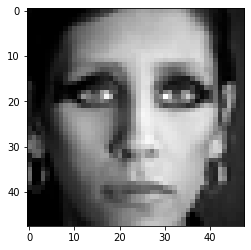

(min,max)= 0.0 241.0


In [10]:
image = Image.fromarray(pixels_np.astype(np.uint8))
image.save('sample.png', format='PNG')

img = plt.imread("../../data/input/Training/neutral/fer0000004.png")
fix, ax = plt.subplots()
ax.imshow(img, cmap="gray")
plt.show()

np_restore = np.array(img)*255.0
print("(min,max)=", np.min(np_restore), np.max(np_restore))